## Chapter 3 from 3.6 onwards

#### Conditional Heteroscedastic Models
https://faculty.chicagobooth.edu/ruey-s-tsay/research/an-introduction-to-analysis-of-financial-data-with-r


good for rugarch and rmgarch:

https://www.youtube.com/watch?v=8VXmRl5gzEU

something to look at
https://www.youtube.com/watch?v=cDlbEQz1PQk
MIT Open courseware for tsa

Copied from 3.5 GARCH models formula (3.14) ... (3.15) because mentioned in this section.

For log return:

$$\large r_t, \text{ let } a_t = r_t - u_t \text{ = innovation at time t.}$$ 

$a_t$ follows a GARCH(m,s) model if:

(3.14)

$$\large a_t = \sigma_t \epsilon_t, \;\; \sigma_t^2 = \alpha_0 + \sum_{i=1}^m \alpha_i a_{t-i}^2 + \sum_{j=1}^s \beta_j \sigma_{t-j}^2$$

- let:
    
$$ \large \eta_t = a_t^2 - \sigma_t^2$$
$$ \large \sigma_t^2 = a_t^2 - \eta_t$$


(3.15)

$$ \large a_t^2 = \alpha_0 + \sum_{i=1}^{max(m,s)} (\alpha_i + \beta_i) a_{t-i}^2 + \eta_t - \sum_{j=1}^s \beta_j \eta_{t-j}$$

Copied from section 2.6.2 on pages 65 - 66:

**AR polynomial** and **MA polynomial** are the bits that multiply $r_t$ and $a_t$ in the general ARMA(p,q) model, 

$$\large r_t = \phi_0 + \sum_{i=1}^p \phi_i r_{t-i} + a_t - \sum_{i=1}^q \phi_i a_{t-i}$$

that has special cases in the AR model and MA model, and which can be written as

(2.28)

$$\large (1-\phi_1 B - ... - \phi_p B^p) r_t = \phi_0 + (1 - \theta_1 B - ... - \theta_q B^q) a_t$$ 

Thus, the AR polynomial:

$$\large 1 - \phi_1 B - ... \phi_p B^p$$

and the MA polynomial:

$$\large 1 - \theta_1 B - ... \theta_q B^q$$

with no common factors between them.

## 3.6 The Integrated GARCH Model

If the AR polynomial of the GARCH representation in (3.15) has a unit root, then the model is an IGARCH model: IGARCH models are unit-root GARCH Models. 

[I understnad the AR polynomial of (3.15) to be the portion ...

$$\large \sum_{i=1}^{max(m,s)} (\alpha_i + \beta_i)$$

... that multiplies $a_{t-i}^2$ and thus the test of IGARCH is $\alpha_i + \beta_i = 1$]

IGARCH models are similar to ARIMA models: past squared shocks $\eta_{t-1} = a_{t-i}^2 - \sigma_{t-1}^2$ for i > 0 impact on $a_t^2$ is persistent.

[Not sure why this is if only $\beta_i$ multiplies $\eta_{t-i}$ in (3.15) unless it is via $a_{t-i}^2$ multiplied by $\alpha_i + \beta_i$ that $\eta_{t-i-1}$ has its effect on $a_t^2$.]

[like (3.14), ... ]

(3.14)

$$\large a_t = \sigma_t \epsilon_t, \;\; \sigma_t^2 = \alpha_0 + \sum_{i=1}^m \alpha_i a_{t-i}^2 + \sum_{j=1}^s \beta_j \sigma_{t-j}^2$$

...but with m = s = 1 and $\alpha_1 + \beta_1 = 1 \longrightarrow \alpha_1 = 1 - \beta_1$ ...]

IGARCH(1,1) can be written:

$$\large a_t = \sigma_t \epsilon_t. \;\; \sigma_t^2 = \alpha_0 + \beta_1 \sigma_{t-1}^2 + (1-\beta_1) a_{t-1}^2$$

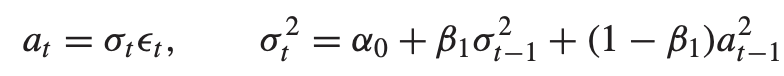

where
- {$\epsilon_t$} is defined as before
- $1 > \beta_1 > 0$
- [$1-\beta_1$ replaces $\alpha_1$]
- [useful to transform algebra from (3.14) to (3.15)]

For monthly excesss returns of SP500 the IGARCH(1,1) model is

[book example]

$$\large r_t = 0.0067 + a_t, \; \; a_t = \sigma_t\epsilon_t$$

$$\large \sigma_t^2 = 0.00019 + 0.8059 \sigma_{t-1}^2 + 0.1941 a_{t-1}^2$$

[my results]

[Very similar results for the Igarch.R and rugarch packages, and rugarch is reported here because it has no singularity for both flags turned on.  None of these results match the book.]

$$\large r_t = 0.007417 + a_t, \; \; a_t = \sigma_t\epsilon_t$$

$$\large \sigma_t^2 = 0.000051 + 0.857049 \sigma_{t-1}^2 + (1 - 0.857049) a_{t-1}^2$$

$$\large \sigma_t^2 = 0.000051 + 0.857049 \sigma_{t-1}^2 + 0.142951 a_{t-1}^2$$

where standard errors of the estimates in the volatility equation of the book [my computations] are 0.0017[0.000019], 0.000013[0.024978], and 0.0144[NA].  Interesting the book compute standard error for BOTH of the IGARCH alpha and beta parameters considering that one is just the additive inverse of the other. The rugarch module does not compute beta's standard error because it is not part of the model DOF.]

The IGARCH parameter estimates are similar to GARCH(1,1) model in section 3.5 [code/results copied below] but there is a major difference between the models: The unconditional variance of $a_t$ and thus $r_t$ [= $\frac{\alpha_0}{1 - sum_{i=1}^{max(m,s)}(\alpha_i + \beta_i)}$] is not defined under the above IGARCH(1,1) model [because $\alpha_i + \beta_i = 1$]. 

[copied from section 3.5 GARCH:]

Using unconditional mean of an ARMA model [remeber E(x) = $\frac{a_0}{1-\alpha_1 - \alpha_2 - ... - \alpha_m}$], this is true provided the denominator is positive:

$$ \large E(a_t^2) = \frac{\alpha_0}{1 - sum_{i=1}^{max(m,s)}(\alpha_i + \beta_i)}$$

[The above is also revealed to be the unconditional variance of $a_t$ = Var($a_t$) which of course makes sense since $E(a_t^2) = E[(a_t - \mu_{a_t})^2] = E[(a_t - 0)^2]$ ]

[end copy]

Difficult to jutify [undefined unconditional variance] for an excess return series, from a theoretical standpoint, the IGARCH model phenomenon may be caused by **level shifts in volatility**.  Actual causes of volatility persistence deserves careful investigation.

When $\alpha_1 + \beta_1 = 1$, then repeated substitutions in (3.17) yield a simpler formula for $\sigma_h^2(\ell)$:

(3.17) 

$ \large \sigma_h^2(\ell) = \alpha_0 + (\alpha_1 + \beta_1) \sigma_h^2(\ell - 1) \; \; \text{ for } \ell > 1$

First, replace $\alpha_1 + \beta_1$ with 1:

$ \large \sigma_h^2(\ell) = \alpha_0 + \sigma_h^2(\ell - 1)$

then substitute once:

$ \large \sigma_h^2(\ell) = \alpha_0 + \alpha_0 + \sigma_h^2(\ell - 2)$

then substitute for a second time:

$ \large \sigma_h^2(\ell) = \alpha_0 + \alpha_0 + \alpha_0 + \sigma_h^2(\ell - 3)$

then substitute for a third time:

$ \large \sigma_h^2(\ell) = \alpha_0 + \alpha_0 + \alpha_0 + \alpha_0 + \sigma_h^2(\ell - 4)$

There are n = 3 substitutions and n + 1 = 4 $\alpha_0$'s and the prior $\sigma_h^2$ value is from t = $\ell - (n + 1)$ or $\sigma_t^2(\ell - (n + 1))$.  

How many substitutions, n, need to occur to get back to using $\sigma_h^2(1)$ in this formula?

When $\ell - (n+1) = 1$, then the $\sigma_t^2$ value will be from time = h+1 or $\sigma_h^2(1)$. 

At that point, $\ell - (n+1) = 1 \longrightarrow n = \ell - 2$: 
- so there will have been $n = \ell - 2$ substitutions, and
- there will be $n + 1 = \ell - 2 + 1 = (\ell - 1)$ number of $\alpha_0$
- and the formula for  $\sigma_h^2(\ell)$ is:

$ \large \sigma_h^2(\ell) = (\ell - 1)\alpha_0 + \sigma_h^2(1)$

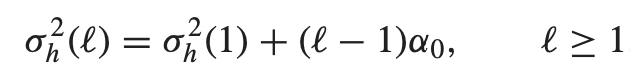

where:
- h is the forecast origin.

consequently: 
- the effect of the conditional volatility 1-step ahead from forecast origin = $\sigma_h^2(1)$ on future volatilities is peristent [permanent], and 
- the impact of $\alpha_0$ is also permanent: volatilities form a straight line with slope $\alpha_0$.
- Nelson (1990) studied probability properties of the volatility process $\sigma_t^2$ under an IGARCH model.
- the process $\sigma_t^2$ is a martingale.
- nice results are written in literature.
- in some conditions, the volatility process is strictly stationary [because $\alpha_i + \beta_i = 1$] but not weakly stationary because it does not have the first two moments [because $\alpha_i + \beta_i = 1$ in  denominator for $a_t$'s mean and variance formula leave it undefined. Is this what he refers to?]
- When $\alpha_0 = 0$, IGARCH(1,1) model volatility forecasts are simply $\sigma_h^2(1)$ for all forecast horizons.  
    - This is the form of IGARCH(1,1) used in RiskMetrics, the method used for calculating VaR. (Chapter 7)
    - This form of IGARCH model is also an exponential smoothing model for the {$a_t^2$} series.  See this from rewriting the model:

IGARCH:

$\large a_t = \sigma_t \epsilon_t. \;\; \sigma_t^2 = \alpha_0 + \beta_1 \sigma_{t-1}^2 + (1-\beta_1) a_{t-1}^2$

Look only at volatility:

$\large \sigma_t^2 = \alpha_0 + \beta_1 \sigma_{t-1}^2 + (1-\beta_1) a_{t-1}^2$

$\alpha_0 = 0$ and swap terms' positions:

$\large \sigma_t^2 = (1-\beta_1) a_{t-1}^2 + \beta_1 \sigma_{t-1}^2$

Resubscript:

$\large \sigma_{t-1}^2 = (1-\beta_1) a_{t-2}^2 + \beta_1 \sigma_{t-2}^2$

Substitute once:

$\large \sigma_t^2 = (1-\beta_1) a_{t-1}^2 + \beta_1 [(1-\beta_1) a_{t-2}^2 + \beta_1 \sigma_{t-2}^2]$

Multiply through:

$\large \sigma_t^2 = (1-\beta_1) a_{t-1}^2 + (1-\beta_1) \beta_1 a_{t-2}^2 + \beta_1^2 \sigma_{t-2}^2$

Collect:

$\large \sigma_t^2 = (1-\beta_1) [a_{t-1}^2 + \beta_1 a_{t-2}^2] + \beta_1^2 \sigma_{t-2}^2$

Resubscript again:

$\large \sigma_{t-2}^2 = (1-\beta_1) a_{t-3}^2 + \beta_1 \sigma_{t-3}^2$

Substitute twice:

$\large \sigma_t^2 = (1-\beta_1) [a_{t-1}^2 + \beta_1 a_{t-2}^2] + \beta_1^2 [(1-\beta_1) a_{t-3}^2 + \beta_1 \sigma_{t-3}^2]$

Multiplty through again:

$\large \sigma_t^2 = (1-\beta_1) [a_{t-1}^2 + \beta_1 a_{t-2}^2] + \beta_1^2 (1-\beta_1) a_{t-3}^2 + \beta_1^2 \beta_1 \sigma_{t-3}^2$

Collect again:

$\large \sigma_t^2 = (1-\beta_1) [a_{t-1}^2 + \beta_1 a_{t-2}^2 + \beta_1^2 a_{t-3}^2] + \beta_1^3 \sigma_{t-3}^2 $

Repeatedly substituting in n times: 

$\large \sigma_t^2 = (1-\beta_1) [a_{t-1}^2 + \beta_1 a_{t-2}^2 + \beta_1^2 a_{t-3}^2 + \beta_1^n a_{t-(n+1)}^2] + \beta_1^n \sigma_{t-(n+1)}^2 $

Until $\beta_1^i \sigma_{t-(i+1)}^2$ is zero-ish after i substitutions: 

$\large \sigma_t^2 = (1-\beta_1) (a_{t-1}^2 + \beta_1 a_{t-2}^2 + \beta_1^2 a_{t-3}^2 + ... + \beta_1^i a_{t-(i+1)}^2 ) $

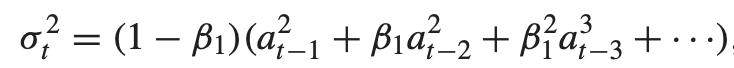

which is a well known exponential smoothing function with $\beta_1$ being the discounting factor.  **Exponential smoothing methods are thus used to estimate such an IGARCH model.**

`source Igarch.R`

https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch4rscripts.txt

gives link to Igarch.R code - need to know what 'nlminb' is to understand this code
https://faculty.chicagobooth.edu/ruey-s-tsay/research/an-introduction-to-analysis-of-financial-data-with-r

r docs re nlminb
https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/nlminb

pretty good explanation
https://www.stat.colostate.edu/~jah/Computing_Hints/optimization.pdf

has examples:
https://docs.tibco.com/pub/enterprise-runtime-for-R/5.0.0/doc/html/Language_Reference/stats/nlminb.html



In [1]:
source("Igarch.R")
# "Igarch" <- function(rtn,include.mean=F,volcnt=F){

library(fGarch)
sp5=scan(file='sp500.txt')
#sp5=log(1+sp5)

# compute alpha_0 but no mu
m1=Igarch(sp5, include.mean=F, volcnt=T)
names(m1)
str(m1)

# compute mu but no alpha_0
m2=Igarch(sp5, include.mean=T, volcnt=F)
names(m2)
str(m2)

# compute mu and alpha_0
# T for both flags --> error:
# Error in solve.default(Hessian): Lapack routine dgesv: system is exactly singular: U[1,1] = 0

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fBasics



Estimates:  4.680901e-05 0.8657418 
Maximized log-likehood:  -1256.666 

Coefficient(s):
         Estimate  Std. Error  t value   Pr(>|t|)    
omega 4.68090e-05 1.73086e-05  2.70439  0.0068431 ** 
beta  8.65742e-01 2.13399e-02 40.56917 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "par"        "volatility"

List of 2
 $ par       : Named num [1:2] 4.68e-05 8.66e-01
  ..- attr(*, "names")= chr [1:2] "omega" "beta"
 $ volatility: Time-Series [1:792] from 1 to 792: 0.0591 0.0561 0.055 0.056 0.0532 ...
Estimates:  0.006874402 0.9007153 
Maximized log-likehood:  -1258.219 

Coefficient(s):
      Estimate  Std. Error  t value Pr(>|t|)    
mu   0.0068744   0.0015402  4.46332 8.07e-06 ***
beta 0.9007153   0.0158018 57.00082  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "par"        "volatility"

List of 2
 $ par       : Named num [1:2] 0.00687 0.90072
  ..- attr(*, "names")= chr [1:2] "mu" "beta"
 $ volatility: Time-Series [1:792] from 1 to 792: 0.0584 0.0557 0.0552 0.0564 0.0537 ...


In [2]:
require(rugarch)
require(fGarch)

sp5=scan(file='sp500.txt')
#sp5=log(1+sp5)

# these aere borrowed from notebook titled: Lecture 10 Risk Metrics with Zhou Chao 
# compute alpha_0 but no mu 
spec1=ugarchspec(variance.model=list(model="iGARCH", garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="norm")
fit1 = ugarchfit(spec1, data=sp5)
summary(fit1)
fit1

# compute mu but no alpha_0
spec2=ugarchspec(variance.model=list(model="iGARCH", garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=TRUE),distribution.model="norm",fixed.pars=list(omega=0))
fit2 = ugarchfit(spec2, data=sp5)
summary(fit2)
fit2

# compute mu and alpha_0
spec3=ugarchspec(variance.model=list(model="iGARCH", garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=TRUE),distribution.model="norm")
fit3 = ugarchfit(spec3, data=sp5)
summary(fit3)
fit3

spec3

Loading required package: rugarch

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




   Length     Class      Mode 
        1 uGARCHfit        S4 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000047    0.000017   2.7075 0.006779
alpha1  0.134350    0.021345   6.2942 0.000000
beta1   0.865650          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000047    0.000018    2.551 0.010741
alpha1  0.134350    0.023313    5.763 0.000000
beta1   0.865650          NA       NA       NA

LogLikelihood : 1256.695 

Information Criteria
------------------------------------
                    
Akaike       -3.1684
Bayes        -3.1566
Shibata      -3.1684
Hannan-Quinn -3.1639

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
           

   Length     Class      Mode 
        1 uGARCHfit        S4 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006874    0.001540   4.4633    8e-06
omega   0.000000          NA       NA       NA
alpha1  0.099285    0.015802   6.2831    0e+00
beta1   0.900715          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006874    0.002002   3.4331 0.000597
omega   0.000000          NA       NA       NA
alpha1  0.099285    0.022331   4.4461 0.000009
beta1   0.900715          NA       NA       NA

LogLikelihood : 1258.219 

Information Criteria
------------------------------------
                    
Akaike       -3.1723
Bayes        -3.1605
Shibata      -3.1723
Hannan-Quinn -3.1677

Weig

   Length     Class      Mode 
        1 uGARCHfit        S4 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.007417    0.001525   4.8621 0.000001
omega   0.000051    0.000018   2.9238 0.003458
alpha1  0.142951    0.021443   6.6667 0.000000
beta1   0.857049          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.007417    0.001587   4.6726 0.000003
omega   0.000051    0.000019   2.6913 0.007118
alpha1  0.142951    0.024978   5.7230 0.000000
beta1   0.857049          NA       NA       NA

LogLikelihood : 1268.238 

Information Criteria
------------------------------------
                    
Akaike       -3.1950
Bayes        -3.1773
Shibata      -3.1951
Hannan-Quinn -3.1882

Weig


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: iGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(0,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


In [3]:
library(fGarch)

#standard GARCH model from section 3.5

sp5=read.table("sp500.txt")
sp5=sp5[,]
# sp500xsr=log(1+sp500xsr) without this treatment, results in section 3.5 are closer to book so not here either

m1 = garchFit(~garch(1,1), data=sp5, trace=F)
summary(m1)

Warning message:
“Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead.”



Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = sp5, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x7fdd46b7a6a8>
 [data = sp5]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
7.4497e-03  8.0615e-05  1.2198e-01  8.5436e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     7.450e-03   1.538e-03    4.845 1.27e-06 ***
omega  8.061e-05   2.833e-05    2.845  0.00444 ** 
alpha1 1.220e-01   2.202e-02    5.540 3.02e-08 ***
beta1  8.544e-01   2.175e-02   39.276  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 1269.455    normalized:  1.602848 

Description:
 Thu Feb 10 14:24:51 2022 by user:  


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  80.32111  0           
 Shapiro-Wilk Test  R    W      0.98505   3.13688

## 3.7 The GARCH-M Model



The GARCH-M model
- models the dependence of a security's return on the volatility of a security's return.
- M stands for GARCH in the mean [in the mean equation].
- a simple GARCH(1,1)-M model is:

(3.23)

$ \large r_t = \mu + + c \sigma_t^2 + a_t, \; \; a_t = \sigma_t \epsilon_t$

$ \large \sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2$

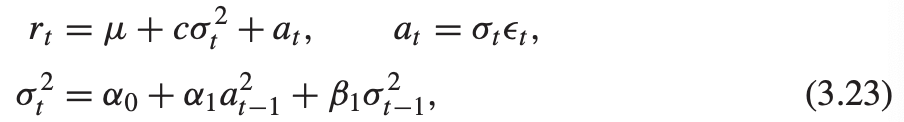

where:
- $\mu$ is a constant.
- [notice $r_t$ is dependent on / broken into components from same time subscript: $\sigma_t^2$ and $a_t$, but dependent on prior time subscripts of the same in the second equation.]
- c is a constant.
    - parameter c is called the **risk premium parameter**: positive c indicates the return is positively related to the return volatility.
    - other specificaions for risk premium in literature include replacing return variance with return volatility or log return variance
        - $r_t = \mu + c\sigma_t + a_t$
        - $r_t = \mu + c [ln(\sigma_t^2)] + a_t$

[This is the first time he's encoded $\mu$ without a subscript t.  For example, the 2nd and 3rd equations in this chapter:

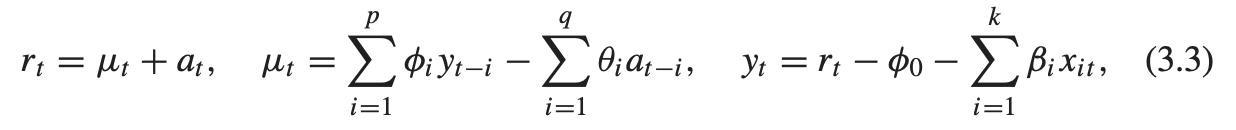

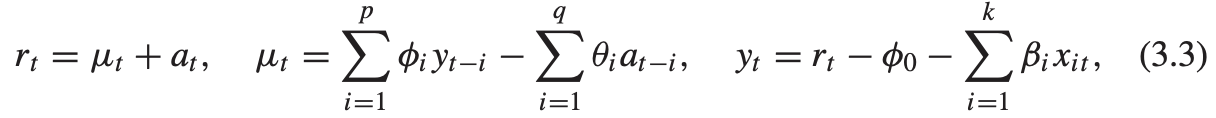

[Implications:]
- This formulaion of the GARCH-M model (3.23) implies serial correlations in the return series $r_t$. 

[Where? I don't see $r_{t-i}$ anywhere or any unsquared data point that is subscripted with t-i, and thus this seems no different than past models; why bring this implication up here?]

- Those serial correlations are introduced by those in teh volatility process {$\sigma_t^2$}. 

[Again how is this different from prior *ARCH* models?]

- The existence of risk premium is therefore another reason for serial correlations in some historical stock returns.  

[The argument here is that GARCH-M modeled return has $c\sigma_t^2$ in its equation and $\sigma_t^2$ is dependent on $\sigma_{t-1}^2$.  Thus by putting $c\sigma_t^2$ into the return equation, we have introduced serial correlation into the returns. This is not exactly true.  I counter that $a_t$ has always been in the return equation and (a) via $a_t = \sigma_t\epsilon_t$ and then $\sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2$ prior volatility has been indirectly in the return equation, and (b) prior $a_{t-1}^2$ also have a presence in the ARCH modeling of $\sigma_t^2$.  What's exactly true, I think, is that by introducing a constant parameter c = **risk premium parameter** GARCH-M models are modeling that serial correlation directly in the return by allowing c to vary, optimizing to find c.  Serial correlation is implied and modeled in the returns in all these ARCH models due to the **volatility equation**, but in this one it is just directly in the **mean equation** so if those two were modeled separately, e.g. in a two-pass operation, then it might be mitigated.]

For illustration:
- GARCH(1,1)-M model with Gaussian innovations (mean zero).
- S&P500 index Jan-1926 to Dec-1991

[book results:]

$$\large r_t = 0.0055 + 1.09 \sigma_t^2 + a_t, \;\; \sigma_t^2 = 8.76 \times 10^{-5} + 0.123 a_{t-1}^2 + 0.849 \sigma_{t-1}^2$$

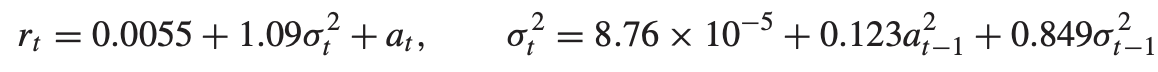

[results computed here:]

$$\large r_t = 0.005421 + 1.007740 \sigma_t^2 + a_t, \;\; \sigma_t^2 = 8.3 \times 10^{-5} + 0.123124 a_{t-1}^2 + 0.852273 \sigma_{t-1}^2$$

where: 
- the mean equation's parameters' standard errors are 0.0023 [0.002360 for $\mu$] and 0.818 [0.888427 for $\sigma_t^2$]. 
- the volatility equation's parameters' standard errors are $2.51 x 10^{-5} [3.5 x 10^5 \text{ for } \alpha_0]$, 0.0205 [0.022287 for $\alpha_1$] and 0.0196 [0.022397 for $\beta_1$].

implications:
- the estimated risk premium for the index return is positive but is not statistically significant at the 5% level.

exhibits: 
- S-Plus code 
- Table 3.2

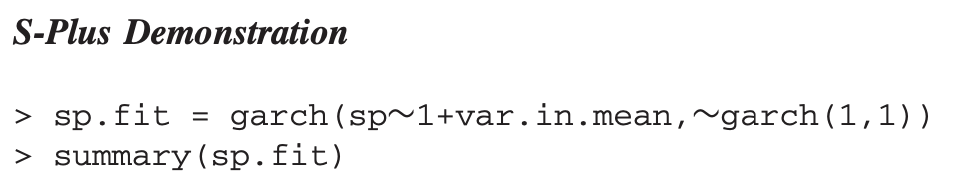

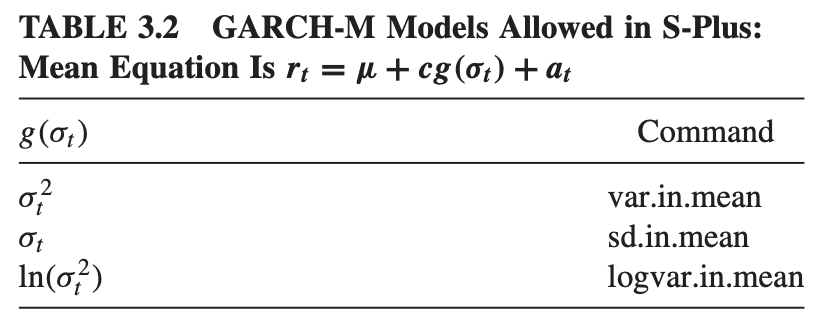



In [4]:
require(rugarch)
source('garchM.R')
sp5=scan(file='sp500.txt')
garchM(sp5)

Warning message in nlminb(start = params, objective = glkM, lower = lowBounds, upper = uppBounds):
“NA/NaN function evaluation”


Maximized log-likehood:  1269.053 

Coefficient(s):
         Estimate  Std. Error  t value   Pr(>|t|)    
mu    4.22469e-03 2.40669e-03  1.75539  0.0791922 .  
gamma 5.61297e-01 8.96187e-01  0.62632  0.5311073    
omega 8.13623e-05 2.92094e-05  2.78548  0.0053448 ** 
alpha 1.21976e-01 2.21373e-02  5.50995 3.5893e-08 ***
beta  8.54361e-01 2.22261e-02 38.43946 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


This provides MUCH CLOSER RESULTS after a helpful hint to include/change archpow = 2: if archpow = 1 then $\sigma$ appears in mean equation; if archpow = 2 then $\sigma^2$ appears in mean equation.
https://stats.stackexchange.com/questions/97398/why-do-i-get-very-different-results-estimating-garch-m-model-in-eviews-and-r-ru

i didnt find usefulness in this but might be a good resource, since it is the rugarch author https://stat.ethz.ch/pipermail/r-sig-finance/2014q1/012269.html

this GARCH-M spec is documented in the "Lecture 9 Risk Metrics with Zhou Chao" notebook and results are same.

this also looks good:
https://bookdown.org/ccolonescu/RPoE4/time-varying-volatility-and-arch-models.html

more:
https://github.com/cran/rugarch

In [5]:
require(rugarch)
sp5=scan(file='sp500.txt')
specGarchM=ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=TRUE, archm = TRUE, archpow = 2), distribution.model="norm")
fitGarchM = ugarchfit(specGarchM, data=sp5)
specGarchM
summary(fitGarchM)
fitGarchM


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(0,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: TRUE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


   Length     Class      Mode 
        1 uGARCHfit        S4 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.005421    0.002360   2.2970 0.021616
archm   1.007740    0.888427   1.1343 0.256670
omega   0.000083    0.000029   2.8293 0.004665
alpha1  0.123124    0.022287   5.5246 0.000000
beta1   0.852273    0.022397  38.0523 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.005421    0.002440   2.2222 0.026267
archm   1.007740    0.891145   1.1308 0.258124
omega   0.000083    0.000035   2.3849 0.017084
alpha1  0.123124    0.027804   4.4283 0.000009
beta1   0.852273    0.027057  31.4995 0.000000

LogLikelihood : 1270.102 

Information Criteria
------------------------------------
                

## 3.8 The exponential GARCH model

EGARCH, exponential GARCH, allows for assymetric effects between positive and negative asset returns by including a weighted innovation:

[$\gamma$ weights the difference between innovations' absolute value and mean of innovations' absolute value, both of which only involve positives. $\theta$ weights positive or negative $\epsilon$.  This formulation creates a skew toward negatives weighted more via the difference $\theta - \gamma$: in the first reformulation (below) $\gamma$ as is pivotal and second formulation (below) $\omega$ is pivotal.]

(3.24)

$$\large g(\epsilon_t) = \theta\epsilon_t + \gamma[\lvert\epsilon_t\lvert - E(\lvert\epsilon_t\lvert)]$$

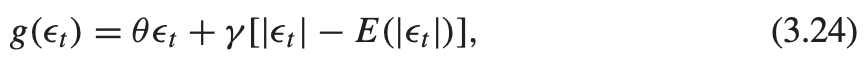

where:
- $\theta$ is a real constant
- $\gamma$ is a real constant
- $\epsilon_t$ is a zero-mean iid sequence with a continuous distribution.
- $\lvert\epsilon_t\lvert - E(\lvert\epsilon_t\lvert)$ is a zero-mean iid sequence with a continuous distribution. 

implication:
- thus, E[g($\epsilon_t$)] = 0
- the asymmetry of g($\epsilon_t$) is evident from it rewriting:

(3.24)

$$\large g(\epsilon_t) = \theta\epsilon_t + \gamma[\lvert\epsilon_t\lvert - E(\lvert\epsilon_t\lvert)]$$

Multiply through:

$$\large g(\epsilon_t) = \theta \epsilon_t + \gamma \lvert\epsilon_t\lvert - \gamma E(\lvert\epsilon_t\lvert)$$

Eliminate absolute values, but know this algebra means that there is always addition between $\theta \epsilon_t \text{ and } \gamma \lvert\epsilon_t\lvert$ as was intended in the original formala:

$\large
\begin{equation}
g(\epsilon_t) =
\begin{cases}
\theta \epsilon_t + \gamma \epsilon_t - \gamma E(\lvert\epsilon_t\lvert) & \text{ if } \epsilon_t ≥ 0. \\
\theta \epsilon_t - \gamma \epsilon_t - \gamma E(\lvert\epsilon_t\lvert) & \text{ if } \epsilon_t < 0. \\
\end{cases}
\end{equation}
$

Collect:

[Thus, when $\gamma < 0, g(\epsilon_t < 0) > g(\epsilon_t >0)$.] 

$\large
\begin{equation}
g(\epsilon_t) =
\begin{cases}
(\theta + \gamma)\epsilon_t - \gamma E(\lvert\epsilon_t\lvert) & \text{ if } \epsilon_t ≥ 0, \\
(\theta - \gamma)\epsilon_t - \gamma E(\lvert\epsilon_t\lvert) & \text{ if } \epsilon_t < 0. \\
\end{cases}
\end{equation}
$

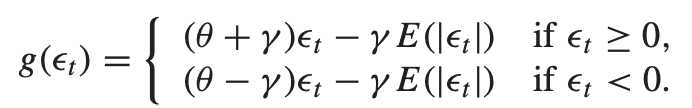

where:
- [only $\gamma$ separates the cases' formulations.]
- for the **standard Gaussian random variable** $\epsilon_t$:

$\Large E(\lvert\epsilon_t\lvert) = \sqrt{\frac{2}{\pi}}$

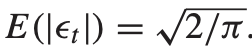

- for the standardized Student-t distribution in equation (3.7) version of $\epsilon_t$:

$\Large E(\lvert\epsilon_t\lvert) = \frac{2\sqrt{v - 2}\Gamma[\frac{(v + 1)}{2}]}{(v - 1)\Gamma\frac{v}{2}\sqrt{\pi}}$

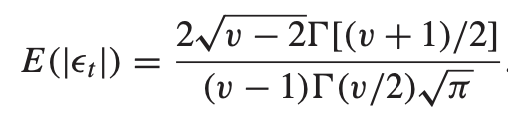

[copied from section 3.4.3]

Let $x_v$ be a Student-t distribution with v degrees of freedom. Then Var$(x_v) = \large \frac{v}{(v − 2)}$ for v > 2, and we use $\large \epsilon_t = \large \frac{x_v}{\sqrt{\frac{v}{(v − 2)}}}$. The probability density function of $\epsilon_t$ is 

(3.7)

$$\large f(\epsilon_t | v) = \frac{\Gamma \left[\frac{v+1}{2} \right]}{\Gamma \left(\frac{v}{2}\right) \sqrt{(v-2)\pi}} \left( 1 + \frac{\epsilon_t^2}{v-2} \right)^{\large-\frac{v+1}{2}} \text{,    } v > 2$$

[end copy]

[With that newly defined innovation available,] an EGARCH(m,s) model is written [in a way that reminds me of ARMA with $\alpha_i$'s weighting $\sigma_t^2$ and $\beta_j$'s weighting $g(\epsilon_{t-j})$]:

(3.25)

$$\large a_t = \sigma_t\epsilon_t, \;\; ln(\sigma_t^2) = \alpha_0 + \frac{1 + \beta_1 B + \cdots \beta_{s-1} B^{s-1}}{1 - \alpha_1 B - \cdots - \alpha_m B^m} g(\epsilon_{t-1})$$

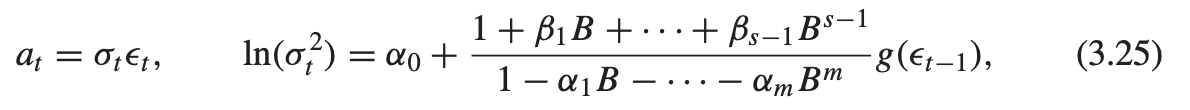

where:
- $\alpha_0$ is a constant
- B is the backshift or lag operator: 

$$\large B g(\epsilon_t) = g(\epsilon_{t-1})$$

- these are polynomials, each with zeros outside the unit circle, and together with no common factors:

[Notice that there are s-1 number of $\beta$'s that weight $g(\epsilon_{t-1})$ subscripted 1 to t-1, and there are m number of $\alpha$'s that weight $\sigma_t^2$ subscripted 1 to t. this causes a ton of confusion: should there be a beta in an egarch(1,1) model?]

$$\large 1 + \beta_1 B + \cdots + \beta_{s-1} B^{s-1}$$

$$\large 1 - \alpha_1 B - \cdots - \alpha_m B^m$$

By outside the unit circle, it is meant that the absolute values of the zeros are greater than 1.

(3.25) uses the usual ARMA parameterization to describe the evolution of the **conditional variance** of $a_t$. 

**Properties** of EGARCH are obtained in similar ways as the GARCH model:
- unconditional mean of $ln(\sigma_t^2)$ is $\alpha_0$. [because $\epsilon_t$ defined zero-mean iid.]

However the EGARCH model differs from the GARCH model is several ways:
- EGARCH uses a **logged conditional variance** to relax the positiveness constraint of model coefficients.
- $g(\epsilon_t)$ enables the model to respond assymetrically to positive and negative lagged values of $a_t$.
- Other EGARCH model properties are found in Nelson (1991).

[To comprehend these properties, deploy (3.25) in order to] consider an EGARCH model of order (1,1):

(3.25)

$\large a_t = \sigma_t\epsilon_t, \;\; ln(\sigma_t^2) = \alpha_0 + \frac{1 + \beta_1 B + \cdots \beta_{s-1} B^{s-1}}{1 - \alpha_1 B - \cdots - \alpha_m B^m} g(\epsilon_{t-1})$

[Pay attention to the subscripts / powers differences numerator vs. denominator: this is an EGARCH(1,1) model; thus, m = 1, s = 1.  The backward shift operator series on top progresses from $B^1$ to $B^{1-1}$ which is not pretty. This is a case where using summation in the general formula would help since the first $\beta_i$ is not $\beta_1$. This however is not correct notation.]

$\large a_t = \sigma_t\epsilon_t, \;\; ln(\sigma_t^2) = \alpha_0 + \frac{1 + \sum_{i=1}^{s-1} \beta_{s-i} B^{s-1}}{1 - \sum_{j=1}^{m} \alpha_j B^j} g(\epsilon_{t-1})$

[Deploy the EGARCH(1,1) model:]

$\large a_t = \sigma_t\epsilon_t, \;\; ln(\sigma_t^2) = \alpha_0 + \frac{1 + \beta_1 B + \cdots \beta_{1-1} B^{1-1}}{1 - \alpha_1 B - \cdots - \alpha_1 B^1} g(\epsilon_{t-1})$

$\large ln(\sigma_t^2) = \alpha_0 + \frac{1}{1 - \alpha_1 B } g(\epsilon_{t-1})$

$\large (1 - \alpha_1 B) \left(ln(\sigma_t^2) =  \alpha_0 + \frac{1}{1 - \alpha_1 B } g(\epsilon_{t-1}) \right) $

$\large (1 - \alpha_1 B) ln(\sigma_t^2) = (1 - \alpha_1 B) \alpha_0 + \frac{(1 - \alpha_1 B) (1)}{1 - \alpha_1 B } g(\epsilon_{t-1}) $

[Guessing that B doesnt have impact on first term on RHS:]

$\large (1 - \alpha_1 B) ln(\sigma_t^2) = (1 - \alpha_1) \alpha_0 + \frac{(1 - \alpha_1 B)}{1 - \alpha_1 B } g(\epsilon_{t-1}) $

[And top and bottom cancel in fraction on RHS:]

$\large (1 - \alpha_1 B) ln(\sigma_t^2) = (1 - \alpha_1 ) \alpha_0 + g(\epsilon_{t-1}) $

[Include the definition of $a_t$ for the complete EGARCH(1,1) model specification that is very much reminiscient of ARMA:]

(3.26)

$$\large a_t = \sigma_t \epsilon_t, \;\; (1-\alpha_1 B) ln(\sigma_t^2) = (1 - \alpha_1)\alpha_0 +  g(\epsilon_{t-1})$$

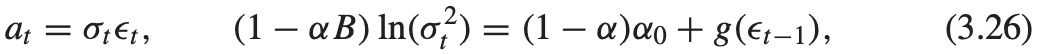

where:
- his formula omits the $\alpha$ subscripts.
- $\epsilon_t$ [generally is a zero-mean iid sequence with a continuous distribution] and here in this example is defined standard normal and thus:

$\large E(\lvert \epsilon_t \rvert ) = \sqrt{\frac{2}{\pi}}$

implication: the model for $ln(\sigma_t^2)$ becomes:

(3.26)

$$\large a_t = \sigma_t \epsilon_t, \;\; (1-\alpha_1 B) ln(\sigma_t^2) = (1 - \alpha_1)\alpha_0 +  g(\epsilon_{t-1})$$

resubscript the equation with cases from $g(\epsilon_t)$ to $g(\epsilon_{t-1})$:

$\large
\begin{equation}
g(\epsilon_{t-1}) =
\begin{cases}
(\theta + \gamma)\epsilon_{t-1} - \gamma E(\lvert\epsilon_{t-1}\lvert) & \text{ if } \epsilon_{t-1} ≥ 0, \\
(\theta - \gamma)\epsilon_{t-1} - \gamma E(\lvert\epsilon_{t-1}\lvert) & \text{ if } \epsilon_{t-1} < 0. \\
\end{cases}
\end{equation}
$

Substitute in $g(\epsilon_{t-1})$:

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
(1 - \alpha_1)\alpha_0 + (\theta + \gamma)\epsilon_{t-1} - \gamma E(\lvert\epsilon_{t-1}\lvert) & \text{ if } \epsilon_{t-1} ≥ 0, \\
(1 - \alpha_1)\alpha_0 + (\theta - \gamma)\epsilon_{t-1} - \gamma E(\lvert\epsilon_{t-1}\lvert) & \text{ if } \epsilon_{t-1} < 0. \\
\end{cases}
$$

For a standard normal $\epsilon_t$, substitute $\sqrt{\frac{2}{\pi}}$ for $E(\lvert\epsilon_t\lvert)$:

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
(1 - \alpha_1)\alpha_0 + (\theta + \gamma)\epsilon_{t-1} - \gamma \sqrt{\frac{2}{\pi}} & \text{ if } \epsilon_{t-1} ≥ 0, \\
(1 - \alpha_1)\alpha_0 + (\theta - \gamma)\epsilon_{t-1} - \gamma \sqrt{\frac{2}{\pi}} & \text{ if } \epsilon_{t-1} < 0. \\
\end{cases}
$$

Substitute $\alpha_*$ for $(1 - \alpha_1)\alpha_0 - \gamma \sqrt{\frac{2}{\pi}}$:

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
\alpha_* + (\theta + \gamma)\epsilon_{t-1} & \text{ if } \epsilon_{t-1} ≥ 0, \\
\alpha_* + (\theta - \gamma)\epsilon_{t-1} & \text{ if } \epsilon_{t-1} < 0. \\
\end{cases}
$$

For some reason, flip $\theta \text{ and } \gamma$:

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
\alpha_* + (\gamma + \theta)\epsilon_{t-1} & \text{ if } \epsilon_{t-1} ≥ 0, \\
\alpha_* + (-\gamma + \theta)\epsilon_{t-1} & \text{ if } \epsilon_{t-1} < 0. \\
\end{cases}
$$

And clean up that negative sign:

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
\alpha_* + (\gamma + \theta)\epsilon_{t-1} & \text{ if } \epsilon_{t-1} ≥ 0, \\
\alpha_* + (\gamma - \theta)(-1)\epsilon_{t-1} & \text{ if } \epsilon_{t-1} < 0. \\
\end{cases}
$$

Finally:

(3.27)

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
\alpha_* + (\gamma + \theta)\epsilon_{t-1}& \text{ if } \epsilon_{t-1} ≥ 0, \\
\alpha_* + (\gamma - \theta)(-\epsilon_{t-1})& \text{ if } \epsilon_{t-1} < 0, \\
\end{cases}
$$

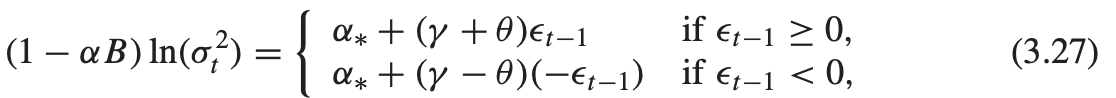

where 
- $\alpha_* = (1 - \alpha_1)\alpha_0 - \gamma \sqrt{\frac{2}{\pi}}$

Interpretation: 
- This is a nonlinear function similar to that of the **threshold autoregressive (TAR) model** of Tong (1978, 1990). 
- For this simple EGARCH model, the conditional variance evolves in nonlinear manner depending on the sign of $a_{t-1}$:  Specifically:

Starting with (3.27)

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
\alpha_* + (\gamma + \theta)\epsilon_{t-1}& \text{ if } \epsilon_{t-1} ≥ 0, \\
\alpha_* + (\gamma - \theta)(-\epsilon_{t-1})& \text{ if } \epsilon_{t-1} < 0, \\
\end{cases}
$$

Given: 

$\large a_t = \sigma_t \epsilon_t$

Rearrange and resubscript: 

$\large \epsilon_{t-1} = \frac{a_{t-1}}{\sigma_{t-1}}$

Replace 

$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
\alpha_* + (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } \frac{a_{t-1}}{\sigma_{t-1}} ≥ 0, \\
\alpha_* + (\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } \frac{a_{t-1}}{\sigma_{t-1}} < 0, \\
\end{cases}
$$

The $\sigma_{t-1}$ only ever positive; so eliminate from case definition:


$$\large (1-\alpha B)ln(\sigma_t^2) =
\begin{cases}
\alpha_* + (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} ≥ 0, \\
\alpha_* + (\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Multiply through on the LHS:

$$\large ln(\sigma_t^2) - \alpha ln(\sigma_t^2) B =
\begin{cases}
\alpha_* + (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} ≥ 0, \\
\alpha_* + (\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Replace xy ln(z) with $y ln(z^x)$ in $\alpha B ln(\sigma_t^2)$ on the LHS:

$$\large ln(\sigma_t^2) - ln(\sigma_t^{2\alpha}) B =
\begin{cases}
\alpha_* + (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} ≥ 0, \\
\alpha_* + (\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Move $B ln(\sigma_t^{2\alpha})$ to RHS:

$$\large ln(\sigma_t^2) =
\begin{cases}
ln(\sigma_t^{2\alpha}) B + \alpha_* + (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} ≥ 0, \\
ln(\sigma_t^{2\alpha}) B + \alpha_* + (\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Take both sides to exponential of e:

$$\large \text{exp}(ln(\sigma_t^2)) =
\begin{cases}
\text{exp}\left[ln(\sigma_t^{2\alpha}) B + \alpha_* + (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} ≥ 0, \\
\text{exp}\left[ln(\sigma_t^{2\alpha}) B + \alpha_* + (\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Replace exp(ln x) with x:

$$\large \sigma_t^2 =
\begin{cases}
\sigma_t^{2\alpha} B + \text{exp}\left[\alpha_* + (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} ≥ 0, \\
\sigma_t^{2\alpha} B + \text{exp}\left[\alpha_* + (\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Replace exp(x + y + z) with exp(x) * exp(y) * exp(z):

$$\large \sigma_t^2 =
\begin{cases}
\sigma_t^{2\alpha} B \times \text{exp}(\alpha_*) \times \text{exp}\left[(\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} ≥ 0, \\
\sigma_t^{2\alpha} B \times \text{exp}(\alpha_*) \times \text{exp}\left[(\gamma - \theta)\left(-\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

If $a_{t-1} < 0$, then $-\frac{a_{t-1}}{\sigma_{t-1}} = +\frac{\lvert a_{t-1} \lvert}{\sigma_{t-1}}$; so replace the $-\frac{a_{t-1}}{\sigma_{t-1}} \text{ with } +\frac{\lvert a_{t-1} \lvert}{\sigma_{t-1}}$:


$$\large \sigma_t^2 =
\begin{cases}
\sigma_t^{2\alpha} B \times \text{exp}(\alpha_*) \times \text{exp}\left[(\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} ≥ 0, \\
\sigma_t^{2\alpha} B \times \text{exp}(\alpha_*) \times \text{exp}\left[(\gamma - \theta)\left(\frac{\lvert a_{t-1} \lvert}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Multiply through the backshift operator to resubscript $\sigma_t$ to $\sigma_{t-1}$:

$$\large \sigma_t^2 =
\begin{cases}
\sigma_{t-1}^{2\alpha} \times \text{exp}(\alpha_*) \times \text{exp}\left[(\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} ≥ 0, \\
\sigma_{t-1}^{2\alpha} \times \text{exp}(\alpha_*) \times \text{exp}\left[(\gamma - \theta)\left(\frac{\lvert a_{t-1} \lvert}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

Let only variables affected by the case be associated with the cases:

$$\large \sigma_t^2 = \sigma_{t-1}^{2\alpha} \text{exp}(\alpha_*) 
\begin{cases}
\text{exp}\left[(\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} ≥ 0, \\
\text{exp}\left[(\gamma - \theta)\left(\frac{\lvert a_{t-1} \lvert}{\sigma_{t-1}}\right)\right]& \text{ if } a_{t-1} < 0, \\
\end{cases}
$$

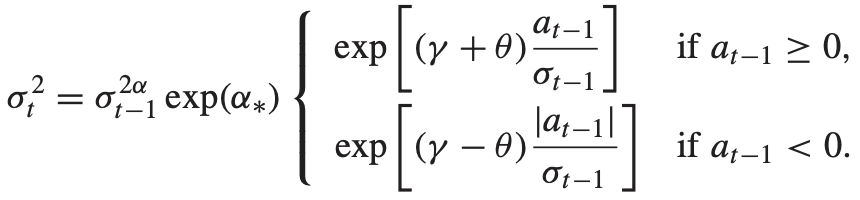

Implications:
- The model is nonlinear if $\theta ≠ 0$:  The coefficients $(\gamma + \theta)$ and $(\gamma - \theta)$ show the asymmetry in response to positive and negative $a_{t-1}$. 
- Since negative shocks tend to have larger impacts, expect $\theta$ to be negative.

$\gamma - \theta > \gamma + \theta \text{ if } \theta < 0$

[I think this is the case:]

$\large
\begin{cases}
(\gamma - \theta)\left(\frac{\lvert a_{t-1} \lvert}{\sigma_{t-1}}\right) > (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right) & \text{ if } a_{t-1} ≥ 0 \text{ and } \theta < 0\\
(\gamma - \theta)\left(\frac{\lvert a_{t-1} \lvert}{\sigma_{t-1}}\right) > (\gamma + \theta)\left(\frac{a_{t-1}}{\sigma_{t-1}}\right) & \text{ if } a_{t-1} < 0 \text{ and } \theta < 0\\
\end{cases}
$

For higher order EGARCH, the nonlinearity is more complicated.  Cao & Tsay (1992) use nonlinear models including EGARCH to obtain multistep-ahead volatility forecasts and nonlinearity in financial time series are in Chapter 4.

## 3.8.1 Alternative model form


An alternate form [to (3.25) and its definition of $g(\epsilon_t)$] for EGARCH(m,s) model is used in S-Plus:

[Appears to me that the differences are that:
- $\theta$ is no where.  Thus, $\gamma$ is literally pivotal.
- $\epsilon_t$ is not represented by the innovation $g(\epsilon_t)$ but explicitly by $a_t$ and $\sigma_t$. Both are again weighted by $\alpha$ and $\beta$.]

(3.28)

$$ \large ln(\sigma_t^2) = \alpha_0 + \sum_{i=1}^s \alpha_i \frac{ \lvert a_{t-i} \lvert + \gamma_i a_{t-i}}{\sigma_{t-i}} + \sum_{j=1}^m \beta_j ln(\sigma_{t-j}^2)$$

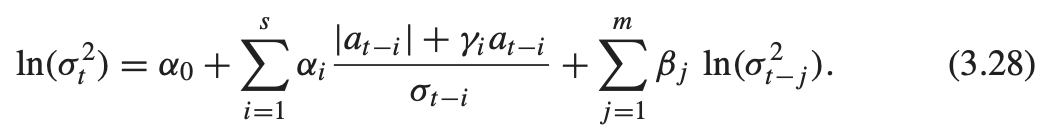

Implication:
- [Since the innovation $a_{t-i}$ appears in the first term only, the sign of the innovation has impact on **conditional log volatility** through the first term only. both $a_{t-j}$ and $\epsilon_{t-j}$ appear implicitly with $\beta_j$ but both are same sign there so that $\sigma_{t-j}$ can be only positive.]
- [To see the asymmetric impact of positive vs negative $a_t$ values, state this in terms of $\epsilon_t$,rewrite:]

Start with (3.28):

$ \large ln(\sigma_t^2) = \alpha_0 + \sum_{i=1}^s \alpha_i \frac{\lvert a_{t-i} \lvert + \gamma_i a_{t-i}}{\sigma_{t-i}} + \sum_{j=1}^m \beta_j ln(\sigma_{t-j}^2)$

Rearrange:

$ \large ln(\sigma_t^2) = \alpha_0 + \sum_{j=1}^m \beta_j ln(\sigma_{t-j}^2) + \sum_{i=1}^s \alpha_i \frac{\lvert a_{t-i} \lvert + \gamma_i a_{t-i}}{\sigma_{t-i}}$



Make cases for $a_{t-i}$: 

$\large ln(\sigma_t^2) = \alpha_0 + \sum_{j=1}^m \beta_j ln(\sigma_{t-j}^2) +
\begin{cases}
\sum_{i=1}^s \alpha_i \frac{\lvert a_{t-i} \lvert + \gamma_i a_{t-i}}{\sigma_{t-i}} & \text{ if } a_{t-1} ≥ 0\\
\sum_{i=1}^s \alpha_i \frac{\lvert a_{t-i} \lvert + \gamma_i a_{t-i}}{\sigma_{t-i}} & \text{ if } a_{t-1} < 0\\
\end{cases}
$

Recognize:

$ \large \epsilon_{t-1} = \frac{a_{t-1}}{\sigma_t}$

Replace:

$\large ln(\sigma_t^2) = \alpha_0 + \sum_{j=1}^m \beta_j ln(\sigma_{t-j}^2) +
\begin{cases}
\sum_{i=1}^s \alpha_i (\lvert \epsilon_{t-i} \lvert + \gamma_i \epsilon_{t-i}) & \text{ if } a_{t-1} ≥ 0\\
\sum_{i=1}^s \alpha_i (\lvert \epsilon_{t-i} \lvert + \gamma_i \epsilon_{t-i}) & \text{ if } a_{t-1} < 0\\
\end{cases}
$

Convert second $\epsilon_{t-i}$ to absolute value:

$\large ln(\sigma_t^2) = \alpha_0 + \sum_{j=1}^m \beta_j ln(\sigma_{t-j}^2) +
\begin{cases}
\sum_{i=1}^s \alpha_i (\lvert \epsilon_{t-i} \lvert + \gamma_i \lvert \epsilon_{t-i} \lvert ) & \text{ if } a_{t-1} ≥ 0\\
\sum_{i=1}^s \alpha_i (\lvert \epsilon_{t-i} \lvert - \gamma_i \lvert \epsilon_{t-i} \lvert ) & \text{ if } a_{t-1} < 0\\
\end{cases}
$

Collect:

$\large ln(\sigma_t^2) = \alpha_0 + \sum_{j=1}^m \beta_j ln(\sigma_{t-j}^2) +
\begin{cases}
\sum_{i=1}^s \alpha_i (1 + \gamma_i) \lvert \epsilon_{t-i} \lvert & \text{ if } a_{t-1} ≥ 0\\
\sum_{i=1}^s \alpha_i (1 - \gamma_i) \lvert \epsilon_{t-i} \lvert & \text{ if } a_{t-1} < 0\\
\end{cases}
$

Implication:
- a positive $a_{t-1}$ contributes $\sum_{i=1}^s \alpha_i (1 + \gamma_i) \lvert \epsilon_{t-i} \lvert$ to the log volatility 
- a negative $a_{t-1}$ contributes $\sum_{i=1}^s \alpha_i (1 - \gamma_i) \lvert \epsilon_{t-i} \lvert$ to the log volatility 
- thus, the $\gamma_i$ parameter signifies **the leverage effect** of $a_{t-i}$.  
- Again here the expectation is that $\gamma_i$ is negative in real applications.  

## 3.8.2 Illustrative example

official link: https://www.jstor.org/stable/2938260

for PDF: http://www.finance.martinsewell.com/stylized-facts/distribution/Nelson1991.pdf

Nelson (1991) applies an EGARCH model to 6408 observations of daily excess returns of VW market index from CRSP from 1962 July to 1987 Dec formed from VW index returns less monthly TBill returns, assuming the TBill return was constant for each calendar day within the given month.  Denote excess returns by $r_t$ for a model:

(3.29)

$$\large r_t = \phi_0 + \phi_1 r_{t-1} + c \sigma_t^2 + a_t,$$

$$\large ln(\sigma_t^2) = \alpha_0 + ln (1 + \omega N_t) + \frac{1 + \beta B}{1 - \alpha_1 B - \alpha_2 B^2} g(\epsilon_{t-1})$$

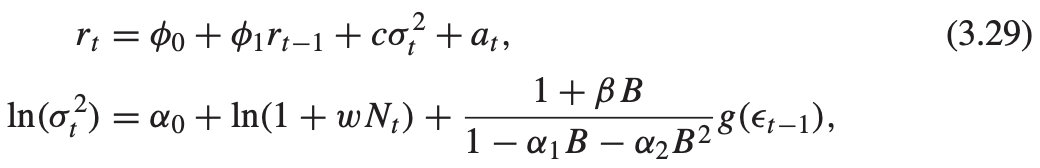

where:
- $\sigma_t^2$ is the conditional variance of $a_t$ given $F_{t-1}$.
- $N_t$ is the number of nontrading days between trading days t-1 and t.
- these are real parameters:
    - $\alpha_0$
    - $\omega$
- similar to a GARCH-M model, the parameter c in (3.29) is the risk premium parameter.
- $g(\epsilon_t)$ is defined in equation (3.24)

(3.24)

$$\large g(\epsilon_t) = \theta\epsilon_t + \gamma[\lvert\epsilon_t\lvert - E(\lvert\epsilon_t\lvert)]$$

- $\epsilon$ follows a generalized error distribution in equation (3.10)

[copied from section 3.4.3]

$\epsilon_t$ may assume a **generalized error distribution (GED)** with PDF:

(3.10)

$$ \large \text{f(x)} = \frac{\text{v} \times \text{exp}(-\frac{1}{2}|\frac{x}{\lambda}|^v)}{\lambda 2^{1+\frac{1}{v}}\Gamma(\frac{1}{v})}$$

where
- $-\infty < x < \infty$
- $0 < v ≤ \infty$
- $\Gamma$ is the gamma function
- $\lambda$:

$$\large \lambda = \left[2^{-\frac{2}{v}}\frac{\Gamma(\frac{1}{v})}{\Gamma(\frac{3}{v})}\right]^{\frac{1}{2}}$$

This distribution reduces to a Gaussian distribution if v = 2 and it has heavy tails when v < 2.  The **conditional log likelihood function** $\ell(a_{m+1}, ..., a_T|,\boldsymbol\alpha, \mathbf{A_m})$ can easily be obtained.

[end copy]

Table 3.3 gives parameter estimates and standard errors of the model.

The mean equation of the model (3.29) has 2 interesting features:
- The model uses an AR(1) model to represent possible serial correlation of the excess returns
- The model use volatility $\sigma_t^2$ as a regressor to account for risk premium

Results:
- the [-3.361] estimated risk premium is negative [as expected] but [-3.362/2.026] statistically insignificant.

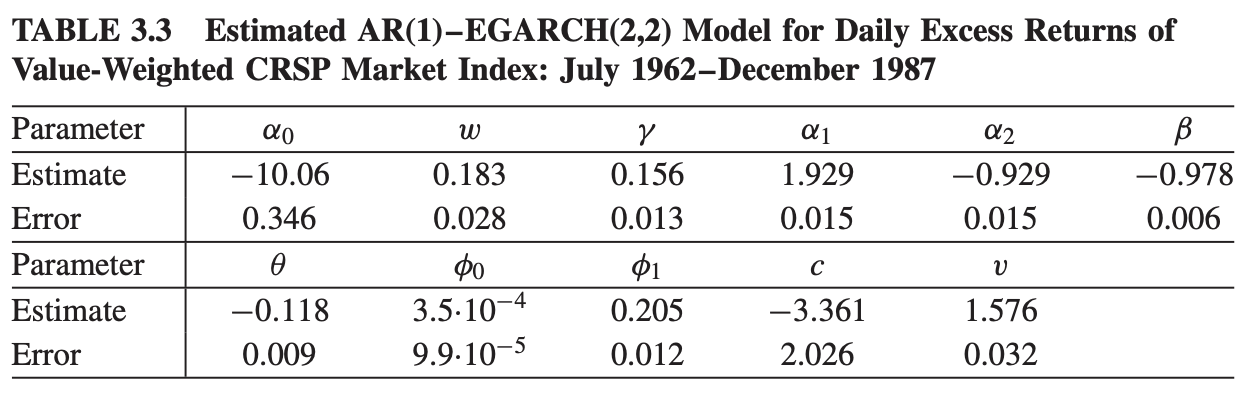

[Pluggging in some of these parameter values:]

(3.29)

$$\large r_t = 3.5 x 10^{-4} + 0.205 r_{t-1} + (-3.361) \sigma_t^2 + a_t,$$

$$\large ln(\sigma_t^2) = (-10.06) + ln (1 + 0.183 N_t) + \frac{1 + (-0.978)B}{1 - 1.929 B - (-0.929) B^2} g(\epsilon_{t-1})$$


$$\large \lambda = \left[2^{-\frac{2}{1.576}}\frac{\Gamma(\frac{1}{1.576})}{\Gamma(\frac{3}{1.576})}\right]^{\frac{1}{2}}$$

(3.10)

$$ \large \text{f(x)} = \frac{\text{1.576} \times \text{exp}(-\frac{1}{2}|\frac{x}{\lambda}|^{1.576})}{\lambda 2^{1+\frac{1}{1.576}}\Gamma(\frac{1}{1.576})}$$

(3.24)

$$\large g(\epsilon_t) = (-0.118)\epsilon_t + \gamma[\lvert\epsilon_t\lvert - E(\lvert\epsilon_t\lvert)]$$

[where copied from 3.4.2: Gamma is used in Student's t distribution in the next cell

Gamma function used originally to compute z!

!https://en.wikipedia.org/wiki/Gamma_function

$\large \Gamma(z) = \int_0^\infty x^{z-1} e^{-x} dx$

Gamma is used in Student's-t probability density function

https://en.wikipedia.org/wiki/Student%27s_t-distribution

appearing as 

$\large \Gamma \left(\frac{v+1}{2}\right)$

and as 

$\large \Gamma \left(\frac{v}{2}\right)$

where v = fixed degrees of freedom, the function below computes / plots gamma for $z = \frac{v+1}{2}$

[end Gamma copy]

[...but unable to proceed any further.]

[thoughts:]
- [so it's not only EGARCH, MGARCH but also IGARCH since $sum(\alpha_i)=1$].

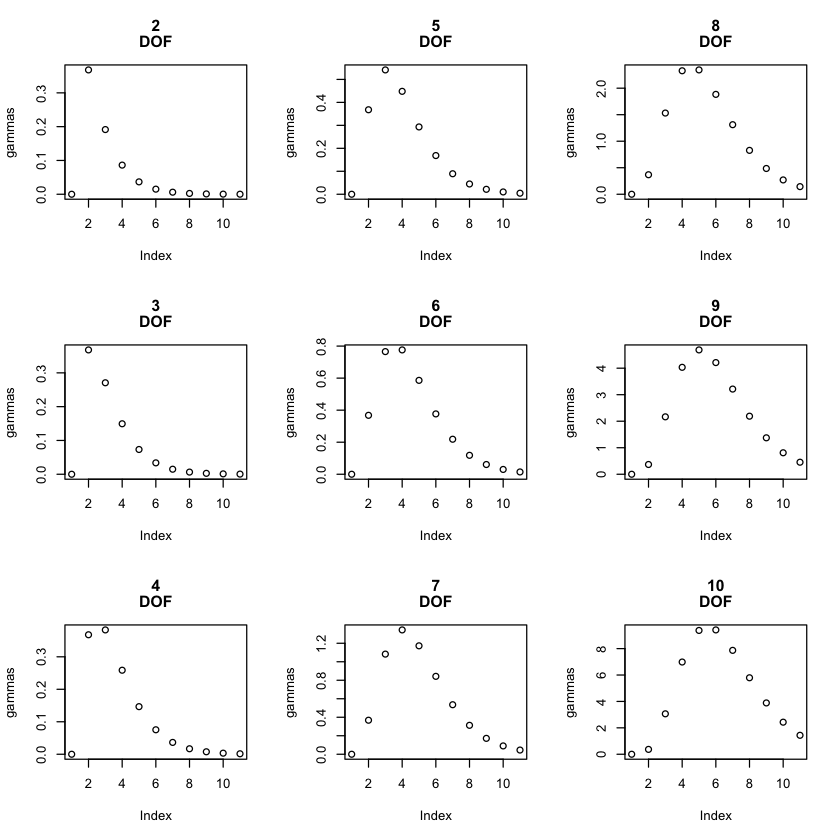

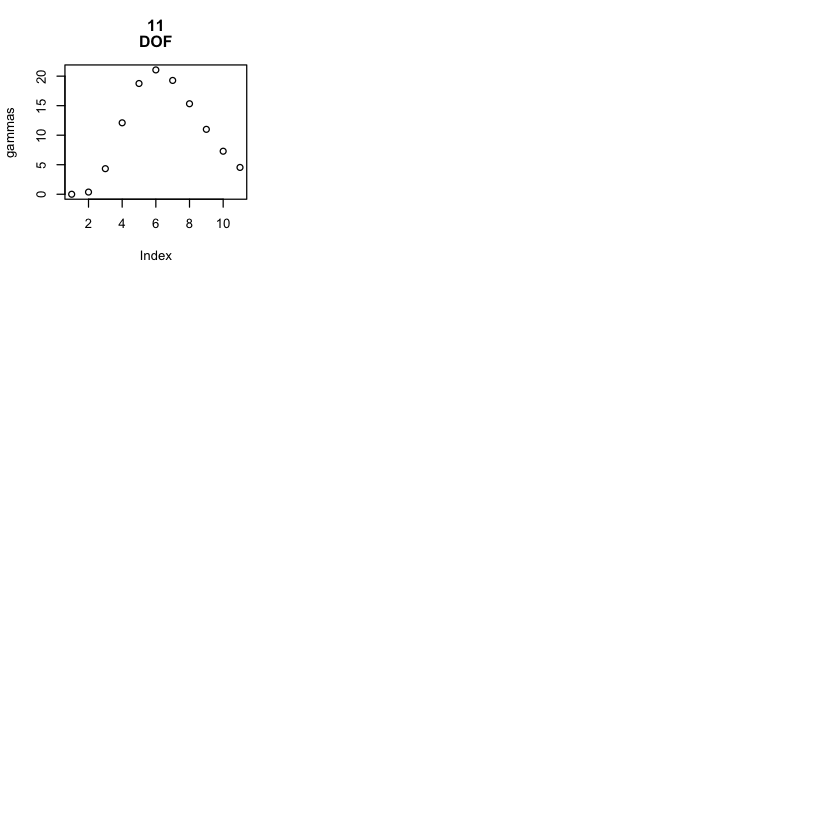

In [2]:
# v degrees of freedom in student t distribution
par(mfcol=c(3,3))
for (v in 2:11) {
    gammas = c()
    for (x in 0:10) {
        z = (v+1)/2
        y = x**(z-1) * exp(-x)
        gammas = c(gammas, y)
    }
    plot(gammas, main=c(v,'DOF'))
}

## 3.8.3 Second example

864 observations of monthly log returns of IBM stock from Jan 1926 to Dec 1997.

AR(1)-EGARCH(1,1) model is fitted:

$$
\begin{align}
\large r_t & = 0.0105 + 0.092 r_{t-1} + a_t, \;\; a_t = \sigma_t \epsilon_t, &(3.30)\\  
\large ln(\sigma_t^2) & = -5.496 + \frac{g(\epsilon_t)}{1-0.856B},&\\  
\large g(\epsilon_{t-1}) & = - 0.0795 \epsilon_{t-1} + 0.2647 \left( \lvert \epsilon_{t-1} \lvert - \sqrt{\frac{2}{\pi}} \right) & (3.31)\\
\end{align}$$

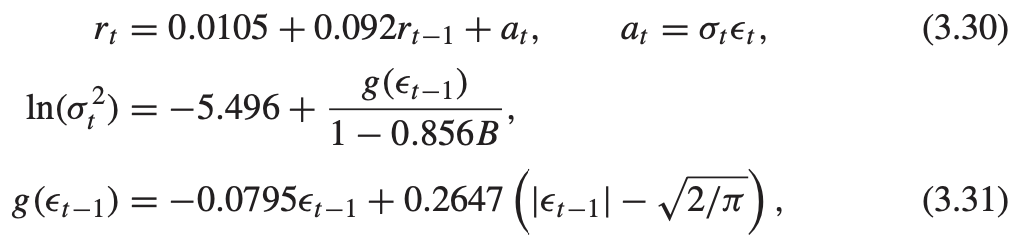

where:
- $\{\epsilon_t\}$ is a sequence of independent Gaussian random variables.
- $E(\lvert \epsilon \lvert) = \sqrt{\frac{2}{\pi}}$ for standard normal in the above formula I think.]

Adequacy:
- All parameter estimates are statistically significant at the 5% level.
- Model checking: 
    - Ljung-Box statistics:  X.XX = standard error and (Y.YY) - p value
        - Q(10) = 6.31(0.71), Q(20) = 21.40(0.32) for the standardized residual process $\tilde{a}_t = \frac{a_t}{\sigma_t}$
        - Q(10) = 4.13(0.90), Q(20) = 15.93(0.66) for the squared process $\tilde{a}_t^2 [= \left( \frac{a_t}{\sigma_t} \right)^2$
    - Therefore no serial correlation or conditional heteroscedasticity in the standardized residuals of the fitted model.
- The AR(1)-EGARCH(1,1) model is adequate.

From the estimated volatility equation (3.31),
using $\sqrt{\frac{2}{\pi}} \approx 0.7979$, obtain the volatlity equation:

$$\large 
ln(\sigma_t^2) = -1.001 + 0.856 ln(\sigma_{t-1}^2) + 
\begin{cases}
0.1852 \epsilon_{t-1} & \text{ if } \epsilon_{t-1} ≥ 0\\
-0.3442 \epsilon_{t-1} & \text{ if } \epsilon_{t-1} < 0\\
\end{cases}
$$

Taking antilog transformation:

$$\large 
\sigma_t^2 = \sigma_{t-1}^{2 \times 0.856} e^{-1.001} \times  
\begin{cases}
e^{0.1852 \epsilon_{t-1}} & \text{ if } \epsilon_{t-1} ≥ 0\\
e^{-0.3442 \epsilon_{t-1}} & \text{ if } \epsilon_{t-1} < 0\\
\end{cases}
$$

This EGARCH model equation represents the asymmetric volatility responses to past positive and negative shocks.  For example, a standardized shock with magnitude 2 (standard deviations) generates an impact 37.4% greater for negative shocks than positive shocks of this size. 

This example clearly demonstrates the asymmetric feature of EGARCH models.  In general, the bigger the shock the larger the difference in volatility impact with EGARCH models.

Extending sample period to include the log returns from 1998 to 2003 for a total 993 observations, here employs S-Plus to fit an EGARCH(1,1) model given here:

$$\large \begin{align}
r_t &= 0.0118 + a_t, \;\; a_t = \sigma_t \epsilon_t, &\\
ln(\sigma_t^2) &= -0.557 + 0.220 \frac{\lvert a_{t-1} \lvert - 0.264 a_{t-1}}{\sigma_{t-1}} + 0.929 ln(\sigma_{t-1}^2), & (3.32)\\
\end{align}
$$

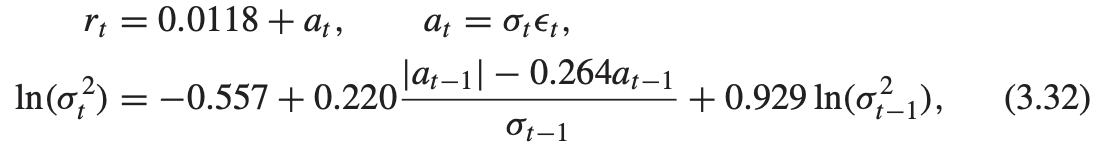

where:
- $\epsilon_t$ follows a GED distribution with parameter 1.5

Adequacy:
- Ljung-Box statistics of standardized residual series and its squared process [indicate no serial correlation or conditional heteroscedasticity.]

Interpretation:
- As expected, the output shows that the estimated leverage effect is negative and is statistically significant at the 5% level with a t-ratio of -2.094.

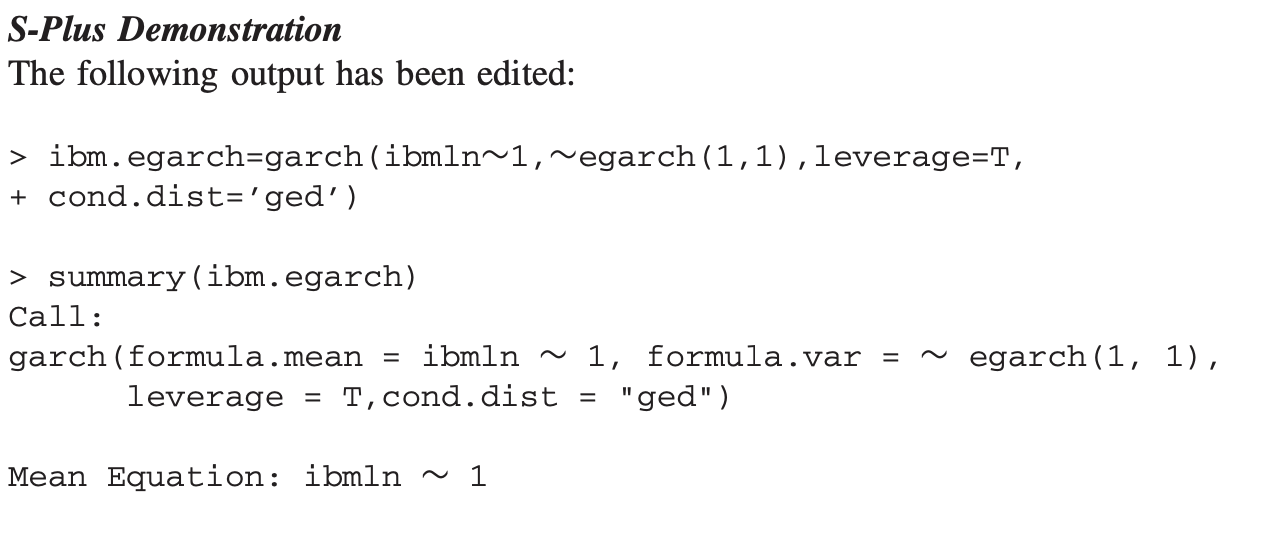
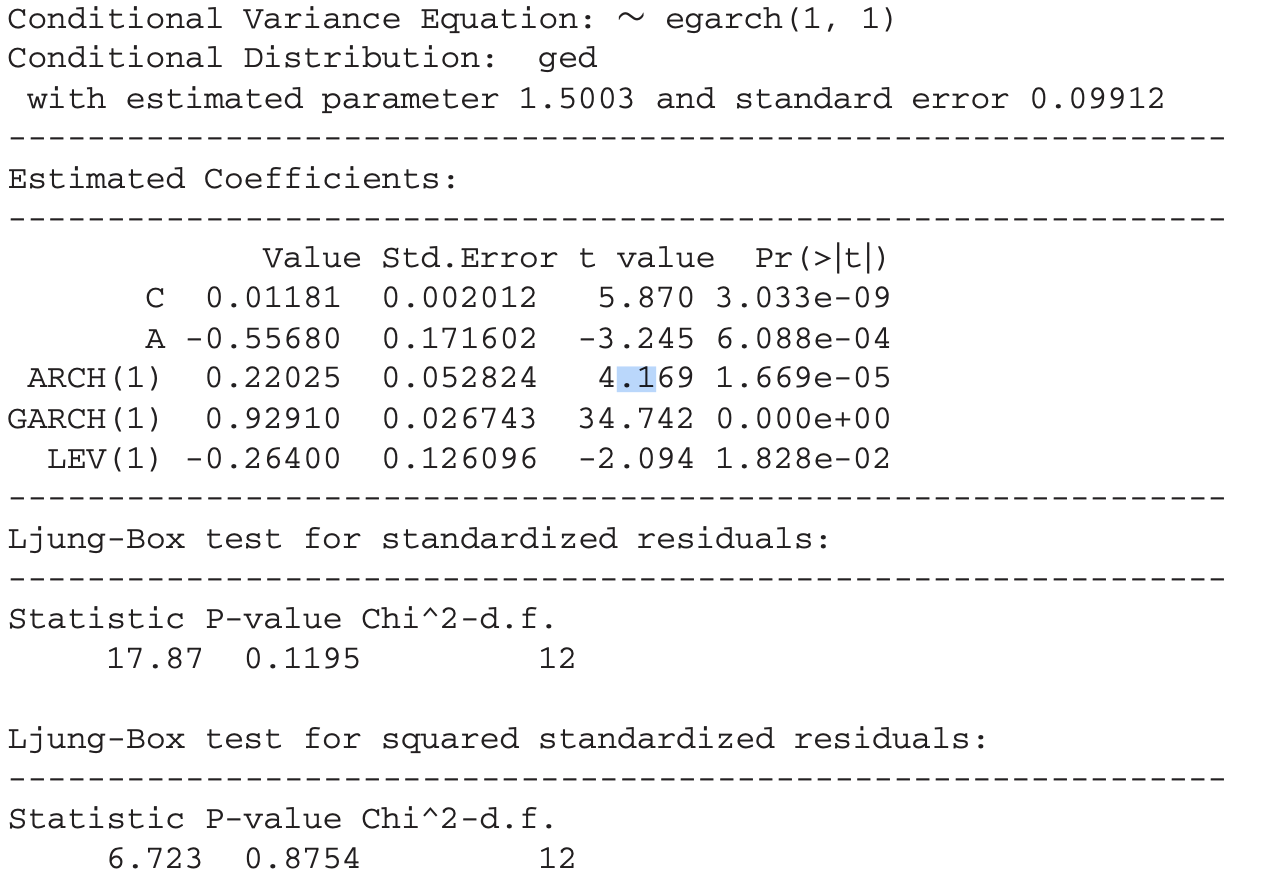


This code isnt even close in matching the first example because:
- the data is CRSP which is subscription based
- the found data is close but not **excess** returns.
- VERY interesting that rugarch publishes 2 betas when the volatility model is spec'd eGARCH c(2,2).  I thought (m,s) = (1,1) lead to a single $\alpha$ and no $\beta$'s and thus (2,2) would lead to 2 $\alpha$'s and 1 $\beta$ as this model seems to have. 

In [6]:
c(T,T,F)*c(F,T,T)

[1] 0 1 0

In [3]:
# from: https://faculty.chicagobooth.edu/ruey-s-tsay/research/analysis-of-financial-time-series-3rd-edition
# Daily simple returns of IBM stock, VW, EW, and SP5
require(rugarch)
crsp.1926.2003.m = read.table(file='m-ibmvwewsp2603.txt', header=TRUE)
crsp.1926.2003.m.date = crsp.1926.2003.m[1][,]
crsp.1926.2003.m.vw = crsp.1926.2003.m[3][,]
TF.1926.1987 = crsp.1926.2003.m.date<19880101
TF.1962.2003 = crsp.1926.2003.m.date>19620630
TF.1962.1987 = as.logical(TF.1962.2003 * TF.1926.1987)
crsp.1926.2003.m.vw.1962.1987 = c(crsp.1926.2003.m.vw[TF.1962.1987])
# leg up: https://stackoverflow.com/questions/36095658/rugarch-package-egarch-estimation
spec.EGARCHM.1 <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(2,1)), mean.model = list(armaOrder = c(1,0), include.mean = TRUE,archm = TRUE, archpow = 2), distribution.model = "ged")
 (fit.EGarchM.1 = ugarchfit(spec.EGARCHM.1, data=crsp.1926.2003.m.vw[100:200]))
# singular if use crsp.1962.1987.m.vw
crsp.1926.2003.m.vw[439:744]

Loading required package: rugarch

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma





*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(2,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: ged 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.003184    0.000239 -13.3005        0
ar1     0.327816    0.010216  32.0898        0
archm   4.937774    0.111344  44.3472        0
omega  -0.751737    0.011600 -64.8023        0
alpha1 -0.513790    0.007348 -69.9199        0
alpha2  0.307923    0.007885  39.0536        0
beta1   0.869820    0.003756 231.5668        0
gamma1  0.048322    0.003284  14.7130        0
gamma2  0.026143    0.004738   5.5175        0
shape   0.890676    0.080790  11.0245        0

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.003184    0.000049  -64.846        0
ar1     0.327816    0.002205  148.655        0
archm   4

[1]  0.06546  0.02342 -0.05015  0.00220  0.11008  0.01186  0.05185 -0.02193
  [9]  0.03292  0.04744  0.02005 -0.01803 -0.00172  0.05268 -0.01190  0.02771
 [17] -0.00555  0.02174  0.02579  0.01721  0.01764  0.00461  0.01740  0.01508
 [25]  0.02012 -0.01127  0.03048  0.00887  0.00309  0.00369  0.03865  0.00695
 [33] -0.00971  0.03365 -0.00435 -0.05187  0.01676  0.03088  0.03195  0.02927
 [41]  0.00307  0.01354  0.01212 -0.00862 -0.02092  0.02484 -0.05254 -0.01032
 [49] -0.01287 -0.07539 -0.00696  0.04229  0.01751  0.00621  0.08553  0.01094
 [57]  0.04338  0.04161 -0.03929  0.02690  0.04919 -0.00628  0.03428 -0.02743
 [65]  0.00790  0.03370 -0.03633 -0.03363  0.00512  0.09415  0.02704  0.01153
 [73] -0.02202  0.01804  0.04445  0.00904  0.05851 -0.03387 -0.00671 -0.05364
 [81]  0.03050  0.02053  0.00504 -0.06739 -0.06517  0.05149 -0.02259  0.05565
 [89] -0.03217 -0.01968 -0.07325  0.05671 -0.00473 -0.10532 -0.06435 -0.05107
 [97]  0.07417  0.05004  0.04754 -0.01821  0.05045  0.06072  0.05203  0.01691
[105]  0.04478  0.03333 -0.03641  0.00312 -0.04028  0.04251 -0.00502 -0.04068
[113] -0.00126  0.09126  0.02839  0.03135  0.00872  0.00550  0.01637 -0.02090
[121] -0.00425  0.03596 -0.00767  0.00867  0.04977  0.01124 -0.02758 -0.04449
[129] -0.00794 -0.05178 -0.02451 -0.00868  0.05710 -0.02965  0.05398 -0.00029
[137] -0.12082  0.01141  0.00443  0.00235 -0.02337 -0.04596 -0.04198 -0.02294
[145] -0.07088 -0.08775 -0.10971  0.16559 -0.04095 -0.02701  0.14150  0.05842
[153]  0.03019  0.04649  0.05514  0.05147 -0.06039 -0.02356 -0.03801  0.05586
[161]  0.03122 -0.01100  0.12601  0.00731  0.02680 -0.01039 -0.00937  0.04449
[169] -0.00616 -0.00143  0.02448 -0.02037  0.00536  0.06160 -0.03634 -0.01576
[177] -0.00925  0.00495 -0.01079  0.05137 -0.01281 -0.01335  0.00157 -0.03928
[185]  0.04543  0.00822 -0.05520 -0.00927  0.03401  0.08284  0.02324 -0.01075
[193]  0.05675  0.04235 -0.00689 -0.11100  0.03379  0.01771  0.04949 -0.02677
[201]  0.06562  0.00852 -0.01358  0.04685  0.01499  0.06473  0.00143 -0.07266
[209]  0.06360  0.02821  0.06561  0.00101 -0.12022  0.05229  0.06009  0.03771
[217]  0.06944  0.02355  0.02950  0.02008  0.10492 -0.03441 -0.04011  0.01552
[225]  0.04618 -0.01126  0.01355 -0.01023 -0.00307 -0.05628 -0.06377  0.06018
[233]  0.04584 -0.02810 -0.02621 -0.05113 -0.01009  0.04327 -0.02821 -0.02391
[241] -0.02053  0.11901  0.01676  0.11864  0.05193  0.01452  0.04184  0.03021
[249]  0.03468  0.07418  0.01322  0.03784 -0.03156  0.00347  0.01606 -0.02805
[257]  0.02955 -0.01047 -0.01302 -0.03907  0.01339  0.00254 -0.05234  0.02338
[265] -0.02062  0.11268  0.00041 -0.00008 -0.01068  0.02366  0.08572  0.01690
[273] -0.00174 -0.00220  0.05578  0.01708 -0.00025 -0.00479 -0.03982  0.04444
[281]  0.06923  0.04313  0.00983  0.07255  0.05396 -0.00790  0.05080  0.01424
[289] -0.05970  0.06618 -0.07902  0.04931  0.01508 -0.02639  0.12848  0.04790
[297]  0.02364 -0.01701  0.00513  0.04369  0.04423  0.03712 -0.02079 -0.22534
[305] -0.07229  0.07032

In [38]:
crsp.1926.1987.m.date = crsp.1926.2003.m.date<19880101
crsp.1962.2003.m.date = crsp.1926.2003.m.date>19620630
crsp.1962.1987.m.date = crsp.1926.1987.m.date * crsp.1962.2003.m.date
crsp.1962.1987.m.vw = crsp.1926.2003.m.vw[crsp.1962.1987.m.date == 1]
# leg up: https://stackoverflow.com/questions/36095658/rugarch-package-egarch-estimation
spec.EGARCHM.1 <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(2,1)), mean.model = list(armaOrder = c(1,0), include.mean = TRUE,archm = TRUE, archpow = 2), distribution.model = "ged")
# results in an error: "system is computationally singular: reciprocal conditi"
# (fit.EGarchM.1 = ugarchfit(spec.EGARCHM.1, data=crsp.1962.1987.m.vw))

In [39]:
require(rugarch)
crsp.1926.2003.m = read.table(file='m-ibmvwewsp2603.txt', header=TRUE)
crsp.1926.2003.m.date = crsp.1926.2003.m[1]
crsp.1926.2003.m.ibm = crsp.1926.2003.m[2]
crsp.1926.2003.m.ibm.1926.1997 = crsp.1926.2003.m.ibm[crsp.1926.2003.m.date<19980101]
crsp.1926.2003.m.ibm.1926.1997.ln = log(crsp.1926.2003.m.ibm.1926.1997 + 1)
# leg up: https://stackoverflow.com/questions/36095658/rugarch-package-egarch-estimation
spec.EGARCH.1 <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(1,1)), mean.model = list(armaOrder = c(1,0), include.mean = TRUE), distribution.model = "norm")
(fit.EGARCH.1 = ugarchfit(spec.EGARCH.1, crsp.1926.2003.m.ibm.1926.1997.ln))
spec.EGARCH.1


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.011896    0.002051   5.8000 0.000000
ar1     0.093255    0.029959   3.1127 0.001854
omega  -0.416275    0.180466  -2.3067 0.021074
alpha1 -0.049108    0.026733  -1.8370 0.066215
beta1   0.923856    0.032702  28.2506 0.000000
gamma1  0.206479    0.048314   4.2737 0.000019

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.011896    0.001933   6.1534 0.000000
ar1     0.093255    0.024217   3.8508 0.000118
omega  -0.416275    0.268793  -1.5487 0.121459
alpha1 -0.049108    0.035732  -1.3743 0.169334
beta1   0.923856    0.048979  18.8621 0.000000
gamma1  0.206479    0.064778   3.1875 0.001435

LogLike


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


In [40]:
#This Egarch.R is not even close to the output in the book for example 3.8.3
source("Egarch.R") # Compile R script
m1=Egarch(crsp.1926.2003.m.ibm.1926.1997.ln) # Model fitting
m1

# this data series is 516 observations vs 864 mentioned in the book.
# da=read.table("m-ibmsp6709.txt",header=T) # Load data
# length(da$ibm)  # Check sample size of the data
# ibm=log(da$ibm+1) # Take log transformation
# Box.test(ibm,lag=12,type='Ljung') # Check serial correlations
# m2=Egarch(ibm) # Model fitting
# m2

  
Estimation results of EGARCH(1,1) model: 
estimates:  -0.1508936 -0.5519429 0 -0.007064275 0.8416542 


Warning message in sqrt(diag(Hi)):
“NaNs produced”


std.errors:  NaN 0.117398 NaN NaN 0.03351117 
t-ratio:  NaN -4.701469 NaN NaN 25.11564 


$residuals
  [1]  0.140459366  0.126108997  0.028059091  0.236869455  0.187158039
  [6]  0.217140051  0.150893614  0.150893614  0.213962306  0.182644188
 [11]  0.181665273  0.180743636  0.173672201  0.228854156  0.319226112
 [16]  0.226529704  0.289794316  0.100662913  0.233293542  0.181490712
 [21]  0.169891997  0.142710221  0.237447387  0.348588067  0.191718809
 [26]  0.178508781  0.155741843  0.144030114  0.135018265  0.146885593
 [31]  0.140701854  0.220158449  0.226362802  0.186048380  0.251055641
 [36]  0.182343831  0.130660294  0.202679287  0.152442414  0.267983076
 [41]  0.139013322  0.323560380  0.254821104  0.184647488  0.101451237
 [46] -0.058642934 -0.101382705  0.327984850  0.161635711  0.216625173
 [51]  0.199035950  0.146765104  0.224013956  0.039816792  0.150893614
 [56]  0.190556537  0.031546857  0.047808286  0.173408247  0.236190189
 [61]  0.175586227  0.268854412  0.100515690  0.127614752 -0.087274746
 [66]  0.325888396  0.055241376  0.219140875 -0.109393808  0.258994372
 [71]  0.134367812  0.072596882  0.104263116  0.174483180  0.107004421
 [76] -0.031431943 -0.026440401  0.101167512  0.333881616  0.451864498
 [81]  0.175342295  0.008926743  0.048351346  0.286769756  0.171509636
 [86] -0.032248279  0.307837532  0.383084118  0.228854156  0.279726486
 [91]  0.180093129  0.210246840  0.051161673  0.134662601  0.267929704
 [96]  0.138831154  0.180229091  0.130272452  0.082646893  0.223391004
[101]  0.082154282  0.206441844  0.106032222  0.180413581  0.186608188
[106]  0.136612117  0.256613066  0.167258968  0.144312003  0.199207475
[111]  0.161061743  0.240258885  0.142236247  0.185082458  0.184231674
[116]  0.144040183  0.137038068  0.164855689  0.163296381  0.165723112
[121]  0.175127585  0.101829413  0.184792499  0.053898015  0.175283742
[126]  0.195082734  0.104786847  0.173466910  0.174785907  0.153460317
[131]  0.258886662  0.149582755  0.105509144  0.134825206  0.104441215
[136]  0.167180264  0.077494622  0.154198148  0.218552263  0.083235566
[141]  0.135779976  0.128423031  0.070854240  0.197156779  0.219766479
[146]  0.197567254  0.044988506  0.217832378  0.168723709  0.242022337
[151]  0.214009249  0.144754810  0.163128462  0.219066149  0.159456845
[156]  0.208841716  0.110217442  0.187514798  0.116240056  0.135901796
[161]  0.218776537  0.147357369  0.217214920  0.052641110  0.136033751
[166]  0.234876243  0.150893614  0.189710400  0.121505997  0.200940132
[171]  0.144080457  0.137443567 -0.025604929  0.102102450  0.175849607
[176]  0.156159724  0.241255206  0.168507574  0.157223538  0.168094822
[181]  0.151593369  0.136003302  0.184086582  0.065542676  0.215266497
[186]  0.185208081  0.176512627  0.143758218  0.176054410  0.119041685
[191]  0.154128377  0.134632110  0.032481631  0.113004814  0.113617409
[196]  0.142306853  0.189469889  0.250956120  0.178956152  0.169175478
[201]  0.154507078  0.170764867  0.208247009  0.170960912  0.227715757
[206]  0.162209349  0.192237073  0.157104288  0.199245587  0.159783978
[211]  0.136033751  0.183293038  0.169725182  0.140802874  0.118494382
[216]  0.195216673  0.121567785  0.128780921  0.253504353  0.141388584
[221]  0.164757071  0.156726569  0.163533395  0.187871429  0.157839436
[226]  0.114219256  0.213549114  0.157670599  0.135505827  0.199407550
[231]  0.141852870  0.194613805  0.194068040  0.135292548  0.156119933
[236]  0.165131769  0.191507587  0.250268250  0.245385277  0.132159216
[241]  0.174766379  0.183680211  0.206801246  0.268943281  0.198082497
[246]  0.134632110  0.163118584  0.086088391  0.064671017  0.141368393
[251]  0.153879153  0.160457732  0.201349058  0.111674501  0.138972843
[256]  0.076234721  0.191401960  0.180452417  0.193656125  0.150893614
[261]  0.153230881  0.162505930  0.204567074  0.206857982  0.068413773
[266]  0.217617246  0.198263723  0.157988387  0.189027198  0.150893614
[271]  0.101755890  0.232040328  0.101272605  0.228502594  0.122072240
[276]  0.199321808  0.202888163  0.101787400  0.198721411  0.181034771
[281]  0.1508

In [11]:
require(rugarch)
crsp.1926.2003.m = read.table(file='m-ibmvwewsp2603.txt', header=TRUE)
crsp.1926.2003.m.date = crsp.1926.2003.m[1]
crsp.1926.2003.m.ibm = crsp.1926.2003.m[2]
TF.1962.2003 = crsp.1926.2003.m.date>19620630
crsp.1926.2003.m.ibm.1962.2003 = crsp.1926.2003.m.ibm[TF.1962.2003]
crsp.1926.2003.m.ibm.1962.2003.ln = log(crsp.1926.2003.m.ibm.1962.2003 + 1)
# leg up: https://stackoverflow.com/questions/36095658/rugarch-package-egarch-estimation
spec.EGARCH.1 <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(1,1)), mean.model = list(armaOrder = c(1,0), include.mean = TRUE), distribution.model = "ged")
spec.EGARCH.1
(fit.EGARCH.1 = ugarchfit(spec.EGARCH.1, crsp.1926.2003.m.ibm.1962.2003.ln))


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  ged 
Includes Skew	:  FALSE 
Includes Shape	:  TRUE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: ged 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.007295    0.002770  2.63338 0.008454
ar1     0.043943    0.048859  0.89939 0.368446
omega  -0.223884    0.134311 -1.66691 0.095533
alpha1 -0.083945    0.033466 -2.50841 0.012128
beta1   0.958820    0.024782 38.68981 0.000000
gamma1  0.199492    0.057800  3.45142 0.000558
shape   1.848481    0.168339 10.98072 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.007295    0.002975  2.45203 0.014205
ar1     0.043943    0.051538  0.85263 0.393867
omega  -0.223884    0.162106 -1.38110 0.167249
alpha1 -0.083945    0.038616 -2.17387 0.029715
beta1   0.958820    0.029518 32.48233 0.000000
gamma1  0

## 3.8.4 Forecasting Using an EGARCH model

This EGARCH(1,1) model's multi-step forecast assumes innovations are standard Gaussian and that parameters are known.

$$\large ln(\sigma_t^2) = (1 - \alpha_1)\alpha_0 + \alpha_1 ln(\sigma_{t-1}^2) + g(\epsilon_{t-1}),$$

$$\large g(\epsilon_{t-1}) = \theta \epsilon_{t-1} + \gamma(\vert \epsilon_{t-1} \vert - \sqrt{\frac{2}{\pi}})$$

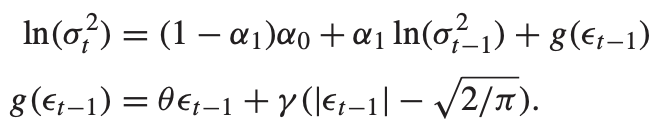

Taking exponentials the m
odel becomes:

(3.33)

$$\large \sigma_t^2 = \sigma_{t-1}^{2 \alpha_1} exp[ (1 - \alpha_1) \alpha_0] exp[g ( \epsilon_{t-1}) ],$$

$$\large g(\epsilon_{t-1}) = \theta \epsilon_{t-1} + \gamma(\vert \epsilon_{t-1} \vert - \sqrt{\frac{2}{\pi}})$$

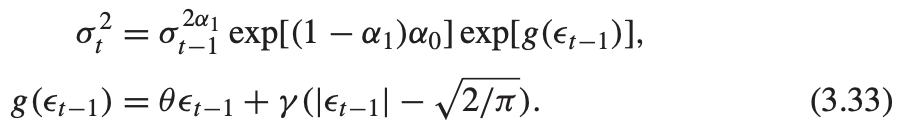

letting h = forecast origin, the 1-step ahead forecast is computed with all known quantities on the RHS:

$$\large \sigma_{h+1}^2 = \sigma_h^{2 \alpha_1} exp[ (1 - \alpha_1) \alpha_0] exp[g ( \epsilon_h) ],$$

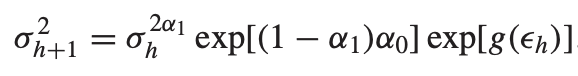

thus, the 1-step ahead volatility forecast at the forecast orgin h is:

$\large \hat{\sigma}_h^2(1) = \sigma_{h+1}^2 = \sigma_h^{2 \alpha_1} exp[ (1 - \alpha_1) \alpha_0] exp[g ( \epsilon_h) ],$

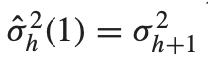

starting with (3.33) leads to the 2-step-ahead forecast:

(3.33)

$\large \sigma_t^2 = \sigma_{t-1}^{2 \alpha_1} exp[ (1 - \alpha_1) \alpha_0] exp[g ( \epsilon_{t-1}) ],$

gives:

$\large \sigma_{h+2}^2 = \sigma_{h+1}^{2 \alpha_1} exp[ (1 - \alpha_1) \alpha_0] exp[g ( \epsilon_{h+1}) ],$

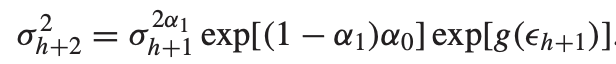

taking the conditional expectations at time h gives:

$\large \hat{\sigma}_h^2(2) = \hat{\sigma}_{h}^{2 \alpha_1}(1) exp[ (1 - \alpha_1) \alpha_0] E_h\{exp[g ( \epsilon_{h+1}) ]\},$

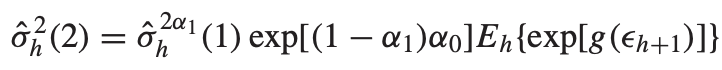

where $E_h$ denotes a conditional expectation taken at time origin h. The prior expectation can be obtained [notice his notation strips off $\epsilon$'s time subscripts that arent needed since this integral formula is all at the same time.]:

$$\large\begin{align}
E_h\{\text{exp}[g ( \epsilon) ]\} =& \int_{-\infty}^{\infty} exp[g(\epsilon)] \; f(\epsilon) \; d \epsilon\\  
=& \int_{-\infty}^{\infty} \text{exp}[\theta \epsilon + \gamma(\vert \epsilon \vert - \sqrt{\frac{2}{\pi}})] \; f(\epsilon) \; d \epsilon\\
&\text{factor non-}\epsilon \text{ items & case }\lvert \epsilon \lvert:\\
=& \text{exp}\left( -\gamma\sqrt{\frac{2}{\pi}}\right) \left[\int_0^{\infty} e^{(\theta+\gamma)\epsilon} \frac{1}{\sqrt{2\pi}} e^{-\frac{\epsilon^2}{2}} \; d \epsilon + \int_{-\infty}^0 e^{(\theta-\gamma)\epsilon} \frac{1}{\sqrt{2\pi}} e^{-\frac{\epsilon^2}{2}} \; d \epsilon \right]\\
=& exp\left( -\gamma \sqrt{\frac{2}{\pi}} \right) \left[e^{\frac{(\theta + \gamma)^2}{2}}\phi(\theta+\gamma) + e^{\frac{(\theta - \gamma)^2}{2}}\phi(\gamma-\theta)\right]\\
\end{align}$$
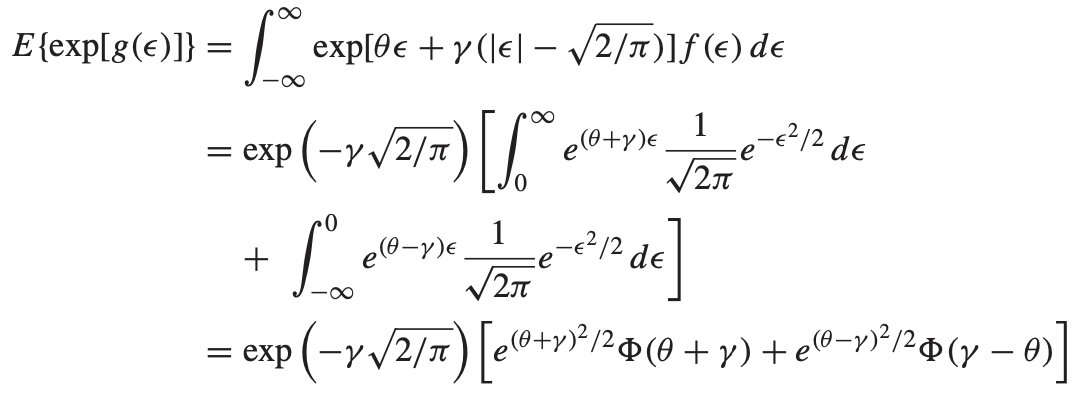

where 
- f($\epsilon$) is the probability density funciton of the standard normal distribution
- $\phi(\epsilon)$ is the cummulative density funciton of the standard normal distribution

Consequently, the 2-step-ahead volatility forecast is [dependent entirely on $\hat{sigma}_h(1)$]:

repeat previous formula:

$\large \hat{\sigma}_h^2(2) = \hat{\sigma}_{h}^{2 \alpha_1}(1) exp[ (1 - \alpha_1) \alpha_0] E_h\{exp[g ( \epsilon_{h+1}) ]\},$

insert formula for $E_h\{exp[g ( \epsilon_{h+1}) ]\}$:

$\large \hat{\sigma}_h^2(2) = \hat{\sigma}_{h}^{2 \alpha_1}(1) exp[ (1 - \alpha_1) \alpha_0] exp\left( -\gamma \sqrt{\frac{2}{\pi}} \right) \left[e^{\frac{(\theta + \gamma)^2}{2}}\phi(\theta+\gamma) + e^{\frac{(\theta - \gamma)^2}{2}}\phi(\gamma-\theta)\right],$

move $ -\gamma \sqrt{\frac{2}{\pi}}$:

$\large \hat{\sigma}_h^2(2) = \hat{\sigma}_{h}^{2 \alpha_1}(1) exp[ (1 - \alpha_1) \alpha_0 -\gamma \sqrt{\frac{2}{\pi}} ]  \left[e^{\frac{(\theta + \gamma)^2}{2}}\phi(\theta+\gamma) + e^{\frac{(\theta - \gamma)^2}{2}}\phi(\gamma-\theta)\right],$

change to his notation:

$\large \hat{\sigma}_h^2(2) = \hat{\sigma}_{h}^{2 \alpha_1}(1) exp[ (1 - \alpha_1) \alpha_0 -\gamma \sqrt{\frac{2}{\pi}} ] \times \left[exp[\frac{(\theta + \gamma)^2}{2}]\phi(\theta+\gamma) + exp[\frac{(\theta - \gamma)^2}{2}]\phi(\gamma-\theta)\right],$

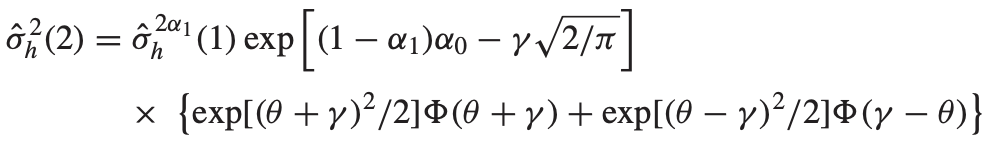

Repeating the same procedure, obtains a recursive formula for a j-step-ahead forecast [that is, use this formula over and over until j - 1 = h, i think]:

$\large \hat{\sigma}_h^2(j) = \widehat{\sigma_{h}^{2 \alpha_1}}(j-1) exp[\omega] \times \left[exp[\frac{(\theta + \gamma)^2}{2}]\phi(\theta+\gamma) + exp[\frac{(\theta - \gamma)^2}{2}]\phi(\gamma-\theta)\right],$

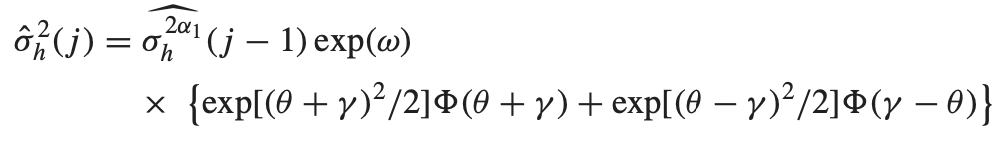

where
- $\large \omega = (1 - \alpha_1) \alpha_0 -\gamma \sqrt{\frac{2}{\pi}}$

The values of $\phi(\theta + \gamma)$ and $\phi(\gamma - \theta)$ can be obtained from most statistical packages.  Alternatively, accurate approximations of these are obtained by the method in Appendix B of Chapter 6.

### Example:

AR(1) - EGARCH(1,1) model from the previous section for monthly log returns of IBM ending 1997 Dec.  The computed EGARCH(1,1) model computes volatility forecasts for the series.  At the forecast origin t = h = 864, the forecasts are:

$\large \hat{\sigma}_864^2(1) = 6.05 x 10^{-3}$

$\large \hat{\sigma}_864^2(2) = 5.82 x 10^{-3}$

$\large \hat{\sigma}_864^2(3) = 5.635 x 10^{-3}$

$\large \hat{\sigma}_864^2(10) = 4.94 x 10^{-3}$

which converge to the sample variance 

$\large 4.37 x 10^{-3}$ of the shock process $a_t$ of equation (3.30).

$$
\begin{align}
\large r_t & = 0.0105 + 0.092 r_{t-1} + a_t, \;\; a_t = \sigma_t \epsilon_t, &(3.30)\\  
\large ln(\sigma_t^2) & = -5.496 + \frac{g(\epsilon_t)}{1-0.856B},&\\  
\large g(\epsilon_{t-1}) & = - 0.0795 \epsilon_{t-1} + 0.2647 \left( \lvert \epsilon_{t-1} \lvert - \sqrt{\frac{2}{\pi}} \right) & (3.31)\\
\end{align}$$



## 3.9 The Threshold GARCH model

Threshold GARCH:
- aka TGARCH
- Another volatility model that handles leverage effects.
- [threshold refers to a more genericized version of this model which captures volatility effect of skew that arises from return innovations less than X threshold.]
- Glosten, Jagannathan and Runkle (1993), Zakoian (1994)
    - aka **GJR model** since they originally propopsed a similar idea
- TGARCH model assumes the data is of this form:

(3.34)

$$\large \sigma_t^2 = \alpha_0 + \sum_{i=1}^s (\alpha_i + \gamma_i N_{t-i}) a_{t-i} + \sum_{j=1}^m \beta_j \sigma_{t-j}^2$$

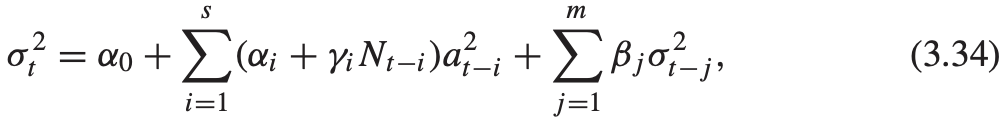

where:
- $N_{t-i}$ is an indicator for negative $a_{t-i}$:

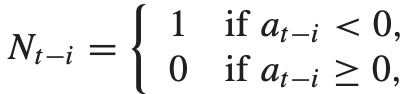

$$ N_{t-i} = 
\begin{cases}
1 & \text{if } a_{t-i} < 0,\\
0 & \text{if } a_{t-i} > 0.\\
\end{cases}$$

- [Suppose N_{t-i} might indicate a threshold other than zero in generic TGARCH.]
- $\alpha_i, \gamma_i, \beta_j$ are **nonnegative parameters** 
- $\alpha_i, \gamma_i, \beta_j$ satisfy conditions similar to those conditions of GARCH models [outside circle?].

implications:
- positive $a_{t-i}$ contributes [only] $\alpha_i a_{t-1}^2$ to $\sigma_t^2$ w
- negative $a_{t-i}$ contributes a larger impact $(\alpha_i + \gamma_i)a_{t-i}^2$ [when] $\gamma_i>0$
- [unsaid: - negative $a_{t-i}$ contributes a larger impact $(\alpha_i + \gamma_i)a_{t-i}^2$ [when] $\gamma_i<0$ which can represent skew to upside returns by deemphasizing negative innovations.]
- the [this] model uses **zero** as its threshold to separate the impact of past shocks.  
- Other thresholds can be used; Chapter 4 discusses the general concept of threshold models.  

illustration / example:
- log returns IBM 1926 - 2003
- the fitted TGARCH(1,1) model with conditional GED innovations:

(3.35)

$$\large r_t = 0.0121 + a_t, a_t = \sigma_t \epsilon_t,$$

$$\large \sigma_t^2 = 3.45 \times 10^{-4} + (0.0658 + 0.0843 N_{t-1}) a_{t-1}^2 + 0.81812 \sigma_{t-1}^2$$

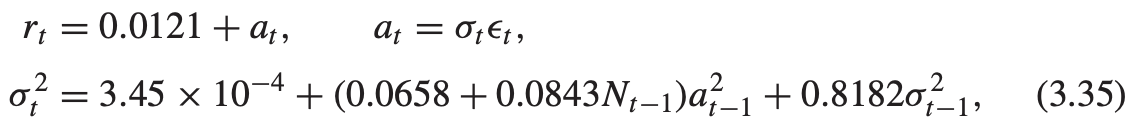

where:
- the estimated parameter of the GED is 1.51 with standard error 0.099. [Is this $\epsilon_t$?]
- the standard error of the parameter for the mean equation is 0.002.
- the standard error of the parameters for the volatility equation are respectively:
    - $1.26 \times 10^{-4}$
    - 0.0314
    - 0.0395 
    - 0.049
    
To check the fitted model: "the model is adequate in modeling the first two conditional moments of the log returns series." 
- Q(12) = 18.34(0.106) for the standardized residuals $\tilde{a}_t$
- Q(12) = 5.36(0.95) for $\tilde{a}_t^2$
- based on the fitted model, the leverage effect is significant at the 5% level.

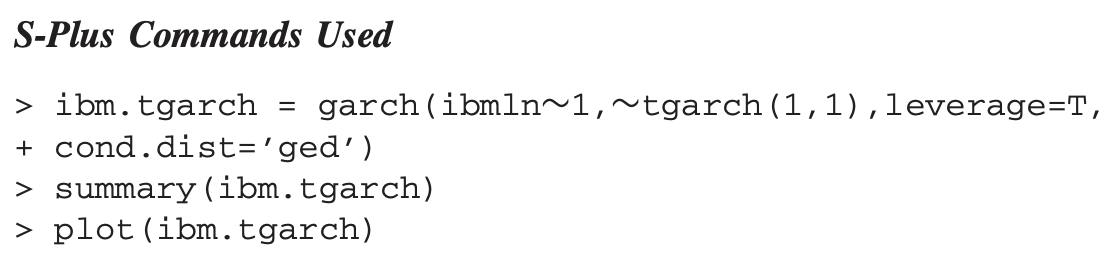

Interesting to compare models from equation (3.32) [EGARCH] and equation (3.35) [TGARCH] for the monthly log returns IBM stock. [restating those here:]

$$\large \begin{align}
r_t &= 0.0118 + a_t, \;\; a_t = \sigma_t \epsilon_t, &\\
ln(\sigma_t^2) &= -0.557 + 0.220 \frac{\lvert a_{t-1} \lvert - 0.264 a_{t-1}}{\sigma_{t-1}} + 0.929 ln(\sigma_{t-1}^2), & (3.32)\\
\end{align}
$$

$$\large \begin{align}
r_t &= 0.0121 + a_t, \;\; a_t = \sigma_t \epsilon_t,&\\
\sigma_t^2 &= 3.45 \times 10^{-4} + (0.0658 + 0.0843 N_{t-1}) a_{t-1}^2 + 0.81812 \sigma_{t-1}^2 & (3.35)
\end{align}$$

The two models provide similar leverage effects:

Assume ...

$ \large a_{t-1} = \pm 2 \sigma_{t-1} \text{ so that } \epsilon_{t-1} = \pm 2$ 

... The EGARCH(1,1) model gives:

$\large \frac{ln(\sigma_t^2 (\epsilon_{t-1} = -2))}{ln(\sigma_t^2 (\epsilon_{t-1} = 2))} = \frac{-0.577 + 0.220 \frac{\lvert a_{t-1} \lvert - 0.264 a_{t-1}}{\sigma_{t-1}} + 0.929 ln(\sigma_{t-1}^2)}{-0.577 + 0.220 \frac{\lvert a_{t-1} \lvert - 0.264 a_{t-1}}{\sigma_{t-1}} + 0.929 ln(\sigma_{t-1}^2)}$

$\large \frac{ln(\sigma_t^2 (\epsilon_{t-1} = -2))}{ln(\sigma_t^2 (\epsilon_{t-1} = 2))} = \frac{-0.577 + 0.220 \frac{\lvert (\epsilon_{t-1} \sigma_{t-1}) \lvert - 0.264 (\epsilon_{t-1} \sigma_{t-1})}{\sigma_{t-1}} + 0.929 ln(\sigma_{t-1}^2)}{-0.577 + 0.220 \frac{\lvert (\epsilon_{t-1} \sigma_{t-1}) \lvert - 0.264 (\epsilon_{t-1} \sigma_{t-1})}{\sigma_{t-1}} + 0.929 ln(\sigma_{t-1}^2)}$

$\large \frac{ln(\sigma_t^2 (\epsilon_{t-1} = -2))}{ln(\sigma_t^2 (\epsilon_{t-1} = 2))} = \frac{-0.577 + 0.220 [\lvert (\epsilon_{t-1}) \lvert - 0.264 (\epsilon_{t-1})] + 0.929 ln(\sigma_{t-1}^2)}{-0.577 + 0.220 [\lvert (\epsilon_{t-1}) \lvert - 0.264 (\epsilon_{t-1})] + 0.929 ln(\sigma_{t-1}^2)}$

$\large \frac{ln(\sigma_t^2 (\epsilon_{t-1} = -2))}{ln(\sigma_t^2 (\epsilon_{t-1} = 2))} = \frac{-0.577 + 0.220 [\lvert -2 \lvert - 0.264 (-2)] + 0.929 ln(\sigma_{t-1}^2)}{-0.577 + 0.220 [\lvert +2 \lvert - 0.264 (+2)] + 0.929 ln(\sigma_{t-1}^2)}$

$\large \frac{ln(\sigma_t^2 (\epsilon_{t-1} = -2))}{ln(\sigma_t^2 (\epsilon_{t-1} = 2))} = \frac{-0.577 + 0.220 [+2 - 0.264 (-2)] + 0.929 ln(\sigma_{t-1}^2)}{-0.577 + 0.220 [+2 - 0.264 (+2)] + 0.929 ln(\sigma_{t-1}^2)}$

$\large \frac{ln(\sigma_t^2 (\epsilon_{t-1} = -2))}{ln(\sigma_t^2 (\epsilon_{t-1} = 2))} = \frac{-0.577 + 0.220 [+2 - 0.264 (-2)] + 0.929 ln(\sigma_{t-1}^2)}{-0.577 + 0.220 [+2 - 0.264 (+2)] + 0.929 ln(\sigma_{t-1}^2)}$

$\large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} = \frac{e^{-0.577} e^{0.220 [+2 - 0.264 (-2)]} e^{0.929 ln(\sigma_{t-1}^2)}}{e^{-0.577} e^{0.220 [+2 - 0.264 (+2)]} e^{0.929 ln(\sigma_{t-1}^2)}}$

$\large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} = \frac{ e^{0.220 [+2 - 0.264 (-2)]}}{e^{0.220 [+2 - 0.264 (+2)]} }$

$\large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} =  e^{0.220 [+2 - 0.264 (-2)]- 0.220 [+2 - 0.264 (+2)]} $

$\large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} =  e^{0.220 [- 0.264 (-2)]- 0.220 [- 0.264 (+2)]} $

$\large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} =  e^{0.220 [0.264 (2)]+ 0.220 [0.264 (2)]} $

$\large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} =  e^{0.220 (2) [0.264 (2)]} $

$\large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} =  e^{0.220 \times 2 \times 0.528} \approx 1.262$

[my numbers in last line above and his number here:]

$ \large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} = e^{0.22 \times 2 \times 0.632} \approx 1.264 [\longleftarrow \text{wrong} \approx 1.321]$

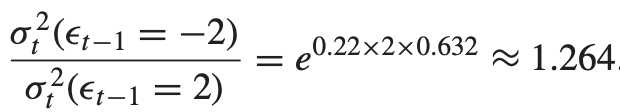

[wtf do not get that!]

On the other hand, ignoring the constant term 0.000345, the TGARCH(1,1) model gives:

$ \large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} \approx \frac{[(0.0658 + 0.0843) a_{t-1}^2 + 0.8182] \sigma_{t-1}^2}{(0.0658 \times a_{t-1}^2 + 0.8182)\sigma_{t-1}^2} = 1.312$

$ \large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} \approx \frac{[(0.0658 + 0.0843) (\epsilon_{t-1} \sigma_{t-1})^2 + 0.8182] \sigma_{t-1}^2}{(0.0658 \times (\epsilon_{t-1} \sigma_{t-1})^2 + 0.8182)\sigma_{t-1}^2} = 1.312$

$ \large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} \approx \frac{[(0.0658 + 0.0843) (-2 \sigma_{t-1})^2 + 0.8182] \sigma_{t-1}^2}{(0.0658 \times (+2 \sigma_{t-1})^2 + 0.8182)\sigma_{t-1}^2} = 1.312$

$ \large \frac{\sigma_t^2 (\epsilon_{t-1} = -2)}{\sigma_t^2 (\epsilon_{t-1} = 2)} \approx \frac{[(0.0658 + 0.0843) 4 + 0.8182] \sigma_{t-1}^2}{(0.0658 \times 4 + 0.8182)\sigma_{t-1}^2} = 1.312$

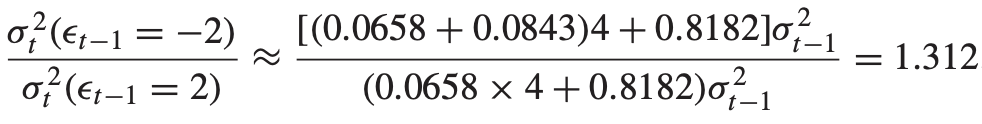


Thus, the two models, EGARCH and TGARCH, give similar leverage effects.

$ $

## 3.10 The CHARMA model

Econometric models describe the evolution of conditional variance $\sigma_t^2$ from (3.2):

(3.2)

$$ \large \mu_t = E(r_t|F_{t-1}), \,\,\, \sigma_t^2 = \text{Var}(r_t|F_{t-1}) = E[(r_t - \mu_t)^2|F_{t-1}]$$

The conditional heteroscedastic ARMA (CHARMA) model 
- CHARMA uses random coefficients to produce conditional heteroscedasticity, Tsay (1987).  
- The CHARMA model is not the same as the ARCH model
- CHARMA and ARCH model both have similar second order conditional properties. 
- CHARMA model is defined as:

(3.36)

$$\large r_t = \mu_t + a_t, \;\; a_t = \delta_{1t} a_{t-1} + \delta_{2t} a_{t-2} + \dots + \delta_{mt}a_{t-m} + \eta_t$$

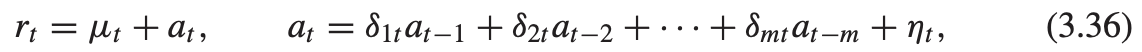

where:
- $\large \{\eta_t\}$ 
    - is a Gaussian white noise series with: 
        - mean zero 
        - variance $\large \sigma_{\eta}^2$
- $\large \{\boldsymbol{\delta}_t\} = \{(\delta_{1t}, \dots, \delta_{mt})'\}$ 
    - is a sequence [a matrix] of iid random vectors with: 
        - mean zero
        - **nonnegative definite covariance matrix** $\large \mathbf{\Omega}$
        - [note: I think the vectors inside $\large \{\boldsymbol{\delta}_t\}$ are iid with respect to each other, but the items within each vector $\large \boldsymbol{\delta}_t$ are not iid with respect to each other and this intra vector set of relationships is described in $\Omega$]
        [each element of which describes how $\large \boldsymbol\delta_t$ covaries with its precedents $\large \boldsymbol\delta_{t-i}$ i from 1 to m] 
- the series $\{\delta_t\}$ is **independent** of the series $\{\eta_t\}$.
    - [so, each time step t has a vector containing m number of $\large \delta_{(1 \ldots m)t}$ describing relations $a_t$ to its precedents:   
    $\large (\delta_{1t}, \dots, \delta_{mt})'$, ...]  
    - [... and the **sequence** of all time steps' **iid random vectors** is a matrix subscripted t containing vectors subscripted `it` where i ranges from 1 to m and the **iid** means that relations between $a_t$ and its precedents at time step t=1 e.g. will be **iid** of $a_t$ and its precedents at time step t=2:]
    $\large \{\boldsymbol{\delta}_t\}$  $\large = \{(\delta_{1t}, \dots, \delta_{mt})'\}$  
    
[Don't be confused: $\large \{\boldsymbol{\delta}_t\}$ is not $\large \boldsymbol{\Omega}$.  The former has a time subscript and so changes as time marches in a series.  The former is the relationship between $a_t$ and $a_{t-1}$.  The latter has no time subscript and so is abstract to time marching, applying across the whole of time.  The latter is the relationship, I think, of the variances of coefficients $\delta_t$ describing the relationship between $a_t$ and $a_{t-1}$. Thus any extra jiggle in those coefficients contrbutes to the condtional variance of $a_t$.]

This section uses basic properties of vector and matrix operations to simplify the presentation; consult Chapter 8 appendix A to review these properties.  
- [Appendix A is replciated just after this section.]
- [CHARMA differs from past models in that m past lagged **values** of $\large a_{t-i}$ are grouped into a **vector** $\large \boldsymbol{a_{t-1}'}$ that is multiplied by a vector of m parameters $\large \mathbf{\delta_t}$.]
- [Do note that vector $\large \boldsymbol{a_{t-1}'}$ multiplies vector $\large \mathbf{\delta_t}$ and each $\large \boldsymbol{\delta_t}$  is different and **iid** from the next $\large \boldsymbol{\delta_t}$.

For m > 0, the model can be written:

$$\large a_t = \boldsymbol{a_{t-1}' \delta_t} + \eta_t$$

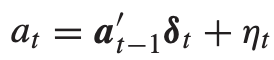

where $\large \boldsymbol{a_{t-1}} = (a_{t-1}, \dots, a_{t-m})'$: 
- is a vector of lagged values of $a_t$ and 
- is available at time t-1. 

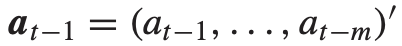

The conditional variance of $a_t$ of the CHARMA model in (3.36) [at time t] is:

(3.37)

$$\large \begin{align}
\sigma_t^2 
& = \sigma_{\eta}^2 + \boldsymbol{a}_{t-1}'Cov(\boldsymbol{\delta}_{t})\boldsymbol{a}_{t-1}\\
& = \sigma_{\eta}^2 + (a_{t-1}, \ldots, a_{t-m}) \boldsymbol\Omega (a_{t-1}, \ldots, a_{t-m})' \end{align}$$

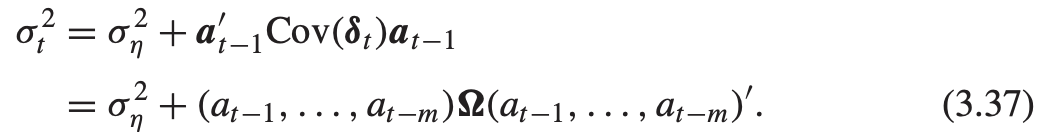

[notice that in the first line: vector $\boldsymbol{a}_{t-1}$ and vector $\boldsymbol{\delta}_t$ have different subscripts. The former is a vector of prior innovations $a_{t-1} \ldots a_{t-m}$ and the latter is a covariance matrix among the coefficent parameters  $\delta_{1t} \ldots \delta_{mt}$ for the single time step t.  The delta coefficent parameters do not contribute variance, but their jiggle as quantified in $\Omega$ and individually in $\omega$ does, and since deltas are only a percent or correlation between $a_t$ and $a_{t-i}$, deltas must be multiplied by the innovation to arrive at a covariance (and variance).  This is made clearer in the second line by speling out the contents of $\boldsymbol{a}_{t-1}$ and replacing with $\boldsymbol\Omega$ in the second line.]

Denote the (i,j)th element of $\large \boldsymbol\Omega$ by $\large \omega_{ij}$ where:
- because the matrix $\large \boldsymbol\Omega$ is symmetric, $\large \omega_{ij} =  \omega_{ji}$
- if m = 1, then (3.37) reduces to an ARCH(1) model    
$$\large \sigma_t^2 = \sigma_{\eta}^2 + \omega_{11} a_{t-1}^2$$
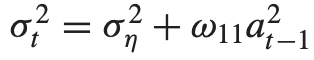
- if m = 2, then (3.37) reduces to a form "that differs from an ARCH(2) model by the cross product term a_{t-1}a_{t-2}" [and the associated covariance / correlation term]:
$$\large \sigma_t^2 = \sigma_{\eta}^2 + \omega_{11} a_{t-1}^2 + 2 \omega_{12} a_{t-1} a_{t-2} + \omega_{22} a_{t-2}^2$$

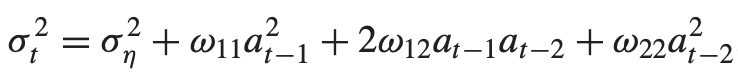

[$\large \boldsymbol\Omega$ is the covariance of $\large \delta_t$ **not** $a_t$!! Make sure to REALIGN comments to this as commments currently treat it as covariance of a_t.  And this explains why $a_t$ and $a_{t-1}$ scale the $\omega$s.]

[this representation makes me think $\large \boldsymbol\Omega$ is correlation not covariance since it it scaled by $a_{t-1}^2, a_{t-2}^2,a_{t-1}a_{t-2}$.  No.  $\large \boldsymbol\Omega$ contained variance and covariance of $\delta_t$ vector items.  Since $\delta$ vector items are correlations, $\Omega$ needs innovations to be covariances. ]

In general, the conditional variance of a CHARMA(m) model is equivalent to that of an ARCH(m) model ... 
- if $\large \boldsymbol\Omega$ is a diagonal matrix 
- [that is if $\omega_{ij} = 0$ for i≠j i.e. when the covariance ($\delta_{t-1}, \delta_{t-2}$) does not contribute to the conditional variance but  $\omega_{ij} ≠ 0$ for i=j when the variances $\delta_{t-1}^2$ and $\delta_{t-2}^2$ do contribute to the conditional variance as they do in an ARCH(2) model.]

Because $\large \boldsymbol\Omega$ is a covatiance matrix which is nonnegative definite and $\sigma_{\eta}^2$ is a variance which is positive, the following holds: the positiveness of $\sigma_t^2$ is automatically satisfied under a CHARMA model:

$$\large \sigma_t^2 > \sigma_{eta}^2 > 0 \text{ for all t}$$

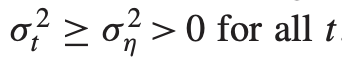

[$\delta_t$ relates the variance and cova$a_t$ to $a_{t-1}, a_{t-2}$ and $\omega$ provides the the variance of and covariance amoung $\delta_t$ items: variance of $\delta_{t-1}$ and the covariance between $\delta_{t-1}, \delta_{t-2}$; if that covariance is zero then items of the $\delta_t$ vector $\delta_{t-1}, \delta_{t-2}$ e.g. are independent and only their individual variances contribute **as is true in ARCH models.**. (the $\delta_t$ vectors inside the sequence $\{\delta_t\}$ are assumed iid, but the items within each $\delta_t$ vector in that sequence are not assumed iid).  The point is $\delta$ relates past innovations to innovations and $\omega$ provides past (variances and contributing covariances) of those % or correlation relationshps.]

An obvious difference between ARCH and CHARMA models is that CHARMA uses crossproducts of the lagged values of $a_t$ in the volatility equation.  
- Usefulness is in modeling asset return series where cross product terms denote interactions between previous returns. It's conceivable that stock volatility depends on such interactions [if e.g. there's no relationship from time period to time period maybe volatility does not sustain.]
- However the number of cross-product terms increases rapidly with the order m and some constraints are needed to keep the model simple. 
    - One possible constraint is to use a small number of cross-product terms in a CHARMA model. 
    
Another difference between ARCH and CHARMA models is that the higher order properties of CHARMA models are harder to obtain than those of ARCH models because it is generally harder to handle multiple random variables.

To illustrate, employ the CHARMA model for monthly excess returns on the S&P 500 index used previously in GARCH modeling.

$$\large r_t = \phi_0 + a_t, \;\; a_t = \delta_{1t} a_{t-1} + \delta_{2t} a_{t-2} + \eta_t$$

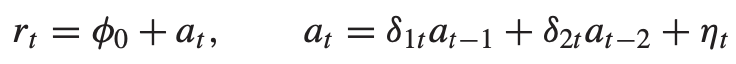

The fitted model is in the form of (3.37):

(3.37)

$$\large \begin{align}
\sigma_t^2 
& = \sigma_{\eta}^2 + \boldsymbol{a}_{t-1}'Cov(\boldsymbol{\delta}_{t})\boldsymbol{a}_{t-1}\\
& = \sigma_{\eta}^2 + (a_{t-1}, \ldots, a_{t-m}) \boldsymbol\Omega (a_{t-1}, \ldots, a_{t-m})' \end{align}$$

$$\large r_t = 0.00635 + a_t, \;\; \sigma_t^2 = 0.00179 + (a_{t-1}, a_{t-2}) \hat{\boldsymbol{\Omega}} (a_{t-1}, a_{t-2})'$$

where

$$\large \hat{\boldsymbol{\Omega}} = \begin{bmatrix}
0.1417(0.0333) & −0.0594(0.0365)\\
−0.0594(0.0365) & 0.3081(0.0340)\\
\end{bmatrix}$$

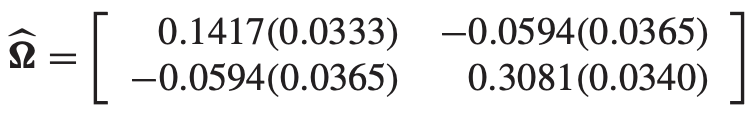

where: 
- the numbers in paretheses are the standard errors.
- the [-0.0594] cross-product term of $\large \hat{\boldsymbol{\Omega}}$ has a t-ratio of -1.63 [= −0.0594/0.0365=1.62739726027397]which is marginally significant at the 10% level.  

If the model is refined [expanded] to [a higher order m = 3]

$$\large r_t = \phi_0 + a_t, \;\; a_t = \delta_{1t} a_{t-1} + \delta_{2t} a_{t-2} + \delta_{3t} a_{t-3} + \eta_t$$

but assume that [the $\delta_t$ vector items] $\delta_{3t}$ is uncorrelated with $(\delta_{1t}, \delta_{2t})$ then this model is fitted:

$$\large r_t = 0.0068 + a_t, \;\; \sigma_t^2 = 0.00136 + (a_{t-1}, a_{t-2}, a_{t-3}) \hat{\boldsymbol{\Omega}} (a_{t-1}, a_{t-2}, a_{t-3})'$$

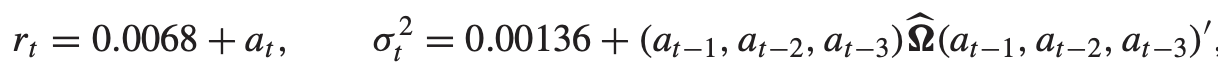

where

$$\large \hat{\boldsymbol{\Omega}} = \begin{bmatrix}
0.1212(0.0355) & −0.0622(0.0283) & 0\\
−0.0622(0.0283) & 0.1913(0.0254) & 0\\
0 & 0 & 0.2988(0.0420)\\
\end{bmatrix}$$

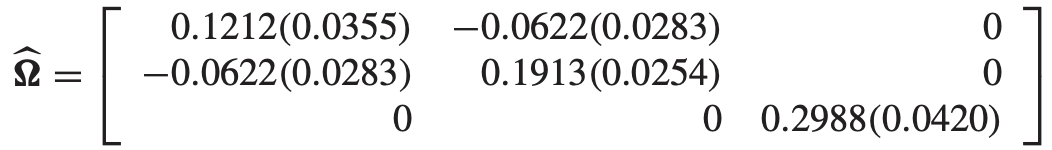

where:
- All of the estimates are now statistically significant at the 5% level.  
- $a_t = r_t - 0.0068$ is the deviation of the monthly excess return from its average. [average is 0.0068?]
- The fitted CHARMA model shows that there is some interaction effect between the first two lagged deviations.  Indeed the volatility equation can be written approximately as 


$$\large \sigma_t^2 = 0.00136 + 0.1212 a_{t-1} + (2 \times −0.0622) a_{t-1} a_{t-2} + 0.1913 a_{t-2}^2 + 0.2988 a_{t-3}^2$$

$$\large \sigma_t^2 = 0.00136 + 0.12 a_{t-1} - 0.12 a_{t-1} a_{t-2} + 0.19 a_{t-2}^2 + 0.30 a_{t-3}^2$$

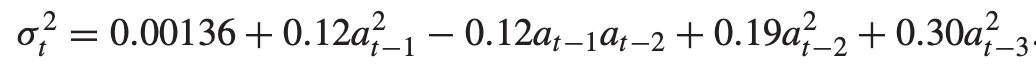

### 3.10.1 Effects of Explanatory Variables

The CHARMA model is generalized so that volatility of $r_t$ depends on explanatory variables [$x_{it} \text{ that replace and could include the innovations } a_{t-i}$].  

Let $\large \{x_{it}\}_{i=1}^m$ be explanatory variables available at time t

(3.38)

$$\large r_t = \mu_t + a_t, \;\; a_t = \sum_{i=1}^m \delta_{it} x_{i,t-1} + \eta_t,$$

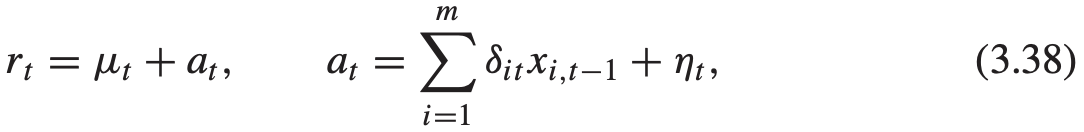

where 
- $\large \boldsymbol{\delta}_t = (\delta_{1t}, \ldots, \delta_{mt})'$ is a random vector as defined in (3.36)
- $\large \eta_t$ is a random variable as defined in (3.36)

[start copy paste]

(3.36)

$$\large r_t = \mu_t + a_t, \;\; a_t = \delta_{1t} a_{t-1} + \delta_{2t} a_{t-2} + \dots + \delta_{mt}a_{t-m} + \eta_t$$

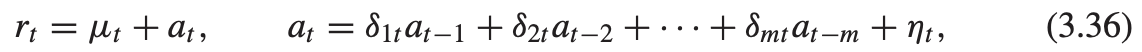

where:
- $\large \{\eta_t\}$ 
    - is a Gaussian white noise series with: 
        - mean zero 
        - variance $\large \sigma_{\eta}^2$
- $\large \{\boldsymbol{\delta}_t\} = \{(\delta_{1t}, \dots, \delta_{mt})'\}$ 
    - is a sequence [a matrix] of iid random vectors with: 
        - mean zero
        - **nonnegative definite covariance matrix** $\large \mathbf{\Omega}$
        - [note: I think the vectors inside $\large \{\boldsymbol{\delta}_t\}$ are iid with respect to each other, but the items within each vector $\large \boldsymbol{\delta}_t$ are not iid with respect to each other and this intra vector set of relationships is described in $\Omega$]
- the series $\{\delta_t\}$ is **independent** of the series $\{\eta_t\}$.

[end copy and paste]

Then the conditional variance of $\large a_t$ is:

$$\large \sigma_t^2 = \sigma_{\eta}^2 + (x_{1,t-1}, \ldots, x_{m,t-1}) \boldsymbol\Omega (x_{1,t-1}, \ldots, x_{m,t-1})'$$

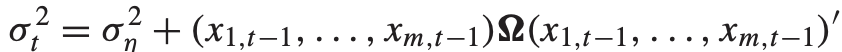

In application, the explanatory variables may include some lagged values of $a_t$.  [This makes sense since this formula for conditional variance looks like that of (3.36) that employs $a_t$ instead of $x_t$:]

(3.37)

$$\large \begin{align}
\sigma_t^2 
& = \sigma_{\eta}^2 + \boldsymbol{a}_{t-1}'Cov(\boldsymbol{\delta}_{t})\boldsymbol{a}_{t-1}\\
& = \sigma_{\eta}^2 + (a_{t-1}, \ldots, a_{t-m}) \boldsymbol\Omega (a_{t-1}, \ldots, a_{t-m})' \end{align}$$

## 3.11 Random Coefficient Autoregressive Models RCA

The Random Coefficient Autoregressive RCA model 
- is introduced in literature to account for variability among studied subjects.  
- is similar to 
    - panel data analysis in econometrics. 
        - [time series data: single individual at multiple time intervals; panel data = longitudinal data: multiple individuals at multiple time intervals; cross sectional data: multiple observations at the same point in time. panel data is a subsect of longitudinal data where observations are for the same subjects each time.]
    - the hierarchical model in statistics.
        - hierarchical model sorts lower levels under a hierarchy of successively higher levels e.g. in an ANOVA.
        
        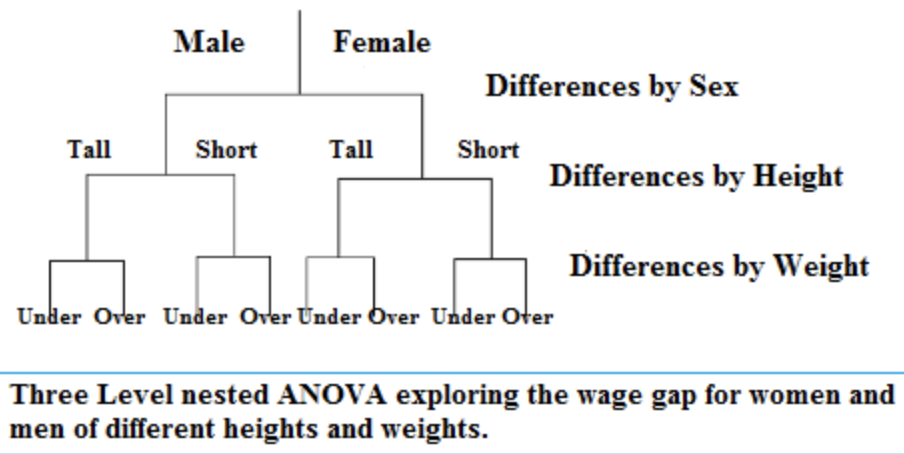
        
- is classified here as a conditional heteroscedastic model
- is historically used to obtain an improved description of the conditional mean equation of the process by allowing for the parameters to evolve over time. 

A time series $r_t$ is said to follow an RCA(p) model if it satisfies:

(3.39)

$$\large r_t = \phi_0 + \sum_{i=1}^p (\phi_i + \delta_{it})r_{t-i} + a_t$$

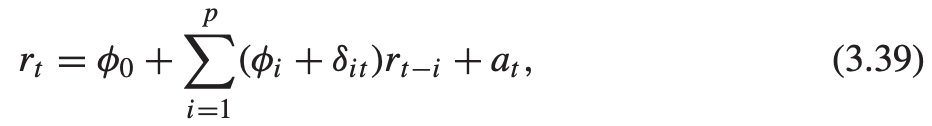

[Over and over, $\delta_{it}$ is the employed parameter or parameters with i subscript for the parameter number and t subscript because $\delta_{it}$ varies one time step to the next time step. Letting i vary from 1 to p is the same as having the vector of $\boldsymbol{\delta_t}$ used in previous section.]

[this differs from previous presentatin becayuse $\delta_t$ is used in the mean equation for $r_t $ rather than in the volatiilty equation to describe $\sigma_t$]

where:
- p is a positive integer 
- $\large \{\boldsymbol{\delta}_t\} = \{(\delta_{1t}, \ldots, \delta_{pt})'\}$ is a sequence of independent random vectors with mean zero and covariance matrix $\large \boldsymbol{\Omega}$
- $\large \{\boldsymbol{\delta}_t\}$ is independent of $\large \{a_t\}$.  
    - [In previous presentation when $\large \{\boldsymbol{\delta}_t\}$ was in the volatility equation, $\large \{\boldsymbol{\delta}_t\}$ was independent of $\eta_t$.]
- Nicholls and Quinn (1982) provide discussion of the model.

The conditional mean and variance of the RCA model in (3.39) are:

$$\large \mu_t = E(r_t|F_{t-1}) = \phi_0 + \sum_{i=1}^p \phi_i r_{t-i}$$

$$\large \sigma_t^2 = \sigma_a^2 + (r_{t-1}, \ldots, r_{t-p}) \boldsymbol{\Omega_{\delta}} (r_{t-1}, \ldots, r_{t-p})'$$

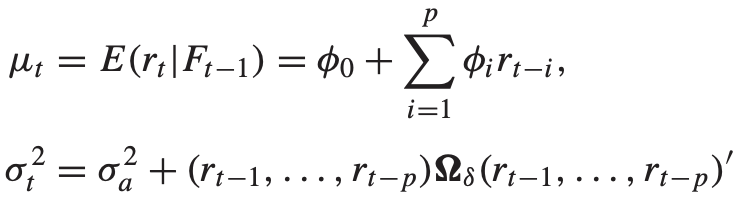

[The mean is such because as defined for (3.36) for CHARMA, "$\large \{\boldsymbol{\delta}_t\} = \{(\delta_{1t}, \ldots, \delta_{mt})'\}$ is a sequence of iid random vectors with mean zero..." and innovations $a_t$ have mean zro as well.] 

which is in the same form as that of a CHARMA model.  However there is a subtle difference between RCA and CHARMA models. 
- For the RCA model, the volatility is a quadratic function of the observed lagged values $\large r_{t-i}$.  
- For the CHARMA model, the volatility is a quadratic function of the lagged innovations $\large a_{t-i}$. 

## 3.12 Stochastic Volatility Model

The Stochastic Volatility (SV) model 
- is an alternative approach that describes the volatility evolution of time series data by introducing an innovation to the conditional variance equation of $a_t$.  
- see: Melino and Turnbull (1990), Taylor (1994), Harvey, Ruiz, and Shephard (1994), and Jacquier, Polson, and Rossi (1994).  
- Similar to EGARCH, SV models ensure positiveness of conditional variance by using $ln(\sigma_t^2)$ instead of $\sigma_t^2$
- is defined as:

(3.40)

$$\large a_t = \sigma_t \epsilon_t, \;\; (1 - \alpha_1 \beta^1 - \cdots - \alpha_m \beta^m) ln (\sigma_t^2) = \alpha_0 + v_t$$

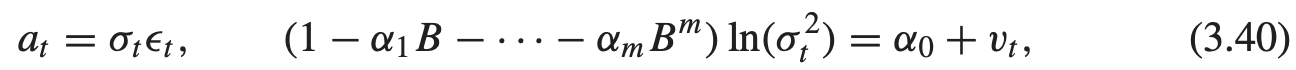

where:
- the $\epsilon_t$ are iid *N (0,1)*
- the $v_t$ are iid N (0, $\sigma_v^2$)
- $\{\epsilon_t\} \text{ and } \{v_t\}$ are independent
- $\alpha_0$ is a constant
- all zeros of the polynomial $\large 1 - \sum_{i=1}^m \alpha_i \beta^i$ are greater than 1 in modulus.

Adding the innovation $v_t$ substantially increases the flexibility of the model in describing the evolution of $\sigma_t^2$ but also increases the difficulty in parameter estimation.
- SV model estimation requires a quasi-likelihood method via Kalman filtering or a Monte Carlo method.
    - https://en.wikipedia.org/wiki/Quasi-likelihood
- Jacquier, Polson, and Rossi (1994) compare estimation results between quasi-likelihood and Markov chain Monte Carlo (MCMC) methods. 
- The difficulty estimating SV model arises because for each shock $a_t$, the model uses 2 innovations. $\large \epsilon_t \text{ and } v_t$
- Chapter 12 discusses MCMC methods estimating SV models.
- Taylor (1994) discusses stochastic volatility models.
- Jacquier, Polson, and Rossi (1994) appendixes provide the properties of SV models when m = 1; for example with m = 1:

https://www.scirp.org/pdf/JMF_2017060111325248.pdf

[mine starts]

(3.40)

$\large (1 - \alpha_1 B^1 - \cdots - \alpha_m B^m) ln (\sigma_t^2) = \alpha_0 + v_t$

set m = 1:

$\large (1 - \alpha_1 B^1) ln (\sigma_t^2) = \alpha_0 + v_t$

B impact is removed because of stationarity: $ln (\sigma_t^2) = B^i ln (\sigma_t^2)$: 

$\large (1 - \alpha_1) ln (\sigma_t^2) = \alpha_0 + v_t$

move $\large (1 - \alpha_1)$:

$\large ln (\sigma_t^2) = \frac{\alpha_0 + v_t}{(1 - \alpha_1)}$

For the mean, take the expectation:

$\large E\left[ln (\sigma_t^2) = \frac{\alpha_0 + v_t}{(1 - \alpha_1)} \right]$

mean of innovation $v_t = 0$:

$\large E[ln (\sigma_t^2)] = \frac{\alpha_0}{(1 - \alpha_1)}$

For variance, take the variance:

$\large \text{Var}\left[(1 - \alpha_1) ln (\sigma_t^2) = \alpha_0 + v_t \right]$

separate:

$\large \text{Var}\left[(1 - \alpha_1) ln (\sigma_t^2)\right] = \text{Var}[\alpha_0 + v_t]$

pull out unvarying element $(1-\alpha_1)$ ?:

$\large (1 - \alpha_1) \text{Var}\left[ln (\sigma_t^2)\right] = \text{Var}[\alpha_0 + v_t]$

move $(1 - \alpha_1)$:

$\large \text{Var}[ln (\sigma_t^2)] = \frac{\text{Var}[\alpha_0 + v_t]}{(1 - \alpha_1)}$

separate:

$\large \text{Var}[ln (\sigma_t^2)] = \frac{\text{Var}\alpha_0}{(1 - \alpha_1)} + \frac{\text{Var}v_t}{(1 - \alpha_1)}$

relabel $v_t$ as $\sigma_v^2$:

$\large \text{Var}[ln (\sigma_t^2)] = \frac{\text{Var}(\alpha_0)}{(1 - \alpha_1)} + \frac{\sigma_v^2}{(1 - \alpha_1)}$

$\large \text{Var}[ln (\sigma_t^2)] = \frac{\sigma_v^2}{(1 - \alpha_1)}$

Thus $ln(\sigma_t^2)$ is sourced from Normal distribution with mean and variance as defined:

$$\large ln(\sigma_t^2) ~ N \left( \frac{\alpha_0}{(1 - \alpha_1)}, \frac{\sigma_v^2}{(1 - \alpha_1)} \right)$$


He adds h.  And what is 'h' ?
"Where ht represents the log-volatility" or "Another possible interpretation for ht is to characterize the regime in which financial markets are operating and then it could be described by a discrete va- lued variable. " from pp 495 of https://www.scirp.org/pdf/JMF_2017060111325248.pdf

[mine ends]

$$\large ln(\sigma_t^2) \sim N \left( \frac{\alpha_0}{1-\alpha_1}, \frac{\sigma_v^2}{1-\alpha_1^2} \right) \equiv N(\mu_h, \sigma_h^2)$$

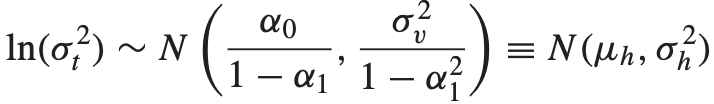

and 

[why??]
[begin mine]

(3.40)

$\large a_t = \sigma_t \epsilon_t$

square it:

$\large a_t^2 = \sigma_t^2 \epsilon_t^2$

exp[ln(x)] = x:

$\large a_t^2 = exp[ln(\sigma_t^2)] \epsilon_t^2$

expected $\large ln(\sigma_t^2)$ is $\large \frac{\alpha_0}{(1 - \alpha_1)}$ aka $\large \mu_h$:

$\large E(a_t^2) = exp[\frac{\alpha_0}{(1 - \alpha_1)}] E(\epsilon_t^2)$

[end mine]

[his]:

$\large E(a_t^2) = exp(\mu_h + \frac{\sigma_h^2}{2})$

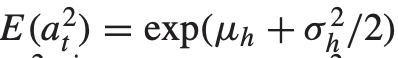

$\large E(a_t^4) = 3 exp(2\mu_h^2 + 2\sigma_h^2)$

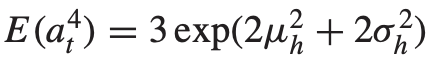

$\large corr(a_t^2, a_{t-i}^2) = \frac{exp(\sigma_h^2 \alpha_1^i) - 1}{3 exp(\sigma_h^2) - 1}$
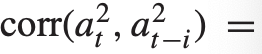
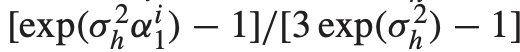

Limited experience shows that SV models provide improvments in model fitting, but their contributions to out-of-sample volatility forecasts received mixed results.

## 3.13 Long-Memory Stochastic Volatility Model

Long-Memory SV model extends the SV model to allow for long memory in volatility using **fractional difference**.  Chapter 2 mentioned that: A time series is a long memory process if its autocorrelation function decays at a **hyperbolic** instead of **exponential** rate as the lag increases:] 

[This doesnt make sense to me since hyperbolic goes to infinity faster than exponetial.

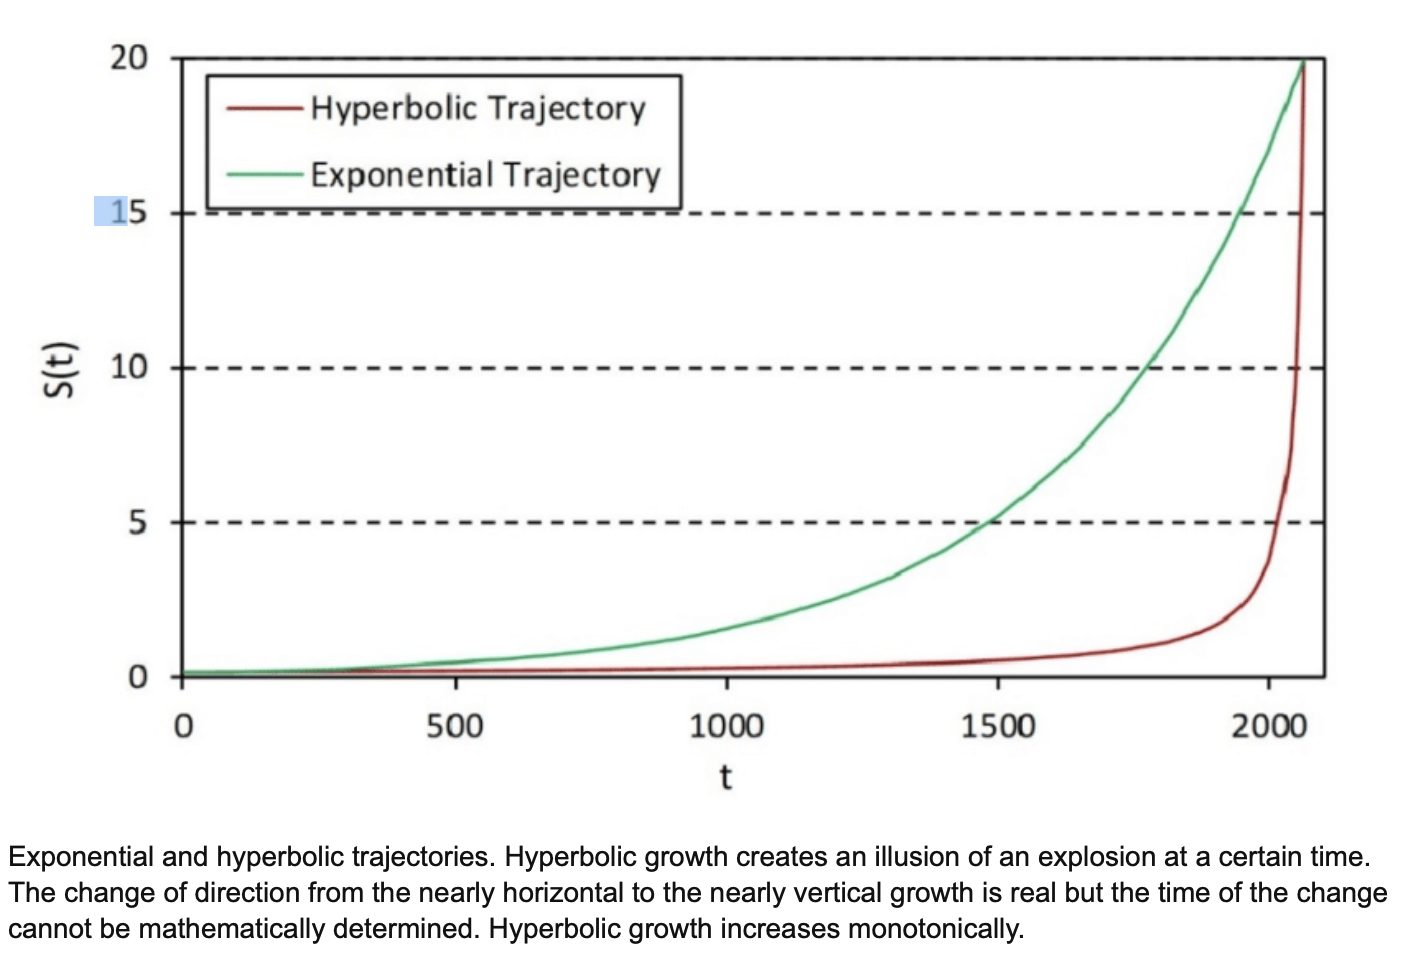

https://en.wikipedia.org/wiki/Hyperbolic_growth

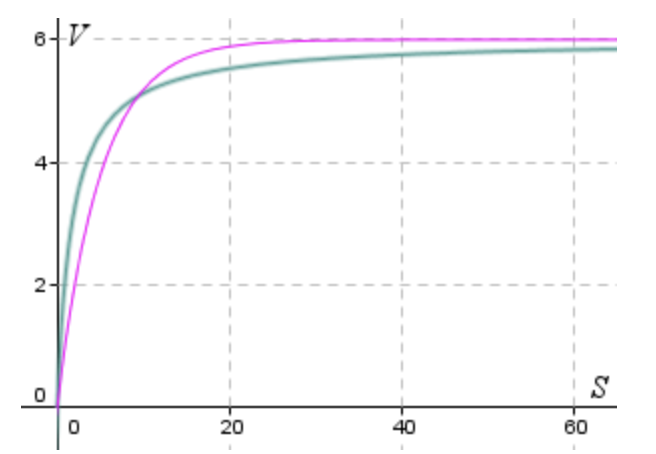

https://www.intmath.com/blog/mathematics/hyperbolic-and-exponential-discounting-10115

The extension to long-memory models in volatility study is motivated by the fact that the autocorrelation function of the squared or absolute-valued series of an asset return often decays slowly even though the return series has no serial correlation; see Ding, Granger, and Engle (1993).  

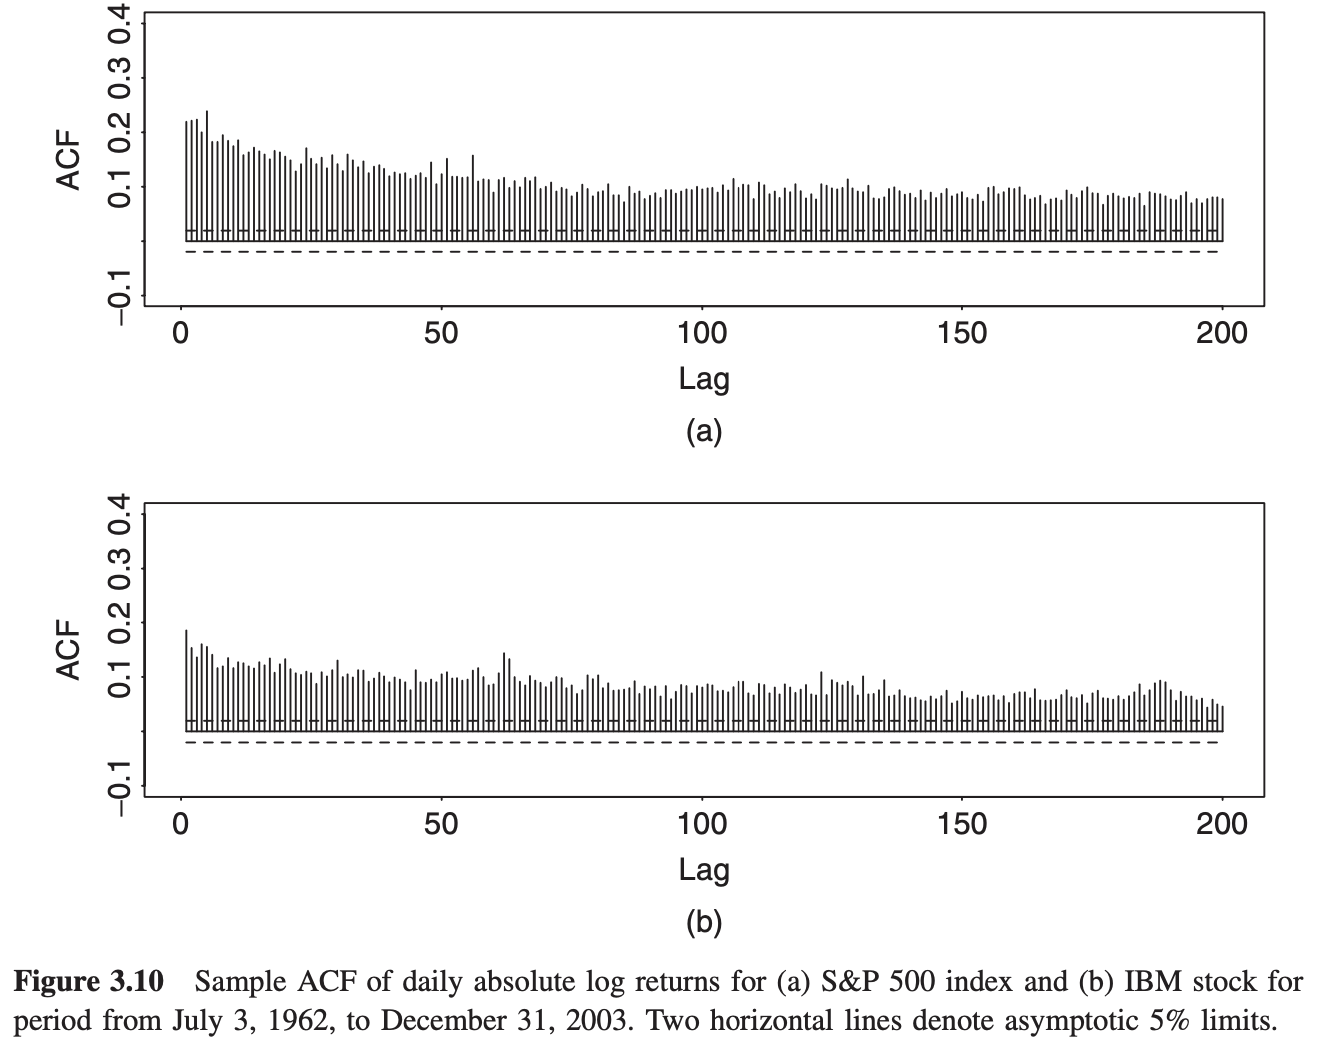

Figure 3.10 shows the sample ACF of the daily absolute returns for IBM stock and S&P 500 index from 3 July 1962 to 31 December 2003.  Theses sample ACFs are positive with moderate magnitude but decay slowly. 

A simple **long-memory stochastic volatility (LMSV)** model is written:

[wtf is u?]

(3.41)

$$ \large a_t = \sigma_t \epsilon_t, \;\; \sigma_t = \sigma \, \text{exp}(\frac{u_t}{2}), \;\; (1 - B)^d u_t = \eta_t$$

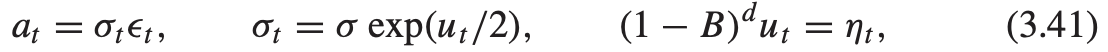

where:
- $\sigma > 0$
- the $\epsilon_t$ are iid N(0,1)
- the $\eta_t$ are iid $N(0,\sigma_{\eta}^2)$
- the $\eta_t$ are independent of the $\sigma$
- $0 < d < 0.5$

The feature of long memory stems from the fractional difference $(1-B)^d$ which implies that the ACF of $u_t$ decays slowly at a hyperbolic instead of exponential rate as the lag increases. [Would exponential decay have $[(1-B)^i]_{i=1}^m$ where hyperbolic limits 0 < d < 0.5?]

Model (3.41) yields ...

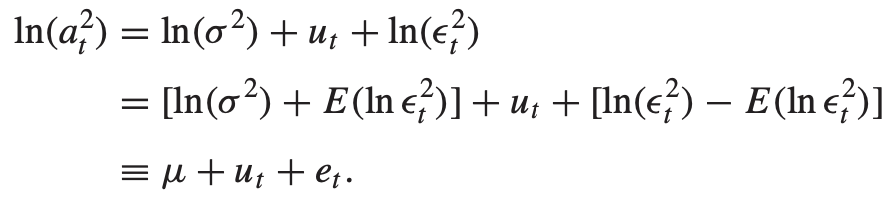

obtained in this way ...

$ \large \begin{align} a_t 
& = \sigma_t \epsilon_t \\
& = \sigma_t^2 \epsilon_t^2 \\
& = (\sigma e^{\frac{u_t}{2}})^2 \epsilon_t^2 \\
& = (\sigma^2 e^{\frac{(u_t)(2)}{2}}) \epsilon_t^2 \\
& = \sigma^2 e^{u_t} \epsilon_t^2 \\
ln(a_t^2) 
& = ln(\sigma^2 e^{u_t} \epsilon_t^2) \\
& = ln(\sigma^2) + ln(e^{u_t}) + ln(\epsilon_t^2) \\
& = ln(\sigma^2) + u_t + ln(\epsilon_t^2) \\
& = ln(\sigma^2) + u_t + ln(\epsilon_t^2) + E(ln \epsilon_t^2) - E(ln \epsilon_t^2) \\
& = [ln(\sigma^2) + E(ln \epsilon_t^2)] + u_t + [ln(\epsilon_t^2) - E(ln \epsilon_t^2)] \\
& \equiv \mu + u_t + e_t \\
\end{align}$
[???]

Thus, the ln(a_t^2) series is a Gaussian long-memory signal plus a non-Gaussian white noise; see Breidt, Crato, and de Lima (1998). [???]

Estimation of LMSV model is complicated but the fractional difference parameter d can be estimated by using eiher quasi-maximum likelihoood method or a regression method.  Using the log series of squared daily returns for companies in the S&P500 index, Bollerslev and Jubnski (1999) and Ray and Tsay (2000) found the median estimate of d is about 0.38.  

Ray and Tsay (2000) studied common long-memory components of daily stock volatilities of groups of companies classified by various characteristics, and found that companies of same industrial sector have more common long-memory components.

## 3.14 Application

Practical problems are investigated for this chapters volatility models using 888 monthly log returns (dividend inclusive) of IBM stock and the S&P 500 index Jan 1926 to Dec 1999 shown in figure 3.11.  

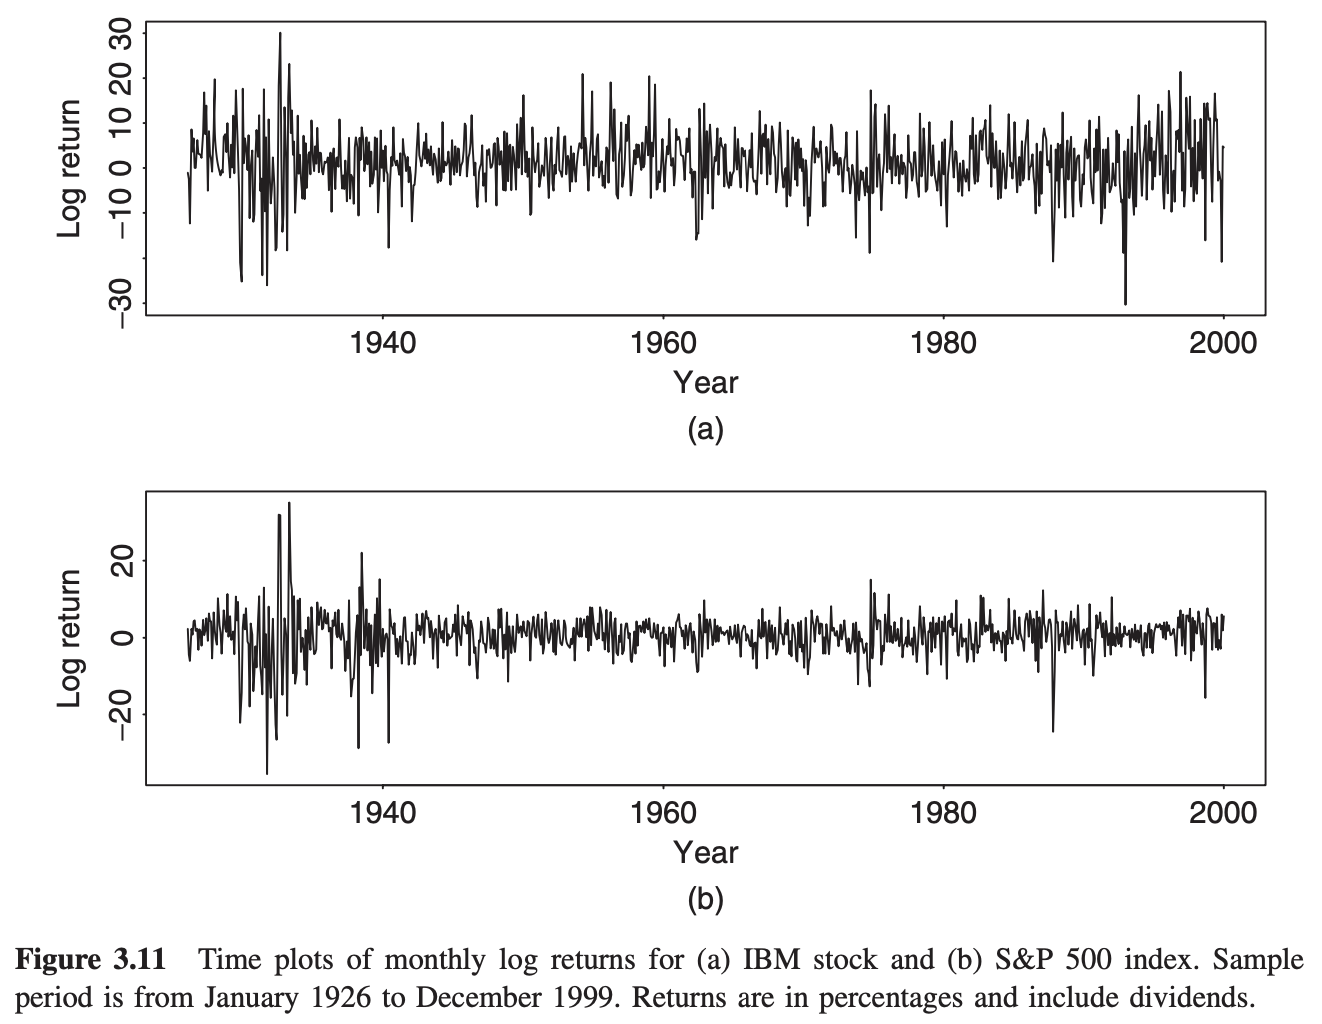

The reulsts of this section are obtained via the RATS program.

**Example 3.4** 

Monthly log returns of IBM stock are used to answer whether daily stock volatility is lower in summer and by how much in order to assist in stock option pricing. 

Denote the monthly log return series by $r_t$.  If Gaussian GARCH models are entertained, the GARCH(1,1) model is obtained for this series:

(3.42)

$$\large \begin{align} 
r_t &= 1.23 + 0.9 r_{t-1} + a_t, \; \; a_t = \sigma_t \epsilon_t \\
\sigma_t^2 = 3.206 + 0.103 a_{t-1}^2 + 0.825 \sigma_{t-1}^2
\end{align}$$

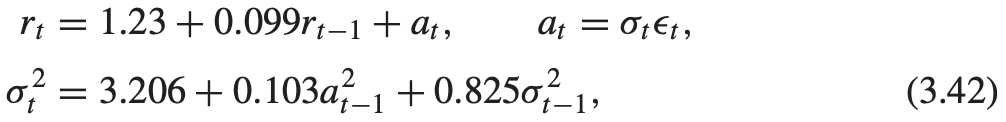

The standard errors of the two parameters in the mean equation are 0.222 and 0.027.

The standard errors of the three parameters in the volatility equation are 0.947, 0.021 and 0.037. 

Using the standardized residuals $\large \tilde{a}_t = \frac{a_t}{\sigma_t}$, the Ljung_Box statistics reveal **no serial correlations** in the standardized residuals of the mean equation: Q(10) = 7.82(0.553) and Q(20) = 21.22(0.325) where p values are in parentheses.  Similarly, the Ljung-Box statisitcs of the $\large \tilde{a}_t^2$ series indicate that the standardized residuals have **no conditional heteroscedasticity**: Q(10) = 2.89(0.98) and Q(20) = 7.26(0.99). [Notice, he doesnt say squared standardized residuals: does this mean that conditional heteroscedasticity is a feature of the unsquared time series measured by the squared residuals?] [Thus,] The fitted model seems adequate.  This model serves as a starting point for further study. 

To study the summer effect on stock volatility of an asset, define an indicator variable:

(3.43) 

$$ \large u = \begin{cases}  
1 & \text{if t is June, July, or August}\\
0 & \text{otherwise}\\
\end{cases}$$

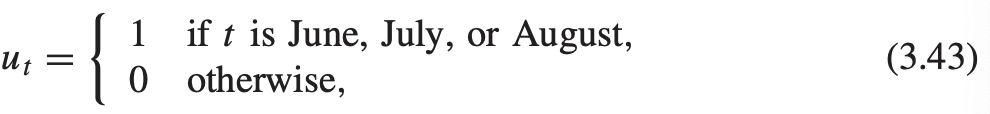

and modify the volatility equation to 

$$\large \sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2 + u_t (\alpha_{00} + \alpha_{10} a_{t-1}^2 + \beta_{10} \sigma_{t-1}^2)$$

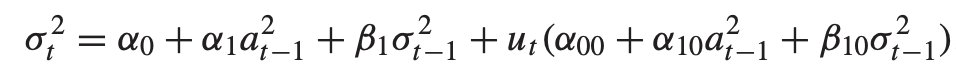

This equation uses two GARCH(1,1) models to describe the volatility of a stock return; one model for the summer months [when $u_t = 1$] and the other for the remaining months.  Applying this model to IBM log returns, estimation results show that the estimates of $\alpha_{00}$ and $\beta_{10}$ are statistically insignificant at the 10% level.  Therefore the refined model is:

(3.44)

$$ \large \begin{align}
r_t & = 1.21 + 0.099 r+{t-1} + a_t, \;\; a_t = \sigma_t\epsilon_t\\
\sigma_t^2 & = 4.539 + 0.113 a_{t-1}^2 + 0.816 \sigma_{t-1}^2 - 5.154 u_t\\
\end{align}$$

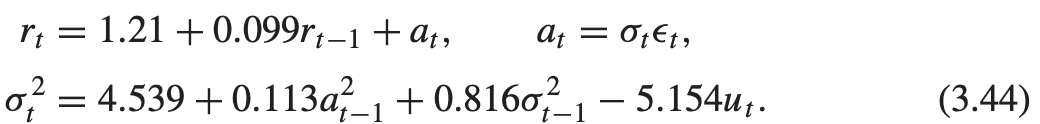

The standard errors of the parameters in the mean equation are 0.218 and 0.037.

The standard errors of the parameters in the volatilty equation are 1.071, 0.022, 0.37, and 1.900.

The Ljung-Box statistics for the standardized residuals $\large \tilde{a}_t = \frac{a_t}{\sigma_t}$ show Q(10) = 7.66(0.569) and Q(20) = 21.64(0.302) and thus there are no serial correlations in the standardized residuals. The Ljung-Box statistics for $\large \tilde{a}_t^2$ give Q(10) = 3.38(0.97) and Q(20) = 6.82(0.99) indicating no conditional heteroscedasticity in the standardized residuals either.  The refined model seems adequate.  
Comparing volatility models (3.42) and (3.44) one can conclude:
- $u_t$'s coefficient = -0.5154 is significantly different from zero with a p value of 0.0067.  Thus the summer effect on stock volatility is **statistically significant** at the 1% level.  The **negative sign on the coefficient estimate** confirms that volatility of IBM monthly log stock returns is lower during the summer.

$$\large \sigma_t^2 \begin{cases}
& = 4.539 - 5.154 + 0.113 a_{t-1}^2 + 0.816 \sigma_{t-1}^2 & \text{if t is June, July, or August}\\
& = 4.539 + 0.113 a_{t-1}^2 + 0.816 \sigma_{t-1}^2 & \text{otherwise}\\
\end{cases}$$

$$\large \sigma_t^2 \begin{cases}
& = -0.615 + 0.113 a_{t-1}^2 + 0.816 \sigma_{t-1}^2 & \text{if t is June, July, or August}\\
& = 4.539 + 0.113 a_{t-1}^2 + 0.816 \sigma_{t-1}^2 & \text{otherwise}\\
\end{cases}$$

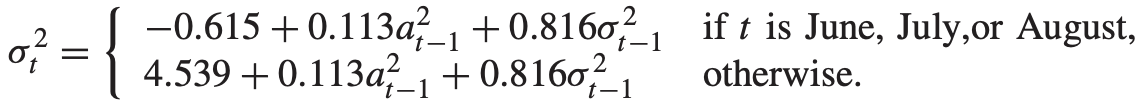

- rewrite (3.44) as shown above
    - The negative constant term -0.615 = 4.539 - 5.514 is counterintuitive.
    - However since the standard errors of 4.539 and 5.514 are relatively large, the estimated difference -0.615 might not be significantly different from zero.  To verifiy the assertion, refit the model by imposing the constraint that the constant term of the volatility equation is zero for the summer months in this way:

$$\large \sigma_t^2 = \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2 + \lambda(1 - u_t)$$

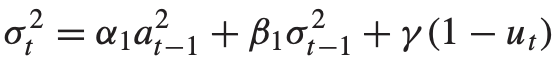

The fitted model is:

(3.45)

$$\large \begin{align} 
r_t & = 1.21 + 0.099 r_{t-1} + a_t, \;\; a_t = \sigma_t \epsilon_t \\
\sigma_t^2 & = 0.114 a_{t-1}^2 + 0.811 \sigma_{t-1}^2 + 4.552 (1 - u_t)\\
\end{align}$$

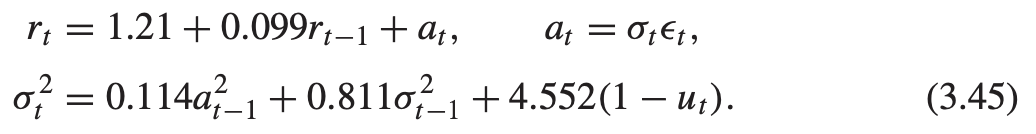

The standard errors of the parameters in the mean equation are 0.219 and 0.038 and in the volatility equation are 0.022, 0.034, and 1.094.  

The Ljung-Box statistics of the standardized residuals $\large \tilde{a}_t = \frac{a_t}{\sigma_t}$ shows Q(10) = 7.68 and Q(20) = 21.67 and those of $\large \tilde{a}_t^2 = \frac{a_t^2}{\sigma_t^2}$ give Q(10) = 3.17 and Q(20) = 6.85.  

These test statistics are close to what we had before and are not significant at the 5% level.

The volatility equation (3.45) can be used to assess the summer effect on the IBM stock volatility.  For illustration, based on the model in equation (3.45), the median of $a_t^2$ is 29.4 and the median if $\sigma_t^2$ is 75.1 for IBM monthly log returns in 1999.  Using these values, we have $\large \sigma_t^2 = 0.114 \times 29.4 + 0.811 \times 75.1 = 64.3$ for the summer months and $\large \sigma_t^2 = 68.8$ for the other months.  The ratio of the two volatilities is $\large \frac{64.3}{68.8} \approx 93%$.  Thus, there is a 7% reduction in the volatility of the monthly log return of IBM stock in the summer months.

**Example 3.5**

The S&P 500 index is widely used in derivative markets.  Thus, modeling its volatility is a subject of intensive study.  The question addressed in this example is whether the past returns of individual components of the index contribute to the modeling of the S&P 500 index volatility in the presence of its own returns.  This discussion uses past returns of UBM stock as explanatory variables to address the question [i.e. doesnt use all S&P 500 components.]. Data are shown in figure 3.11.

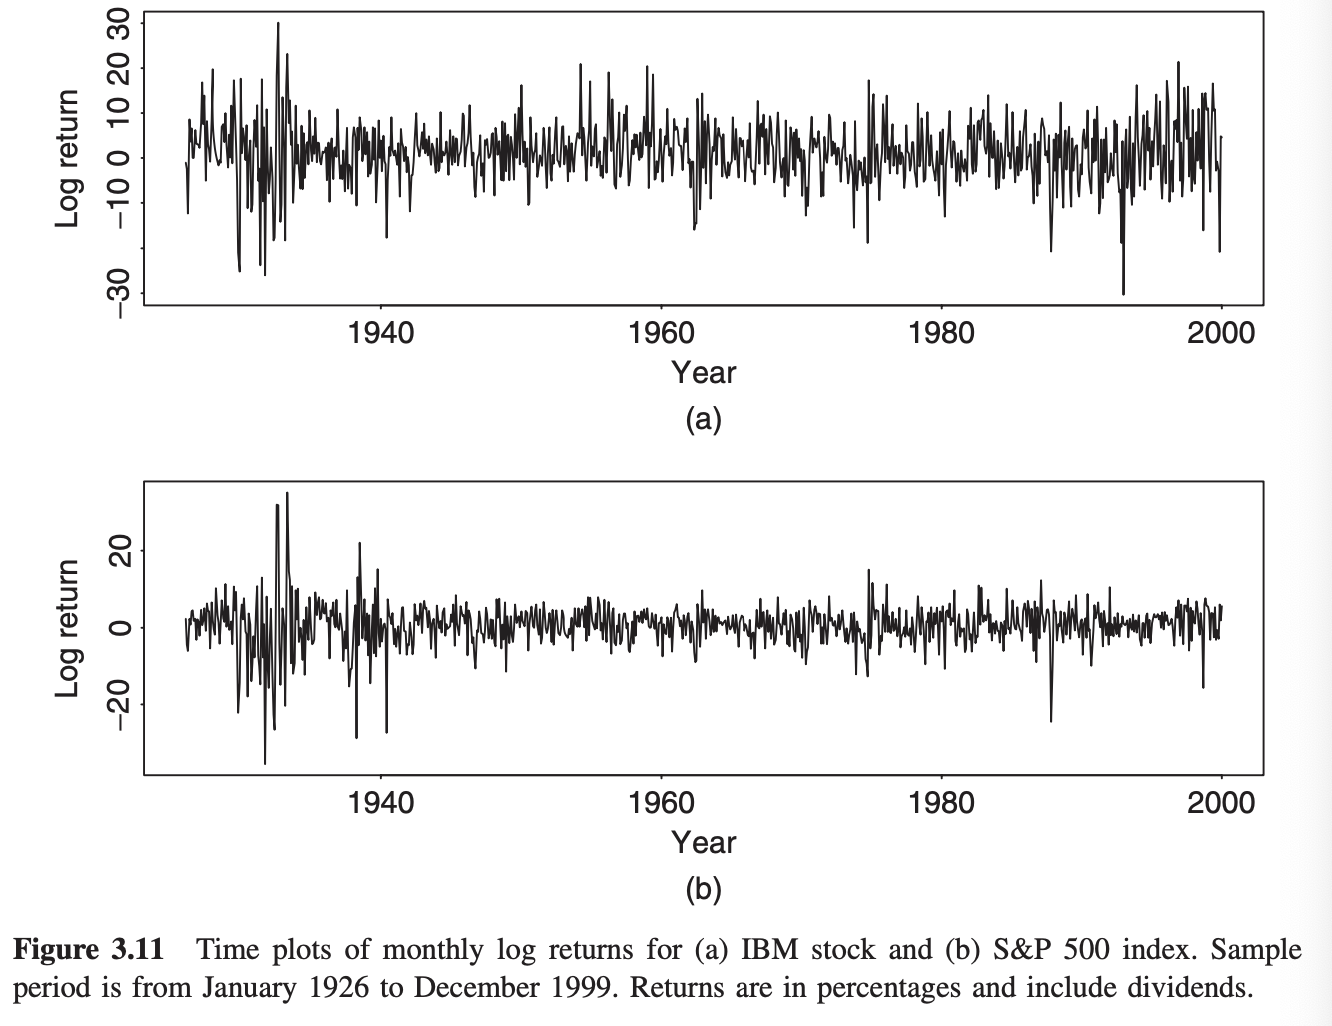

Let $r_t$ denote monthly log return series of the S&P 500 index.  With this index and GARCH models, a special GARCH(2,1) model is assembled:

(3.46)

$$\large r_t = 0.609 + a_t, \;\; a_t = \sigma_t \epsilon_t, \;\; \sigma_t^2 = 0.717 + 0.147 a_{t-2}^2 + 0.839 \sigma_{t-1}^2$$

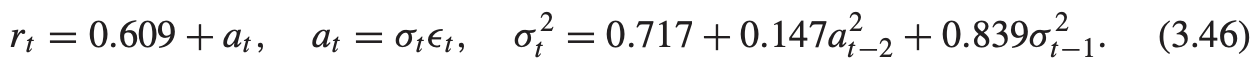

[Am guessing the 'speacial' nature of this model lies in the face that one of $a_{t-1}$ coefficient is zero.]

The standard error of the constant term in the mean equation is 0.138 and those of the parameters in the volatility equation are 0.214, 0.021 nd 0.017. 

Based on the standardized residuals $\large \tilde{a}_t = \frac{a_t}{\sigma_t}$, Ljung-Box statistics are Q(10) = 11.51(0.32) and Q(20) = 23.71(0.26) with p values in parentheses. Based on the $\large \tilde{a}_t^2$ series, Q(10) = 9.42(0.49) and Q(20) = 13.01(0.88).  Thus, the model seems adequate at the 5% significance level.

Nextg evaluate past IBM stock returns contributions as an S&P 500 component in modeling S&P 500 index volatlity.  As a simple illustration, modify the volatility equation as:

$$\large \sigma_t^2 = \alpha_0 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \lambda(x_{t-1} - 1.24)^2$$

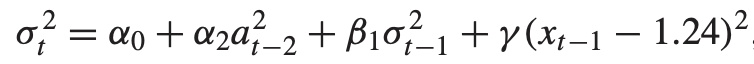

where:
- $x_t$ is the monthly log return of IBM stock
- 1.24 is the sample mean of $x_t$

The fitted model for $r_t$ becomes:

(3.47)

$$ \large \begin{align}
r_t & = 0.616 + a_t, \;\; a_t = \sigma_t \epsilon_t\\
\sigma_t^2 & = 1.069 + 0.148 a_{t-2}^2 + 0.834 \sigma_{t-1}^2 - 0.007 (x_{t-1} - 1.24)^2
\end{align}$$

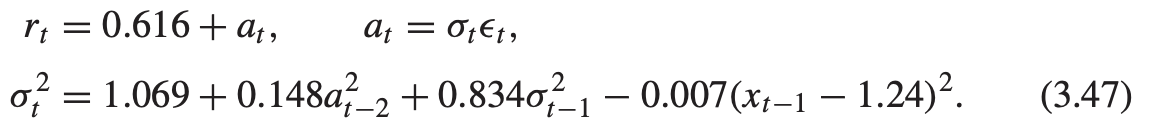

The standard error of the parameter in the mean equation is 0.139 and the standard errors of the parameters in the volatility equation are 0.271, 020, 0.018 and 0.002.  Model checking reveals Q(10) = 11.39(0.33) and Q(20) = 23.63(0.26) for standardized residuals $\large \tilde{a}_t = \frac{a_t}{\sigma_t}$ and Q(10) = 9.35(0.50) and Q(20) = 13.51(0.85) for the $\large \tilde{a}_t^2$ series: the model is adequate.

Since the p value for testing $\lambda = 0$ is 0.0039, the contribution of the lag-1 IBM stock return to the S&P 500 index volatility is statistically significant at the 1% level.  The negative sign is understandable, implying that using lag-1 past return of IBM stock reduces the volatility of S&P 500 index return. [Not sure I see why the greater the lagged IBM return squared divergence from mean, the lower the lower the S&P 500 index volatility.]  
Table 3.4 provides fitted volatility of the S&P 500 index from Jul to Dec 1999 using models (3.46) and (3.47).  From the table, the past value of IBM log stock return indeed contributes to the modeling of S&P 500 index volatlity. 

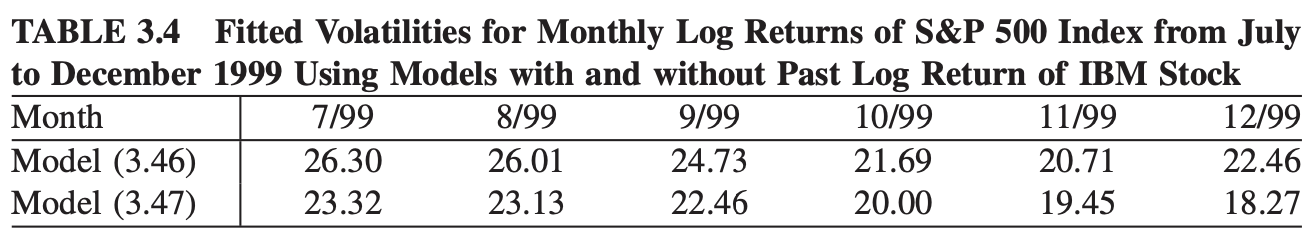


## 3.15 Alternative Approaches

2 alternative approaches to modeling volatility: high-frequency data and open-high-low-close prices.

### 3.15.1 Use of High-Frequency Data

French, Schwert, and Stambaugh (1987) use recently available high-freqency financial data to estimate volatility low-frequency returns volatility.  Availability highlighted by Andersen, Bollerslev, Diebold, and Labys (2001a, 2001b).

To estimate monthly volatility of an asset employing its available daily returns, let: 
- [t be the month subscript]
- [m be the number of months]
- n be trading days in month t
- $\large \{r_{t,i}\}_{i=1}^n$ be the [series/set? of] daily log returns of the asset in the month.
- $\large r_t^m$ be the [computed] monthly log return [not "returns"] of the asset at month t.  Using properties of log returns, [the sum of log returns is the same as the product of the m monthly $r_t$'s]:

$$\large r_t^m = \sum_{i+1}^n r_{t,i}$$

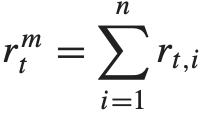

Assuming the conditional variance $\large \text{Var}(r_{t,i} | F_{t-1})$ and conditional covariance $\large Cov[(r_{t,i},r_{t,j}) | F_{t-1}]$ exist, 

(3.48)

$$\large \text{Var}( r_t^m | F_{t-1} ) = \sum_{i=1}^n \text{Var}(r_{t,i} | F_{t-1}) + 2 \sum_{i<j} Cov[(r_{t,i},r_{t,j}) | F_{t-1}]$$

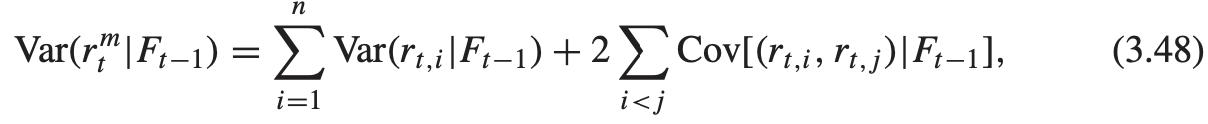

where:
- $\large F_{t-1}$ denotes the information available at month t - 1 (inclusive) [inclusive of that month?]

(3.48) can be simplified if additional assumptions are made:
- if assume $\large \{r_{t,i}\}$ is a white noise series [independent to remove Cov, and identically distributed to make it = n days times the variance of all t months' i = 1st day's log return's], [also assumes n = some standard (30?) number of days / month], then:

$$\large \text{Var} (r_t^m | F_{t-1}) = n \text{Var}(r_{t,1})$$

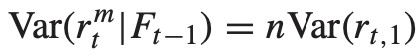

where $\large \text{Var}(r_{t,1})$ can be estimated bfrom the daily returns $\{r_{t,i}\}_{i=1}^n$ by 

$$\large \hat{\sigma}^2 = \frac{\sum_{i=1}^n (r_{t,i} - \bar{r_t})^2}{n-1}$$

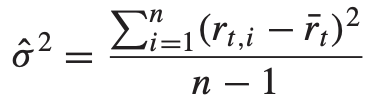

[removes the assumption of identically distributed since you are computing variance per month from month's daily log returns]

where:
- $large \bar{r}_t$ is the sample mean of the daily log returns in the month t:

$\large \bar{r}_t = \left(\sum_{i=1}^n r_{t,i}\right){n}$

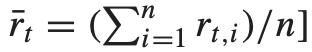

The estimated monthly volatility is then 

(3.49)

$$\large \hat{\sigma}_m^2 = \frac{n}{n-1} \sum_{i=1}^n (r_{t,i} - \bar{r}_t)^2$$

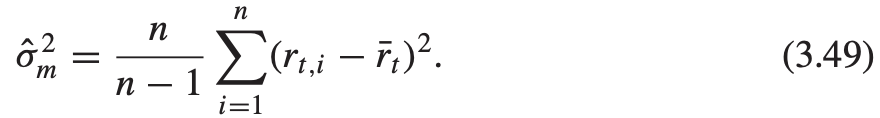

If $\{r_{t,i}\}$ follows an MA(1) model, then: 

$$\large \text{Var}(r_t^m | F_{t-1}) = n \text{Var}(r_{t,1}) + 2 (n-1) \text{Cov} (r_{t,1},r_{t,2})$$

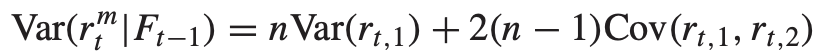

which can be estimated by 

(3.50)
$$\large \hat{\sigma}_m^2 = \frac{n}{n-1} \sum_{i=1}^n (r_{t,i} - \bar{r}_t)^2  + 2 \sum_{i=1}^{n-1} (r_{t,i} - \bar{r}_t)(r_{t,i+1} - \bar{r}_t)$$

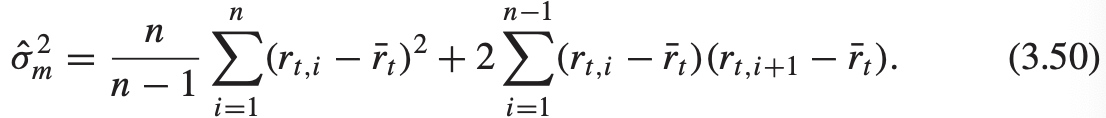

This volatility estimation approach encounters several practical difficulties:
1. The model for daily returns $\large \{r_{t,i}\}$ is unknown which complicates the estimation of covariances in (3.48)

(3.48)

$$\large \text{Var}( r_t^m | F_{t-1} ) = \sum_{i=1}^n \text{Var}(r_{t,i} | F_{t-1}) + 2 \sum_{i<j} Cov[(r_{t,i},r_{t,j}) | F_{t-1}]$$

2. There are roughly 21 trading days in a month, resulting in a small sample size.  The accuracy of the estimates of variance and covaricance in (3.48) might be questionable.  The accuracy depends on the dynamic structure of $\large \{r_{t,i}\}$ and their distribution.  If the daily log returns have high excess kurtosis and serial correlation, then the sample estimates $\large \hat{\sigma}_m^2$ in (3.49) and (3.50) may not even be consistent; see Bai, Russell, and Tiao (2004). 

(3.49)

$$\large \hat{\sigma}_m^2 = \frac{n}{n-1} \sum_{i=1}^n (r_{t,i} - \bar{r}_t)^2$$

(3.50)
$$\large \hat{\sigma}_m^2 = \frac{n}{n-1} \sum_{i=1}^n (r_{t,i} - \bar{r}_t)^2  + 2 \sum_{i=1}^{n-1} (r_{t,i} - \bar{r}_t)(r_{t,i+1} - \bar{r}_t)$$

3. Further research is neeeded to make this approach viable. 


### Example 3.6

Compute [estimate] monthly volatility of S&P 500 index log returns from Jan 1980 to Dec 1999 via three different methods.

The first method uses daily log returns and equation (3.49) and thus assumes that the daily log returns form a white noise series.

The second method also uses daily log returns but assumes an MA(1) model, thus using equation (3.50). 

The third method applies a GARCH(1,1) model to the monthly returns from Jan 1962 to Dec 1999, a longer data span than for the other two methods in order to obtain a more accurate estimate of the monthly volatility.  The GARCH(1,1) model used is:

$$\large r_t^m = 0.658 + a_t, \;\; a_t = \sigma_t \epsilon_t, \;\; \sigma_t^2 = 3.349 + 0.086 a_{t-1}^2  + 0.0735 \sigma_{t-1}^2$$

where:
- $large \epsilon_t$ is a standard Gaussian white noise series

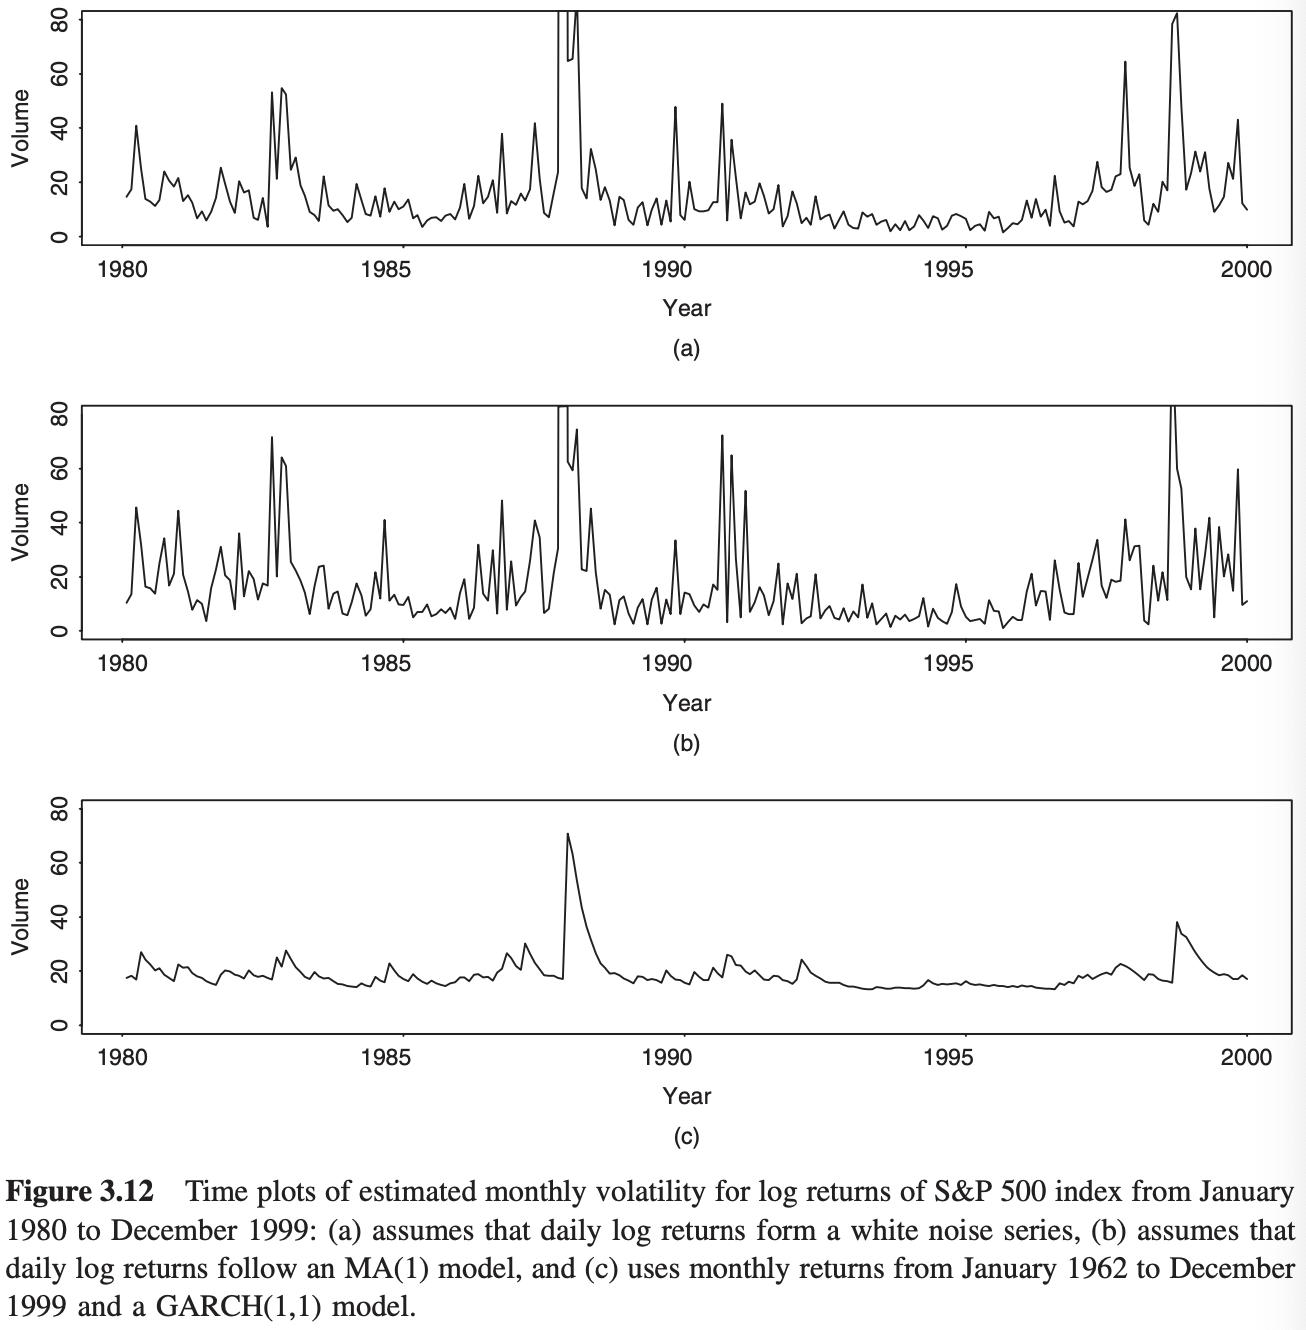

Figure 3.12 shows a time plots of the estimated monthly volatility. 
- Clearly the estimated volatilities based on daily returns are much higher than those based on monthly returns and a GARCH(1,1) model.  
- In particular, the estimated volatility for Oct 1987 was abou 680 when daily returns are used.  
- The plots shown were truncated to have the same scale.

[Looking at the first method now ... ?]
In equation (3.49) if it is further assumed that the sample mean $\large \bar{r}_t$ is zero, then:

$\large \hat{\sigma}_m^2 \approx \sum_{i=1}^n r_{t,i}^2$

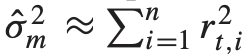

and in this case, the cummulative sums of squares of daily log returns in a month is used as an estimate of the monthly volatiliy.  This concept has been generalized to estimate daily asset volatility using intradaily log returns:
- Let $r_t$ be the daily log return of an asset.
- Suppose that there are n equally spaced intradaily log returns available such that [similar to how monthly are computed from sum of daily log returns]:

$\large r_t = \sum_{i=1}^n r_{t,i}$

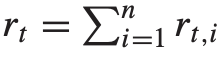

- The quantity [here] is called the **realized volatility** of $r_t$; see Andersen et al. (2001a,b).

$$\large \text{RV}_t = \sum_{i=1}^n r_{t,i}^2$$

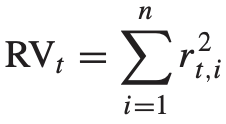

- Mathematially, realized volatilty is a quadratic variation of $r_t$, and 
- Realized volatility assumes that $\large \{r_{t,i}\}_{i=1}^n$ forms an iid sequence with mean zero and finite variance. 
- Limited experience indicates that $\large ln(RV_t)$ often follows approximately a Gaussian ARIMA(0,1,q) model, which can be used to produce forecasts. Section 1.1 presents a demonstration.
- Advantages of realized volatility include simplicity and making use of intradaily returns.
- Intuitively, one would like to use as much information as possible by choosing a large n.  However when the time interval between $r_{t,i}$ is small, the returns are subject to the effects of market microstructure, e.g. **bid-ask bouncce** which often results in a biased estimate of volatlity.
- The problem of choosing an optimal time interval for constructing realized volatlity has attracted much research. For heavily traded assets in the US, a 4-15 minute time interval is often used.
- Another problem of using realized volatlity for stock returns is that the overnight return, which is the return from the closing price of day t-1 to the opending price of day t, tends to be substantial [because of subsantial time interval]. Ignoring overnight returns can seriously underestimate the volatlity.  On the other hand, limited experience shows that overnight returns appear to be small for index returns or currency returns.

In a series, Barndorff-Nielsen and Shephard (2004) have used high-frequency returns to study bi-power variations of an asset return and developed some method to detect jumps in volatility.

### 3.15.2 Use of Daily Open High Low and Close Prices

Parkinson (1980), Garman and Klass (1980), Rogers and Satchell (1991) and Yang and Zhang (2000) showed that daily open, high, low, close prices can improve volatility estimation. 

Figure 3.13 illustrates six defined variables for an asset who price is plotted versus time for the t-th trading day, assuming time is continuous:
- $\large C_t$ = closing price of the t-th trading day.
- $\large O_t$ = the opending price of the t-th trading day.
- $\large f$ = the fraction of the day (in interval [0,1]) that trading is closed. [In 3.13, this is 0.5.] 
- $\large H_t$ = the highest price of the t-th trading period.
- $\large F_{t-1}$ = public information available at time t-1.

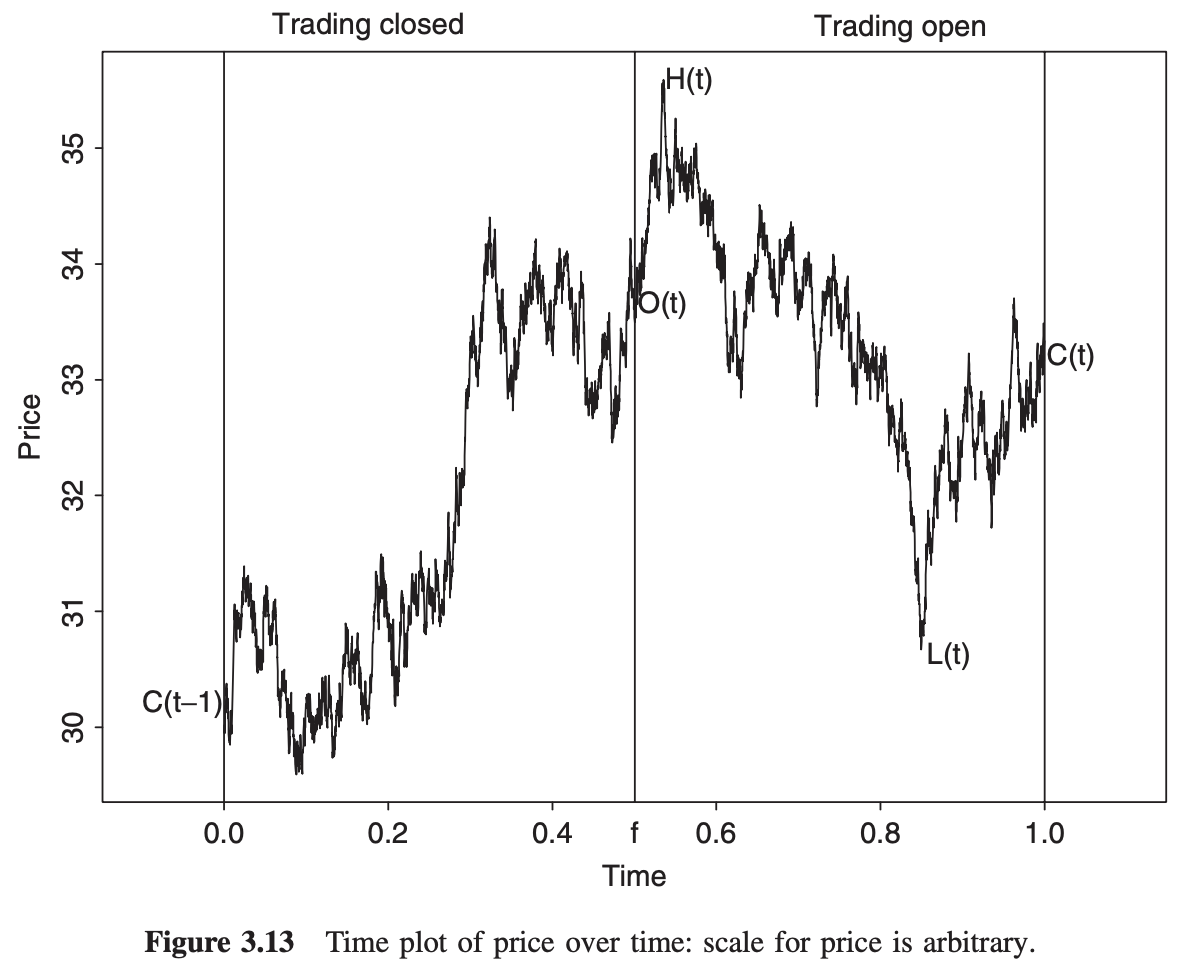

The conventional variance (or volatility) is $\large \sigma_t^2 = E[(C_t - C_{t-1})^2|F_{t-1}]$. 

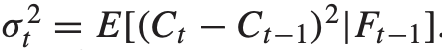

Garman and Klass (1980) considered several estimates of $\large \sigma_t^2$ assuming that the price follows a simple diffusion model without a drift, as covered in Chapter 6's discussion of stochastic diffusion models.  The estimators include:

$$\begin{align}
\hat{\sigma}_{0,t}^2 & = (C_t - C_{t-1})^2 \\
\hat{\sigma}_{1,t}^2 & = \frac{(O_t - C_{t-1})^2}{2f} + \frac{(C_t - O_t)^2}{2(1-f)}, \;\; 0 < f < 1.\\
\hat{\sigma}_{2,t}^2 & = \frac{(H_t - L_t)^2}{4 ln(2)} \approx 0.3607(H_t - L_t)^2\\
\hat{\sigma}_{3,t}^2 & = 0.17\frac{(O_t - C_{t-1})^2}{f} + 0.83\frac{(H_t - L_t)^2}{(1-f) 4  ln(2)}, \;\; 0 < f < 1.\\
\hat{\sigma}_{5,t}^2 & = 0.5(H_t - L_t)^2 - [2 ln(2) -1](C_t - O_t)^2, \text{ which is } \approx 0.5 (H_t - L_t)^2 - 0.386(C_t - O_t)^2.\\
\hat{\sigma}_{6,t}^2 & = 0.12\frac{(O_t - C_{t-1})^2}{f} + 0.88\frac{\hat{\sigma}_{5,t}^2}{(1-f)}, \;\; 0 < f < 1.\\
\end{align}$$

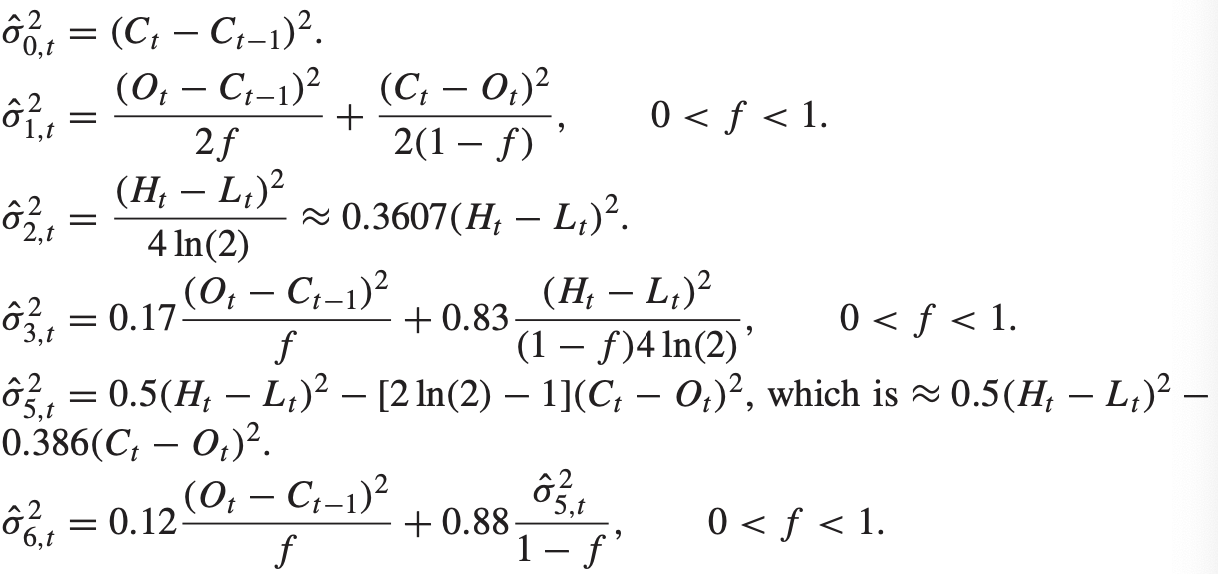

A more precise, but complicated, estimator $\large \hat{\sigma}_{4,t}^2$ is close to $\large \hat{\sigma}_{5,t}^2$.  

Defining **the efficiency factor** of a volatility estimator as ...

$$\large \text{Eff}(\hat{\sigma}_{i,t}^2) = \frac{\text{Var}(\hat{\sigma}_{0,t}^2}{\hat{\sigma}_{i,t}^2}$$

... Garman and Klass (1980) found that $\large \text{Eff}(\hat{\sigma}_{i,t}^2)$ is approximately 2, 5.2, 6.2, 7.4 and 8.4 for i = 1, 2, 4, 5, and 6 for the simple diffusion model.  

Note that $\large \hat{\sigma}_{2,t}^2$ was derived by Parkinson (1980) with f = 0.  

Turn to log returns.  Define the following: 

$$\large \begin{align}
o_t & = ln(O_t) - ln(C_{t-1}), \text{the normalized open [includes overnight return]}\\
u_t & = ln(H_t) - ln(O_t), \text{the normalized high [high return vs day's open]}\\
d_t & = ln(L_t) - ln(O_t), \text{the normalized low [low return vs day's open]}\\
c_t & = ln(C_t) - ln(O_t), \text{the normalized close [close return vs day's open]}\\
\end{align}$$

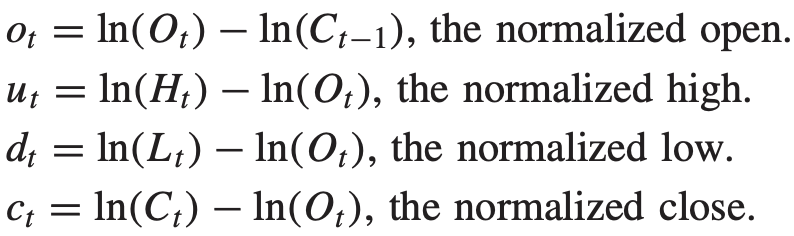

Suppose there are n days of data available and the volatiliy is constant over the period.  Yang and Zhang (2000) recommend the estimate ...

$$\large \hat{\sigma}_{yz}^2 = \hat{\sigma}_o^2 + k \hat{\sigma}_c^2 + (1 - k)\hat{\sigma}_{rs}^2$$

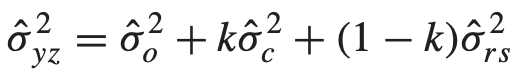

... as a robust estimator of the volatility, where ...

$$\large \begin{align}
\hat{\sigma}_{rs}^2 & = \frac{1}{n-1}\sum_{t=1}^n(o_t - \bar{o})^2 \text{ with } \bar{o} = \frac{1}{n}\sum_{t=1}^n o_t\\
\hat{\sigma}_{rs}^2 & = \frac{1}{n-1}\sum_{t=1}^n(c_t - \bar{c})^2 \text{ with } \bar{c} = \frac{1}{n}\sum_{t=1}^n c_t\\
\hat{\sigma}_{rs}^2 & = \frac{1}{n}\sum_{t=1}^n[u_t(u_t - c_t) + d_t(d_t - c_t)]\\
k & = \frac{0.34}{1.34 + \frac{n+1}{n-1}}\\
\end{align}$$

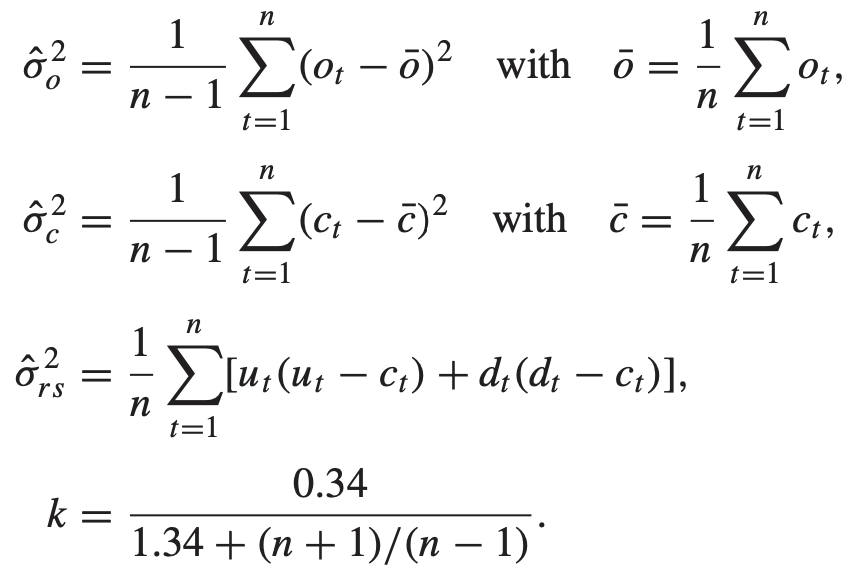

Rogers and Satchell (1991) proposed the estimate $\large \hat{sigma}_{rs}^2$.

The quantity k is chosen to minimize the variance of the estimator of $\large \hat{sigma}_{yz}^2$ which is a linear combination of the three estimates.

The quantity $\large H_t - L_t$ is called teh **range** of the price on the t-th day.  This estimator has led to the use of **range-based volatilty estimates**; e.g. Alizadeh, Brandt, and Diebold (2002).  In practice stock prices are only observed at discrete time points; thus the daily high is likely lower than [the acgtual?] $H_t$ and the daily low is likely lower than [the actual?] $L_t$.  Consequently, the observed daily price range tends to underestimate the actual range and hence may lead to underestimation of volatility.  This bias in volatlity depends on the trading frequency and tick size of the stocks.  For intensively traded stocks, the bias should be negligible.  For other stocks, further study is needed ot better understand the performance of range-based volatlity estimation. 


## Kurtosis of GARCH Models

Uncertainty in volatlity estimation is important but overlooked issue.
To assess variability of estimated volatliity one must consider kurtosis of a volatlitiy model.  Here, the excess kurtosis of a GARCH(1,1) model is derived; the same idea applies to other GARCH models.  The model considered is:

$$\large a_t = \sigma_t \epsilon_t, \;\; \sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2$$

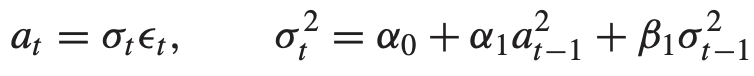

where:
- $\alpha_0 > 0, \alpha_1 ≥ 0,\beta_1 ≥ 0, \alpha_1 + \beta_1 < 1$
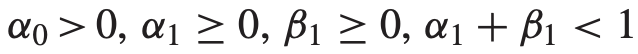
- $\{\epsilon\}$ is an iid sequence satisfying:  
$$E(\epsilon_t) = 0. \text{Var}(\epsilon_t) = 1, E(\epsilon_t^2) = K_{\epsilon} + 3$$
    
    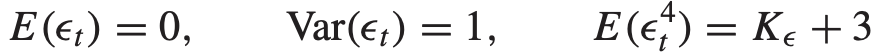
    
    where
    - $K_{\epsilon}$ is the excess kurtosis of the innovation $\epsilon_t$
    
Based on the assumption we have the following 

$\large \text{Var}(a_t) = E(\sigma_t^2) = \frac{\alpha_0}{[1-(\alpha_1 + \beta_1)]}$

$E(a_t^4) = (K_{\epsilon} + 3) E(\sigma_t^4) \text{ provided that } E(\sigma_t^4) \text{exists.}$

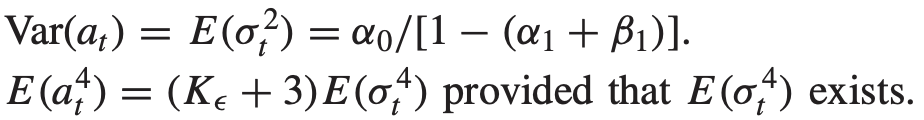

Taking the square of the volaitlity model:

$$\sigma_t^4 = \alpha_0^2 + \alpha_1^2 a_{t-1}^4 + \beta_1^2 \sigma_{t-1}^4 + 2 \alpha_0 \alpha_1 a_{t-1}^2 + 2 \alpha_0 \beta_1 \sigma_{t-1}^2 + 2 \alpha_1 \beta_1 \sigma_{t-1}^2 a_{t-1}^2$$

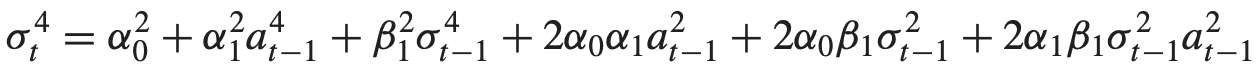

Taking expectation of the equation and using the two properties mentioned:

$$\large E(\sigma_t^4) = \frac{\alpha_0^2(1+\alpha_1 + \beta_1)}{[1-(\alpha_1 + \beta_1)][1 - \alpha_1^2(K_{\epsilon} + 2) - (\alpha_1 + \beta_1)^2]}$$

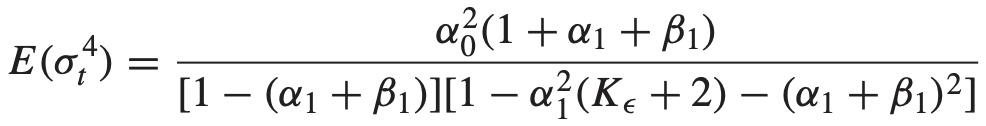

provided that:
- $\large 1 > \alpha_1 + \beta_1 ≥ 0$
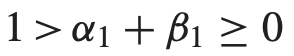   
- $\large 1 - \alpha_1^2(K_{\epsilon} + 2) - (\alpha_1 + \beta_1)^2 > 0$  
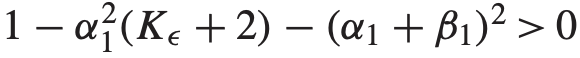

The excess kurtosis of $a_t$, if it exists, is then:

$$\large \begin{align}
K_a & = \frac{E(a_t^4)}{[E(a_t^2)]^2} - 3\\
& = \frac{(K_{\epsilon} + 3)[1-(\alpha_1 + \beta_1)^2]}{1 - 2 \alpha_1^2 - (\alpha_1 + \beta_1)^2 - K_{\epsilon}\alpha_1^2} - 3\\
\end{align}$$

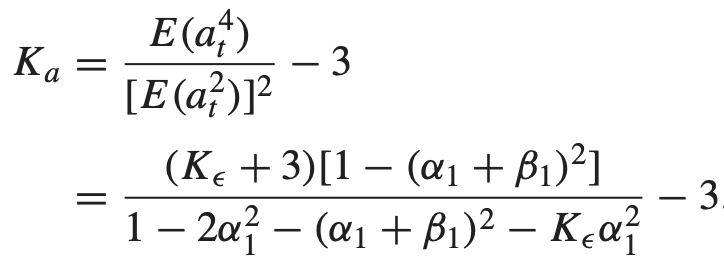

This excess kurtosis can be written in an informative expression.  
- First consider the case that $\epsilon_t$ is normally distributed.  In this case $K_{\epsilon} = 0$ and some algebra shows that 

$$\large K_a^{(g)} = \frac{6\alpha_1^2}{1 - 2 \alpha_1^2 - (\alpha_1 + \beta_1)^2}$$

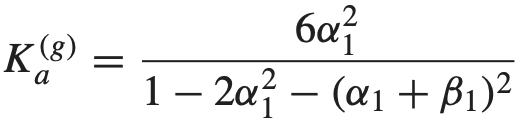

where:
- the superscript (g) is used to denote Gaussian distribution. 

The result has 2 important implications:   
(a) the kurtosis of $a_t$ exists if 

$\large 1 - 2 \alpha_1^2 - (\alpha_1 + \beta_1)^2 > 0$

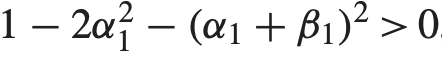

(b) $\large \text{if } \alpha_1 = 0, \text{ then } K_a^{(g)} = 0$ meaning that the corresponding GARCH(1,1) model does not have heavy tails. 

- Second, consider the case that $\large \epsilon_t$ is not Gaussian.  Using prior result:

$$\large \begin{align} K_a
& = \frac{K_{\epsilon} - K_{\epsilon}(\alpha_1 + \beta_1) + 6 \alpha_1^2 + 3 K_{\epsilon} \alpha_1^2}{ 1 - 2 \alpha_1^2 - (\alpha_1 + \beta_1)^2 - K_{\epsilon} \alpha_1^2}\\
& = \frac{K_{\epsilon}[1 - 2 \alpha_1^2 - (\alpha_1 - \beta_1)^2] + 6 \alpha_1^2 + 5 K_{\epsilon} \alpha_1^2}{ 1-2\alpha_1^2 - (\alpha_1 + \beta_1)^2 -  K_{\epsilon} \alpha_1^2}\\
& = \frac{K_{\epsilon} + K_a^{(g)} + \frac{5}{6} K_{\epsilon}K_a^{(g)}}{1 - \frac{1}{6} K_{\epsilon} K_a^{(g)}}
\end{align}$$

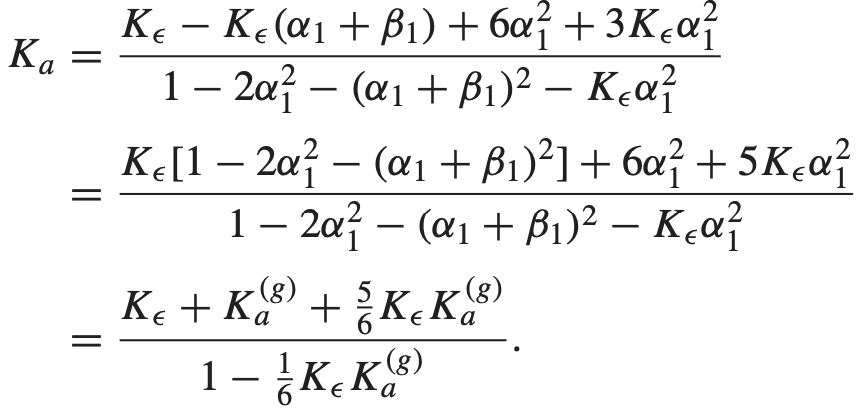

This result was obtained originally by George C Tiao: Bai, Russell, and Tiao (2003).  It holds for all GARCH models provided that kurtosis exists.  For example/l if $\beta_1 = 0$, then the model reduces to an ARCH(1) model. In this case it is easy to verify that 

$$\large K_a^{(g)} = \frac{6 \alpha_1^2}{1 - 3\alpha_1^2}$$

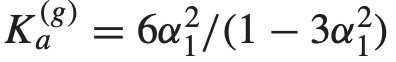

provided that 
- $\large 1 > 3 \alpha_1^2$
- and the excess kurtosis of $a_t$ is:

$$\large \begin{align} K_a
& = \frac{(K_{\epsilon} + 3)(1-\alpha_1^2)}{ 1 - (K_{\epsilon} + 3) \alpha_1^2} - 3\\
& = \frac{K_{\epsilon} +  2K_{\epsilon}\alpha_1^2 + 6\alpha_1^2}{ 1 - 3 \alpha_1^2 - K_{\epsilon} \alpha_1^2}\\
& = \frac{K_{\epsilon}(1 - 3 \alpha_1^2) + 6\alpha_1^2 + 5 K_{\epsilon} \alpha_1^2}{ 1 - 3 \alpha_1^2 - K_{\epsilon} \alpha_1^2}\\
& = \frac{K_{\epsilon} + K_a^{(g)} + \frac{5}{6} K_{\epsilon}K_a^{(g)}}{1 - \frac{1}{6} K_{\epsilon} K_a^{(g)}}
\end{align}$$

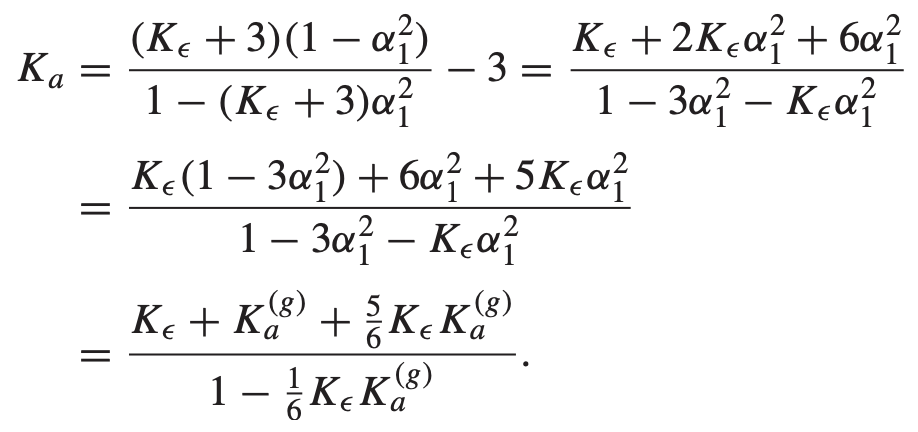

This result shows that for a GARCH(1,1) model the coefficient $\alpha_1$ plays a critical role in determining the tail behavior of $a_t$.  If $\alpha_1 = 0$, then $K_a^{(g)} = 0$ and $K_a = K_{\epsilon}$.  In this case, the tail behavior of $a_t$ is similar ot that of the standardized noice $\epsilon_t$.  Yet if $\alpha_1 > 0$, then $K_a^{(g)} > 0$ and the $a_t$ process has heavy tails. 

For a (standardized) Student-t distribution with v degrees of freedom, 

$\large E(\epsilon_t^4 = \frac{6}{v-4} + 3 \text{ if } v > 4 $

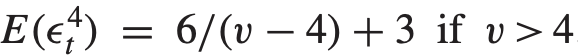

There fore the excess kurtosis of $\epsilon_t$ is 

$\large K_{\epsilon} = \frac{6}{v-4} \text{ for } v > 4$.

This is part of the reason for using $t_5$ in the chapter when the degrees of freedom of a t-distribution are prespecified.  The excess kurtosis of $a_t$ becomes 

$\large K_a = \frac{[6 + (v+1) K_a^{(g)}]}{[v - 4 - K_a^{(g)}]}$

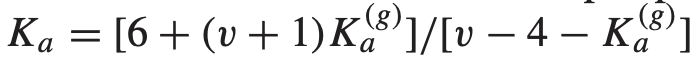

provided that:

$\large 1 - 2 \alpha_1^2 \frac{(v - 1)}{(v - 4)} - (\alpha_1 + \beta_1)^2 > 0$

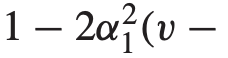
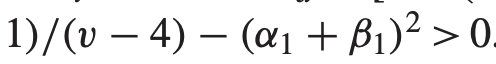

## Appendix: Some RATS Programs for estimating volatility models

The data file used in the illustration is `sp500.txt` which contains the monthly excess returns of the S&P 500 index with 792 observations.  Comments in a RATS program start iwth *.

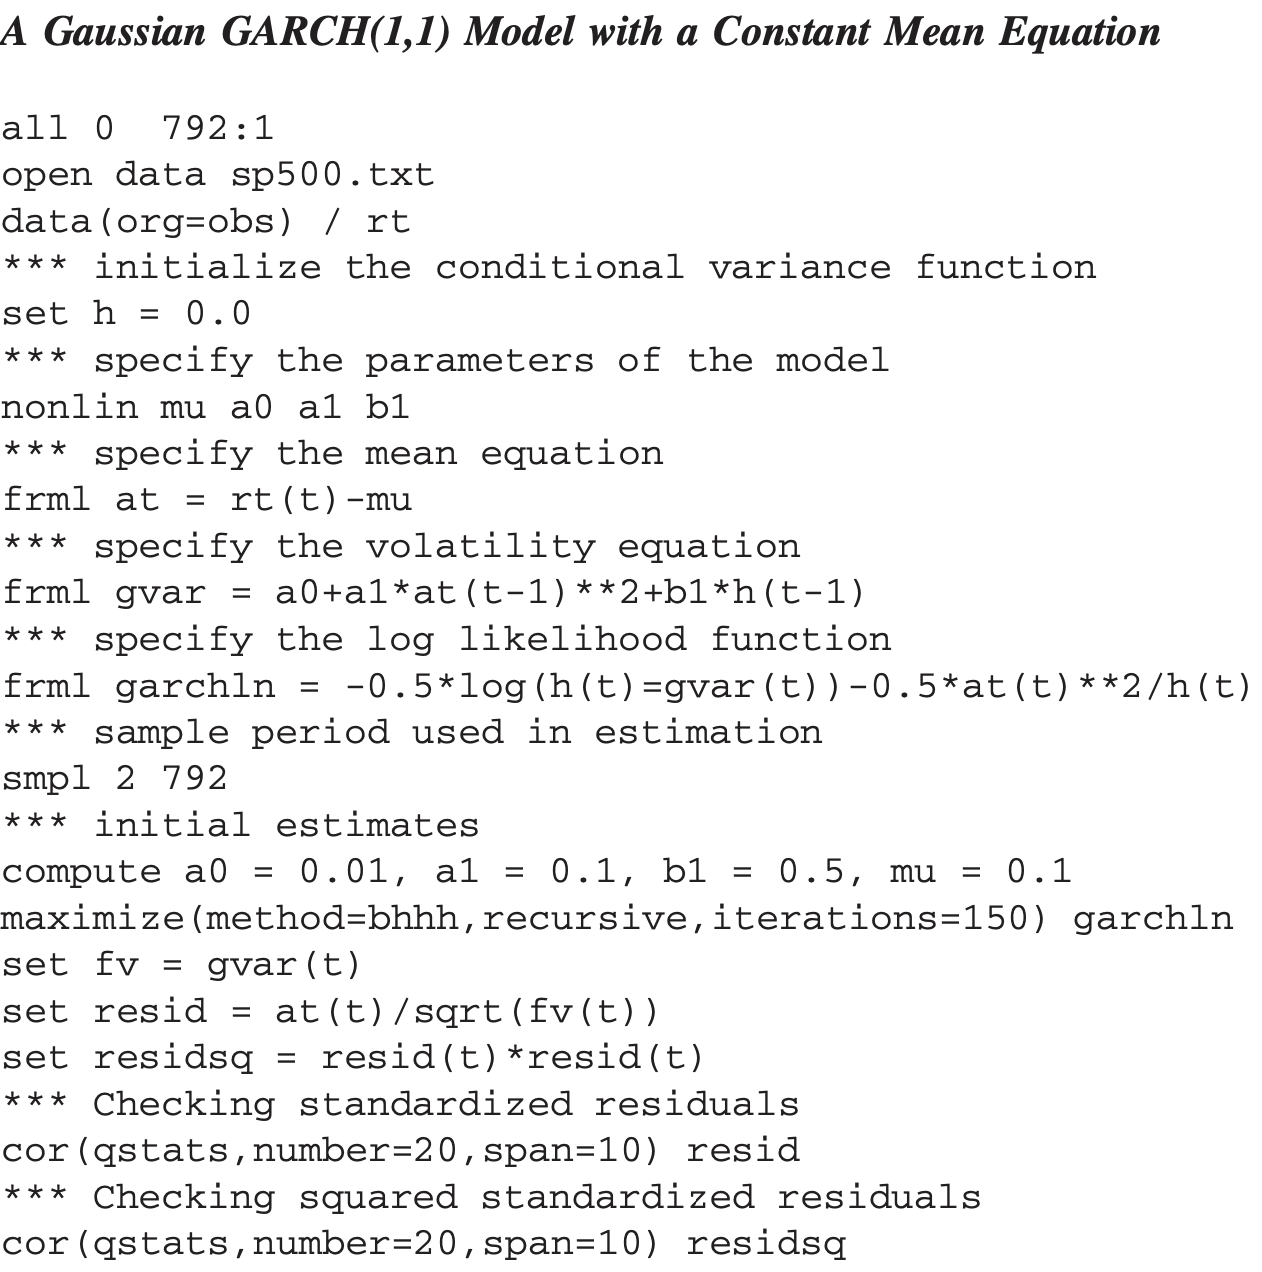

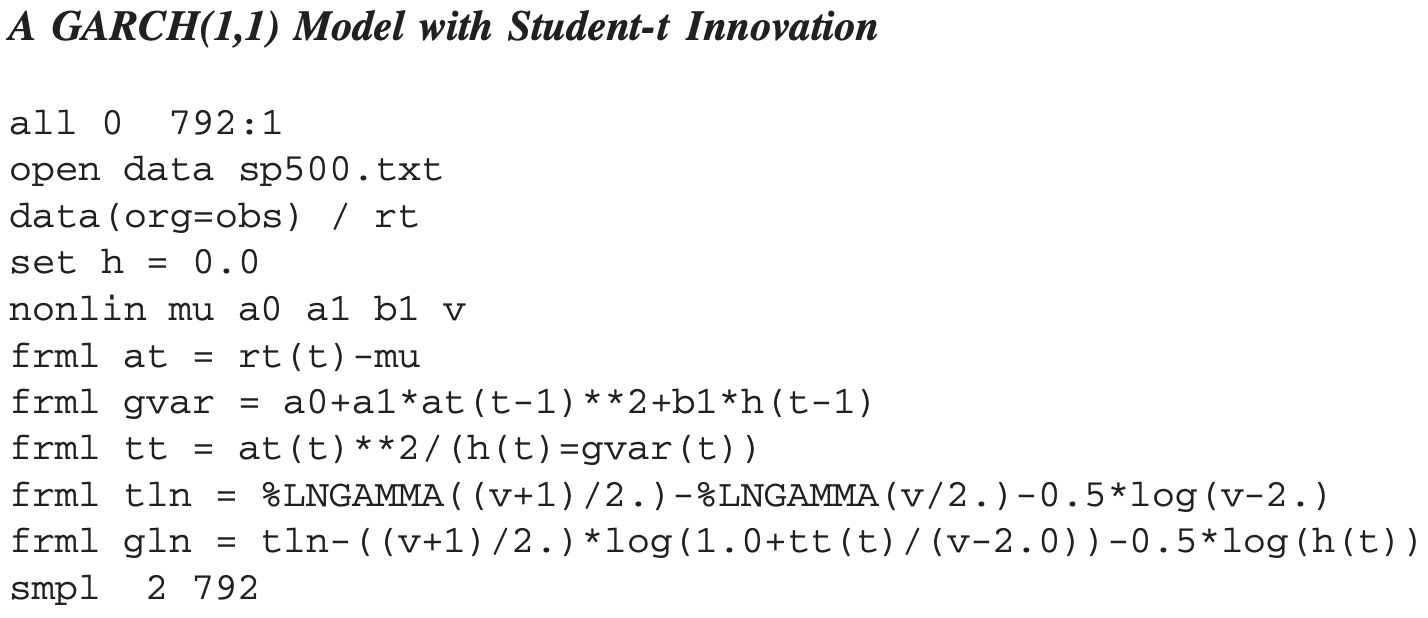
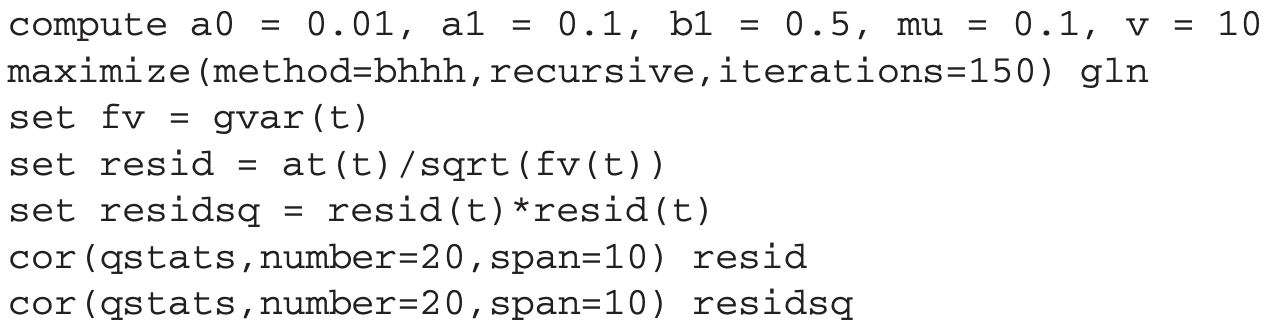

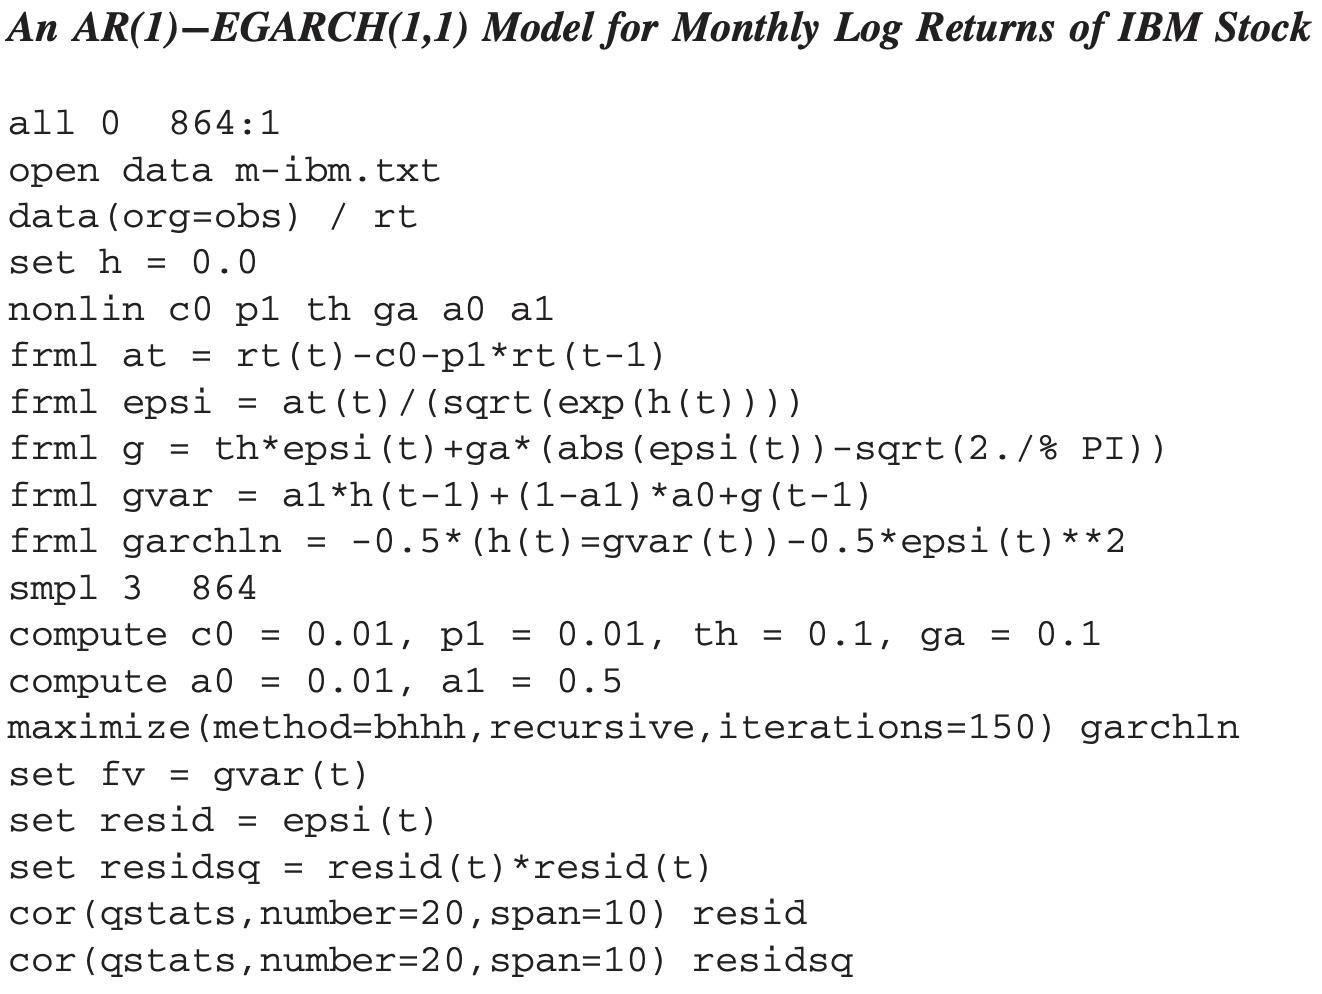

## Chapter 8 Appendix A: Review of vectors and matrices

Review of algebra and properties of vectors and matrices:

An m x n real-valued matrix is an m x n array of real numbers. 

For example:

$$\large A = 
\begin{bmatrix}
2 & 5 & 8\\
-1 & 3 & 4
\end{bmatrix}
$$

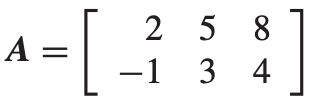

is a 2 x 3 matrix with 2 rows and 3 columns.  

Generally, an m x n matrix is written:

(8.46)

$$\large A \equiv [a_{ij}] =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1,n-1} & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2,n-1} & a_{2n} \\
\vdots & \vdots &  & \vdots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{m,n-1} & a_{mn} \\
\end{bmatrix}
$$

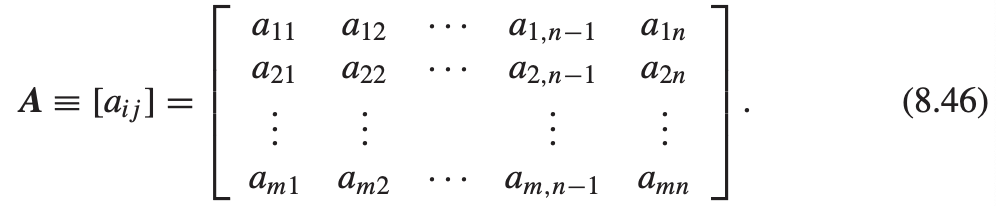

where:
- m and n are positive integers denoting row dimension and column dimension of A
- $a_{ij}$ is referred to as the (i,j)th element of A.  
- $a_{ii}$ are the **diagonal** elements of the matrix.
- an m x 1 matrix forms an m-dimensional **column vector**.
- 1 x n matrix is an n-dimensional row vector.
- in literature, a vector is often meant to be a column vector.
- if m = n then the matrix is a sqaure matrix. 
- if $a_{ij} = 0 \text{ for } i ≠ j$ then matrix A is **a diagonal matrix**
- if $a_{ij} = 0 \text{ for i ≠ j and } a_{ii} = 1$ for all i, then A is the m x m **identity matrix**, commonly denoted by $I_m$ or **I** if the dimension is clear.
- the notation $A' = [a_{ij}'$ denotes the transpose of A:
    - from the definition, $a_{ij}' = a_{ji}$
    - (A')' = A
    - if A' = A then A is a **symmetric matrix**.
- the n x m matrix A' is the **transpose** of the matrix A [notice m is still the first subscript]:

$$\large A' =
\begin{bmatrix}
a_{11} & a_{21} & \dots & a_{m-1,1} & a_{m1} \\
a_{12} & a_{22} & \dots & a_{m-1,2} & a_{m2} \\
\vdots & \vdots &  & \vdots & \vdots \\
a_{1n} & a_{2n} & \dots & a_{m-1,n} & a_{mn} \\
\end{bmatrix}
$$

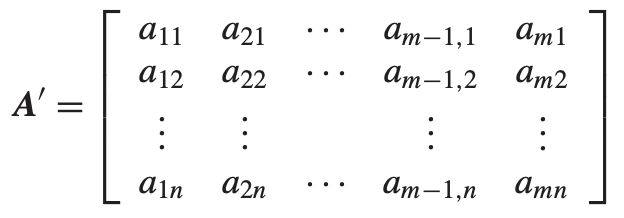

For example:

$$\large
\begin{bmatrix}
2 & -1 \\
5 & 3 \\
8 & 4 \\
\end{bmatrix}
\text{ is the transpose of }
\begin{bmatrix}
2 & 5 & 8\\
-1 & 3 & 4
\end{bmatrix}
$$

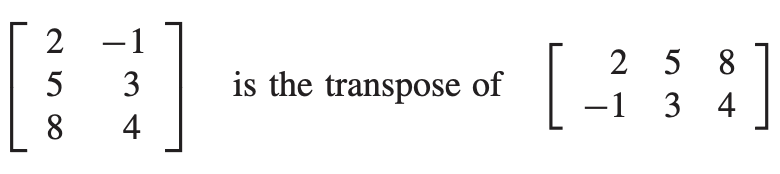

### Basic operations

Suppose $A = [a_{ij}]_{\text{m x n}}$ and $C = [a_{ij}]_{\text{p x q}}$ are two matrices with dimensions given in their subscripts.  Let *b* be a real number.  Define basic matrix operations:

- Addition: $A + C = [a_{ij} + c_{ij}]_{\text{m x n}}$ if m = p and n = q.
- Subtraction: $A - C = [a_{ij} - c_{ij}]_{\text{m x n}}$ if m = p and n = q.
- Scalar multiplication: $bA = [ba_{ij}]_{\text{m x n}}$
- Multiplication: $AC = [ \sum_{v=1}^n a_{iv}c_{vj} ]_{\text{m x n}}$ provided n = p.

When the dimensions of matrices satisfy the condition for multiplication to take place, the two matrices are said to be **conformable**.  For example:


$$\large
\begin{align}
\begin{bmatrix}
2 & 1 \\
1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 2 & 3\\
-1 & 2 & -4
\end{bmatrix}
&=
\begin{bmatrix}
2 \times 1 - 1 \times 1 & 2 \times 2 + 1 \times 2 & 2 \times 3 - 1 \times 4\\
1 \times 1 - 1 \times 1 & 1 \times 2 + 1 \times 2 & 1 \times 3 - 1 \times 4
\end{bmatrix}\\
&=
\begin{bmatrix}
1 & 6 & 2\\
0 & 4 & -1
\end{bmatrix}
\end{align}
$$

Important rules of matrix operations include:
- (a) (AC)' = C'A'
- (b) AC ≠ CA in general

### Inverse, Trace, Eigenvalue and Eigenvector

A square matrix $A_{\text{m x m}}$ is **nonsingular** or **invertible** 
- if there exists a unque matrix $C_{\text{m x m}}$ such that $AC = I_m$ = the m x m identity matrix.  
- **C** is called the inverse matrix of **A** 
- **C** is denoted C = $A^{-1}$

The **trace** of $A_{\text{m x m}}$ is the sum of its diagonal elememts:

$$\large \text{tr(A) = }\sum_{i=1}^m a_{ii}$$

[the above works if i < j when matrix is short and wide, but if j<i and tall and thin, then I would suggest: 
                                     
$$\large \text{tr(A) = }\sum_{j=1}^m a_{jj}$$

- $\large tr(A + C) = tr(A) + tr(C)$
- $\large tr(A) = tr(A')$
- $\large tr(AC) = tr(CA)$ provided that the two matrices are conformable.

A number $\large \lambda$ and an *m x 1 vector **b*** possibly complex valued are a **right eigenvalue** and **eigenvector** pair of the matrix **A** if **Ab = $\gamma$b**:
- there are m possible eigenvalues for the matrix **A**
- for a real-valued matrix **A** complex eigenvalues occur in conjugated pairs.
- the matrix **A** is nonsingular IFF all eigenvalues are nonzero.
- denote eigenvalues 

$\large \{\lambda_i| i = 1, \ldots, m\}$:

- [relationship of trace to eigenvalues:]

    $$\large \text{tr(A) =} \sum_{i=1}^m a_{ii} = \sum_{i=1}^m \lambda_i$$
    
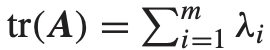

- **determinant** of matrix A can be defined as 

    $$\large \vert A \lvert = \prod_{i=1}^m \lambda_i$$
    
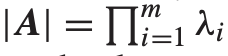 
   
Graybill (1969) is the reference text for this material and in particular the determininant.

- the **rank** of a matrix $A_{\text{m x m}}$ is the number of nonzero eigenvalues of the symmetric matrix **AA'**.  [So multiply AA' and find out the number of nonzero eigenvalues and you've the rank of A.]

- For a nonsingular matrix A, the inverse of the transpose equals the transpose of the inverse:

$$\large (A^{-1})' = (A')^{-1}$$

### Positive-Definite matrix

A square matrix A (m x m) is a **positive definite** matrix if 
- A is symmetric and
- all eigenvalues of A are positive

Alternatively, a [rectangular] matrix A is a **positive definite** matrix if for any nonzero m-dimensional vector b, **b'Ab** > 0.  [To satidfy myself that b'Ab is a a real value and not a matrix, I considered this:
- if b can multiply from right then $n_A = m_b$
- if b' can multiply from left then $m_b = A_m$
- so **b'A** is [1 x m][m x n] = [1 x n] and **b'Ab** is [1 x m][m x n][n x 1] = 1x1 and can be evaluated as > 0 or not.]

Properties of **positive definite matrix A**
- all eigenvlues of **A** are real and positive
- the matrix can be decomposed in what is referred to as the **spectral decompostion** of the matrix A:

$$\large A = P \Lambda P'$$

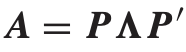

where:
- $\large \mathbf{\Lambda}$ is diagonal matrix consisting of all eigenvalues [$\lambda_i$] of A 
- $\large \mathbf{P}$ is an m x m matrix of the m right eigenvectors of A.

It is common to write the eigenvalues as:

$$\large \lambda_1 ≥ \lambda_1 ≥  \cdots ≥ \lambda_m$$

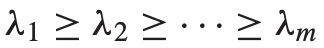

and the eigenvectors as 

$$\large e_1, \cdots, e_m$$

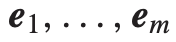

such that 

$$\large Ae_i = \lambda_i e_i$$ 

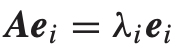

... and the eigenvectors are of unit length and orthogonal --> the matrix P [that holds them] is referred to as an **orthogonal matrix**.  [vectors are normalized to unit length by the $\lambda_i$ in $\Lambda$.]

$$\large e_i'e_i = 1$$

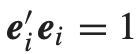

$$\large e_i'e_j = 0 \text{ if i ≠ j and if the eigenvalues are distinct}$$ 

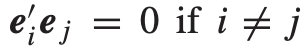

For example, the matrix $\large \Sigma$ is **positive definite**:

$$\large \Sigma =
\begin{align}
\begin{bmatrix}
2 & 1 \\
1 & 1 \\
\end{bmatrix}
\end{align}$$

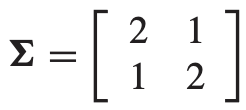

- these simple calculations show that 
    - 3 and 1 are eigenvalues of $\large \Sigma$ 
    - with normalzed egenvectors $\large (\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}})'$ and $\large (\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}})'$ respectively:

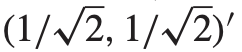
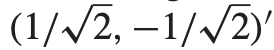

[here are those simlpe calculations that show the eigenvalues and eigenvectors relating to each other and to $\large \Sigma$]:

$$\large
\begin{bmatrix}
2 & 1 \\
1 & 2 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix}=
3
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix}$$


$$\large
\begin{bmatrix}
2 & 1 \\
1 & 2 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
-1 \\
\end{bmatrix}=
1
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix}$$

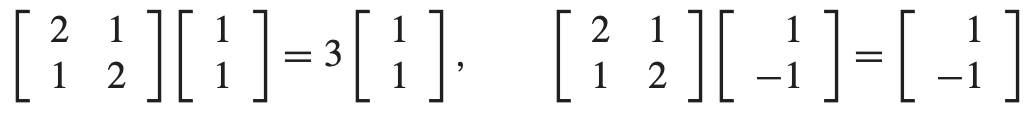

Spectral decomposition holds if one can verify that


$$\large
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
\end{bmatrix}
\begin{bmatrix}
2 & 1 \\
1 & 2 \\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
\end{bmatrix}
=
\begin{bmatrix}
2 & 1 \\
1 & 2 \\
\end{bmatrix}
$$
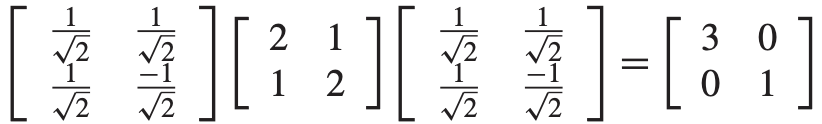

[where:]
- [the eigenvectors are normalized to unit length:]  
$\large \sqrt{(\frac{1}{\sqrt{2}})^2 + (\frac{1}{\sqrt{2}})^2} = 1$   
$\large \sqrt{(\frac{1}{\sqrt{2}})^2 + (-\frac{1}{\sqrt{2}})^2} = 1$ 

- [the eigenvectors are orthogonal:]   
$\large (\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}})' (\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}}) = 0$


#### Cholesky decomposition

For a symmetric matrix **A** there exists 
- a lower triangular matrix **L** with diagonal elements being 1, and
- a diagonal matrix **G** such that [references Strang (1980):

$$\large A = LGL'$$

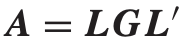

where:
- if **A** is positive definite, then the diagonal elements of **G** are positive [and the decomposition proceeds further] to what is called the **Cholesky decomposition** of A:

$$\large \mathbf A = L\sqrt{G}\sqrt{G}L' = (L\sqrt{G})(L\sqrt{G})'$$

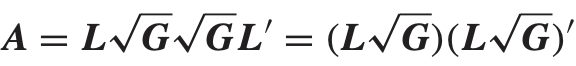

- $\large \mathbf L \sqrt{G}$ is **also** a lower triangular matrix
- the square root is taken element by element.
- the decomposition shows that a positive-definite matrix **A** can be diagonalized as 

$$\large \mathbf L^{-1}A(L')^{-1} = L^{-1} A (L^{-1})' = G$$

[where G is the collection of eigenvalues $\lambda_i$ that can replace matrix A as was stated above: $\large \mathbf Ab = \lambda b$. So, it makes sense that rearranging the Cholesky's decomposition that decomposes A into its eigenvectors and eigenvalues would result in diagonalized A in the form of the collection of $\large \lambda_i$ denoted $\large \Lambda$.]

Since **L** is a lower triangular matrix with unit diagonal elements, $\large L^{-1}$ is also a lower triangular matrix with unit diagonal elements.  Consider e.g. the prior 2 x 2 matrix $\large \Sigma$ for which it's easy to verify that these satisfy $\large \mathbf \Sigma = LGL'$

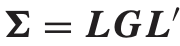

$$\large 
\mathbf{L} = 
\begin{bmatrix}
1.0 & 0.0 \\
0.5 & 1.0 \\
\end{bmatrix}
\text{ and }
\mathbf{G} = 
\begin{bmatrix}
2.0 & 0.0 \\
0.5 & 1.5 \\
\end{bmatrix}
$$

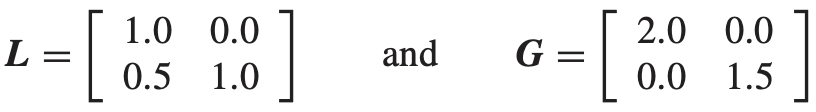

Additionally:

$$\large 
\mathbf{L}^{-1} = 
\begin{bmatrix}
1.0 & 0.0 \\
-0.5 & 1.0 \\
\end{bmatrix}
\text{ and }
\mathbf L^{-1}\Sigma(L^{-1})' = G$$

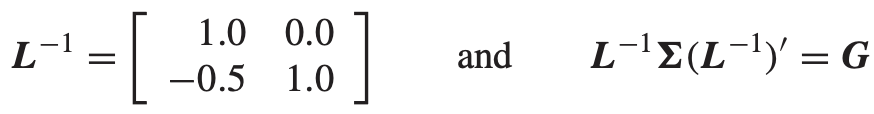

### Vectorization and Kronecker Product

Writing an m x n matrix **A** in its columns as:

$$\large \mathbf A = [a_1, \ldots, a_n]$$, 

[here, you are looking at the matrix represented by matrix columns denoted by $\mathbf a_1, \ldots, a_n$ in a list denoted by brackets.]

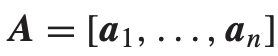

define **the stacking operation** ["*vectorization*"] as: 

$$\large \text{vec(A) } = (a_1', a_2', \ldots, a_m')'$$ 

[here you are looking at the matrix rows denoted by $\mathbf a_1', \ldots, a_m'$ containted in a vector denoted by $(\ldots)$'.

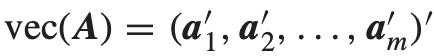

which is an *mn x 1* vector.

[Parentheses () denote vector and brackets [] denote matrices: His example supports the second, not this first bullet here:
- $\large \text{vec(A) } = (a_1', a_2', \ldots, a_m')' = ((a_{11}, a_{12}, \ldots, a_{1n}),(a_{21}, a_{22}, \ldots, a_{2n}), \ldots, (a_{m1}, a_{m2}, \ldots, a_{mn}))'$  
- $\large \text{vec(A) } = (a_1', a_2', \ldots, a_n')' = ((a_{11}, a_{21}, \ldots, a_{m1}),(a_{12}, a_{22}, \ldots, a_{m2}), \ldots, (a_{1n}, a_{2n}, \ldots, a_{mn}))'$ 
- This is not a matrix but a vector that has a quantity of rows = m*n and 1 column.  
- In these representation directly above, ' outside the $(\ldots)$ indicates transpose because it is a vector on its side when written in the book, but it is mn x 1 or mn tall and 1 thin.]

For 2 matrices $\large \mathbf{A}_{\text{m x n}}$ and $\large \mathbf{C}_{\text{p x q}}$, the **Kronecker product** between **A** and **C** is:

$$\large \mathbf{A} \bigotimes \mathbf{C} = 
\begin{bmatrix}
a_{11}\mathbf{C} & a_{12}\mathbf{C} & \cdots & a_{1n}\mathbf{C}&\\
a_{21}\mathbf{C} & a_{22}\mathbf{C} & \cdots & a_{2n}\mathbf{C}&\\
\vdots & \vdots & & \vdots\\
a_{m1}\mathbf{C} & a_{m2}\mathbf{C} & \cdots & a_{mn}\mathbf{C}&\\
\end{bmatrix}_{\text{mp x nq}}$$

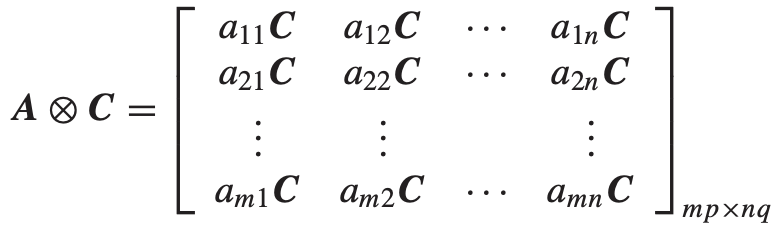

For example, 

$$\large 
\mathbf{A} = 
\begin{bmatrix}
2 & 1 \\
-1 & 3 \\
\end{bmatrix}, \;\;
\mathbf{C} = 
\begin{bmatrix}
4 & -1 & 3 \\
-2 & 5 & 2 \\
\end{bmatrix}
$$

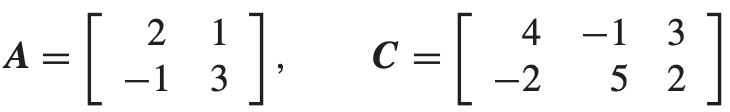

Then ...

$\large \text{vec} (\mathbf{A}) \text{= (2, -1, 1, 3)'}$

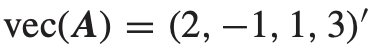

$\large \text{vec} (\mathbf{C}) \text{= (4, -2, -1, 5, 3, 2)'}$

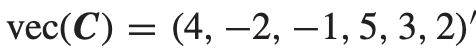


$$\begin{align} \large \mathbf{A} \bigotimes \mathbf{C} &= 
\begin{bmatrix}
2 \times \begin{bmatrix}4 & -1 & 3 \\ -2 & 5 & 2 \end{bmatrix} & 1 \times \begin{bmatrix}4 & -1 & 3 \\ -2 & 5 & 2 \end{bmatrix} \\
-1 \times \begin{bmatrix}4 & -1 & 3 \\ -2 & 5 & 2 \end{bmatrix} & 3 \times \begin{bmatrix}4 & -1 & 3 \\  -2 & 5 & 2 \end{bmatrix} \end{bmatrix}\\
&= \begin{bmatrix}
\begin{bmatrix}8 & -2 & 6 \\ -4 & 10 & 4 \end{bmatrix} & \begin{bmatrix}4 & -1 & 3 \\ -2 & 5 & 2 \end{bmatrix} \\
\begin{bmatrix}-4 & 1 & -3 \\ 2 & -5 & -2 \end{bmatrix} & \begin{bmatrix}12 & -3 & 9 \\  -6 & 15 & 6 \end{bmatrix} \end{bmatrix}\\
&=\begin{bmatrix}
8 & -2 & 6 & 4 & -1 & 3 \\
-4 & 10 & 4 & -2 & 5 & 2 \\
-4 & 1 & -3 & 12 & -3 & 9 \\
2 & -5 & -2 & -6 & 15 & 6 
\end{bmatrix}
\end{align}
$$

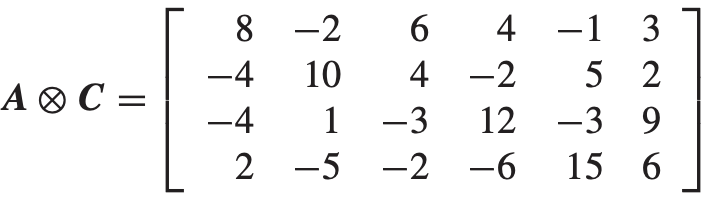

Assuming that the dimensions are appropriate, the following properties are available for the two operators:
1. $\large \mathbf{A} \bigotimes \mathbf{C} ≠ \mathbf{C} \bigotimes \mathbf{A} \text{ in general.}$   
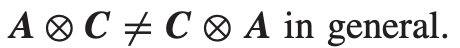
2. $\large (\mathbf{A} \bigotimes \mathbf{C})' = \mathbf{A}' \bigotimes \mathbf{C}' $.
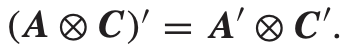
3. $\large \mathbf{A} \bigotimes (\mathbf{C + D}) =  \mathbf{A} \bigotimes \mathbf{C} + \mathbf{A} \bigotimes \mathbf{D}$.
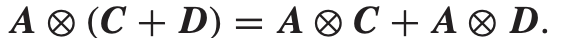
4. $\large (\mathbf{A} \bigotimes \mathbf{C}) (\mathbf{F} \bigotimes \mathbf{G}) = (\mathbf{AF}) \bigotimes (\mathbf{CG})$.
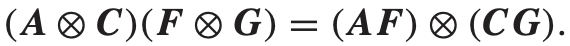
5. $\large \text{If A and C are invertible, then } (\mathbf{A} \bigotimes \mathbf{C})^{-1} = \mathbf{A}^{-1} \bigotimes \mathbf{C}^{-1}$
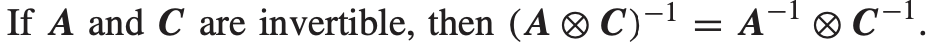
6. $\large \text{For square matrices A and C, tr}(\mathbf{A} \bigotimes \mathbf{C}) = tr(\mathbf{A}) tr(\mathbf{C})$
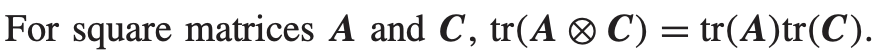
7. vec(**A** + **C**) = vec(**A**) + vec(**C**).
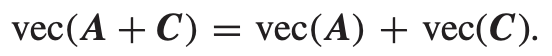
8. $\large \text{vec(ABC)} = (C' \bigotimes A) \text{vec(B).}$
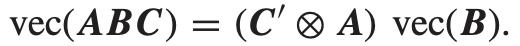
9. tr(**AC**) = vec(**C**')' vec(**A**) = vec(**A**')'vec(**C**).
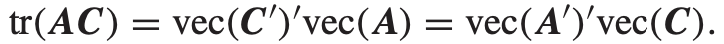
10. $\large \begin{align} \text{tr(ABC)} &= \text{vec}(\mathbf{A}')(\mathbf{C}' \bigotimes \mathbf{I}) \text{vec}(\mathbf{B}) &= \text{vec}(\mathbf{A'})' (\mathbf{I} \bigotimes \mathbf{B})  \text{vec}(\mathbf{C})\\
&= \text{vec}(\mathbf{B}')(\mathbf{A}' \bigotimes \mathbf{I}) \text{vec}(\mathbf{C}) &= \text{vec}(\mathbf{B'})' (\mathbf{I} \bigotimes \mathbf{C})  \text{vec}(\mathbf{A})\\
&= \text{vec}(\mathbf{C}')(\mathbf{B}' \bigotimes \mathbf{I}) \text{vec}(\mathbf{A}) &= \text{vec}(\mathbf{C'})' (\mathbf{I} \bigotimes \mathbf{A})  \text{vec}(\mathbf{B}) \end{align}$
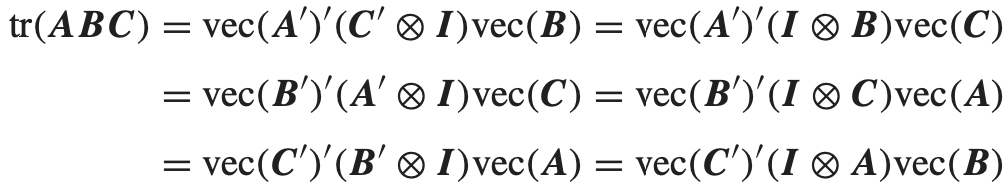


Multivariate statistical analysis often deals with symmetric matrices.  It is therefore convenient to generalize the stacking operation to the **half-stacking** operation that consists of elements on or below the main diagonal.  Specificaslly, for a symmetric square matrix $\large \mathbf{A} = [a_{ij}]_{\text{k x k}}$ define:

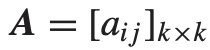

$$\large vech(\mathbf{A}) = (\mathbf{a}_{1.}', \mathbf{a}_{2*}', \ldots, \mathbf{a}_{k*}')'$$

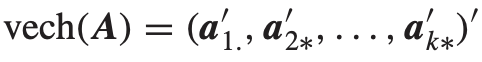

where:
- $\large \mathbf{a}_1$ is the first column of **A** 
- $\large \mathbf{a}_{i*} = (a_{ii}, a_{i+1,i}, \ldots, a_{ki})'$ is a (k - i + 1) dimensional vector.
- The dimension of vech(**A**) is $\large k\frac{(k + 1)}{2}$

For example, suppose that k = 3.  Then $\large vech(\mathbf{A}) = (a_{11}, a_{21}, a_{31}, a_{22}, a_{32}, a_{33})'$ which is a six dimensional vector. [Matrix **A** would be a diagonal matrix that looks like this:]

$\large \begin{matrix}
a_{11} & & \\
a_{21} & a_{22} & \\ 
a_{31} & a_{32} & a_{33}
\end{matrix}$